In [2]:
prefix = '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/new_expdata/'
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.special import erf 
from sklearn.metrics import roc_auc_score
def cal_dis_metric(loss):
    
    loss = np.log((np.exp(-1*loss)/(1-np.exp(-1*loss)+1e-8)))
    half = int(len(loss)/2)
    avg1 = np.average(loss[:half])
    avg2 = np.average(loss[half:])
    std1 = np.sqrt(np.var(loss[:half]))
    std2 = np.sqrt(np.var(loss[half:]))
    metric = 0.5+ erf(np.abs((avg1-avg2)/(std1+std2))/np.sqrt(2))
    return metric
    

epoch 0


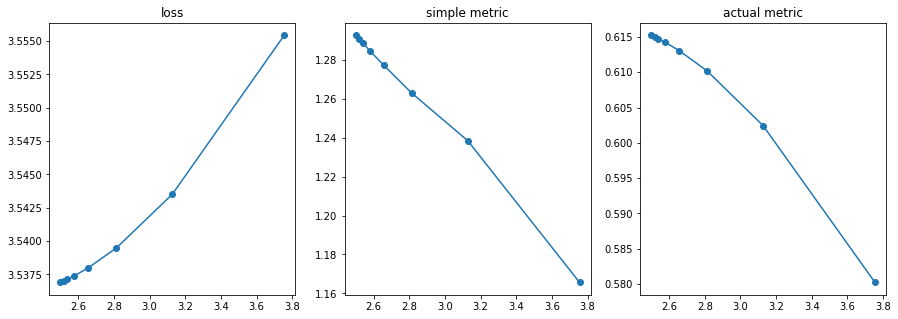

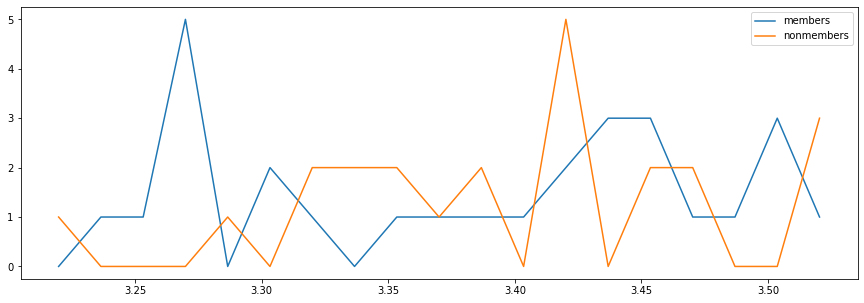

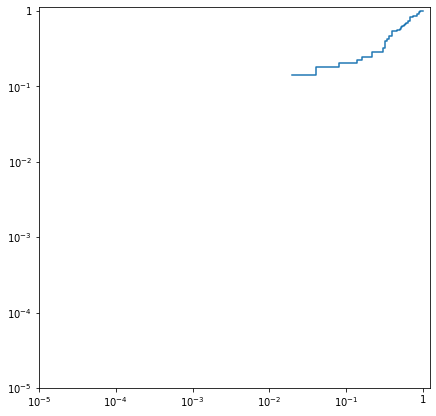

AUC SCORE 0.5644
epoch 10


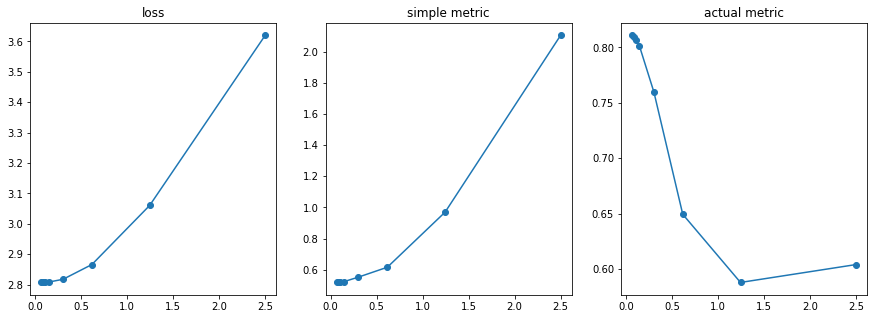

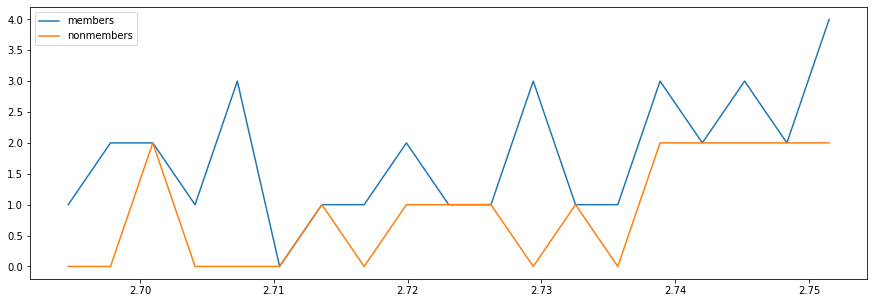

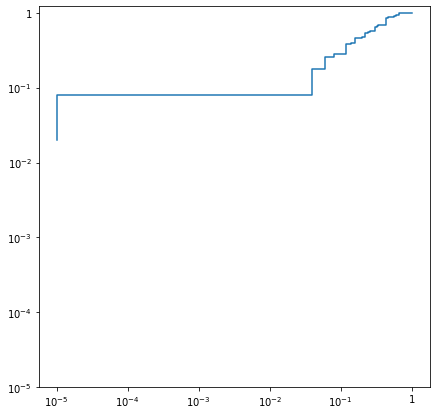

AUC SCORE 0.7436
epoch 20


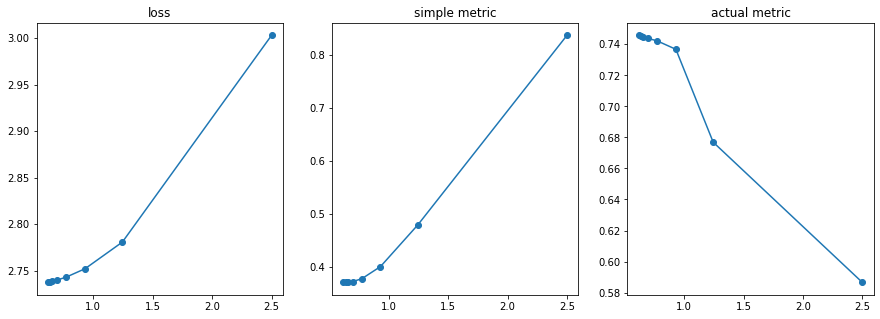

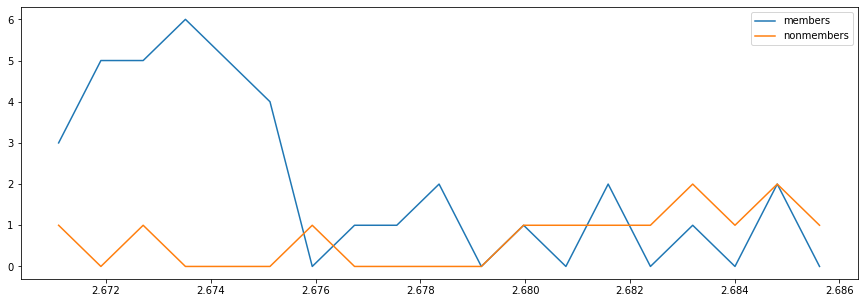

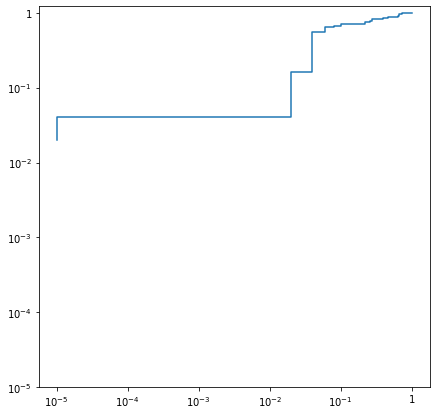

AUC SCORE 0.838
epoch 30


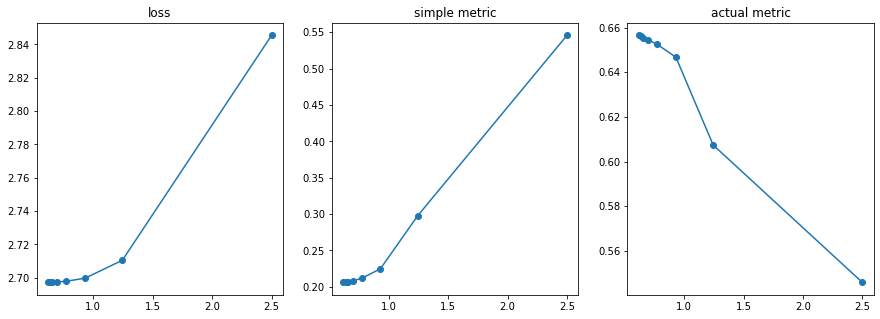

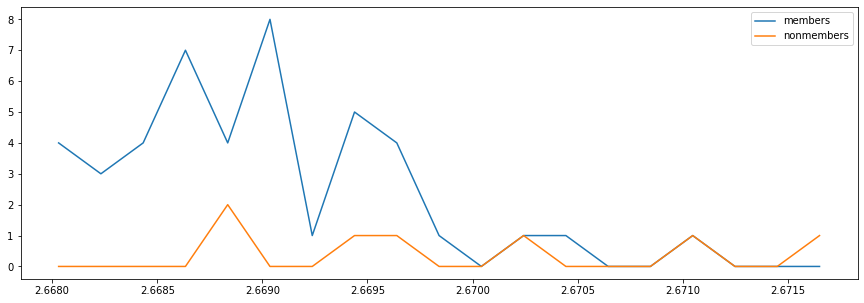

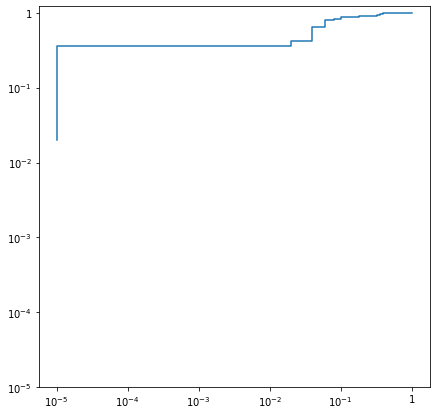

AUC SCORE 0.9248
epoch 40


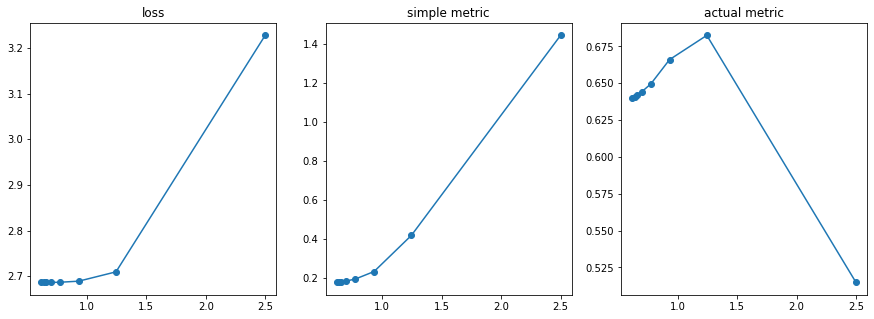

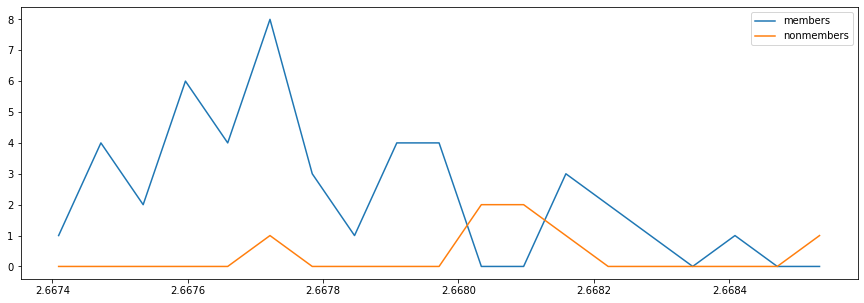

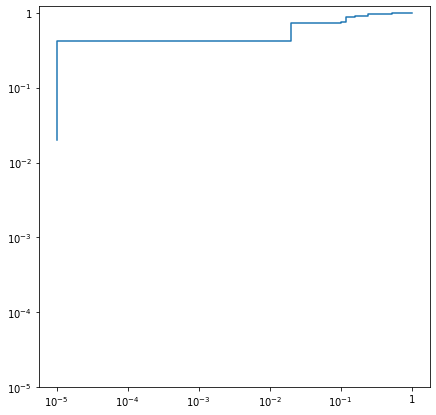

AUC SCORE 0.9364
epoch 50


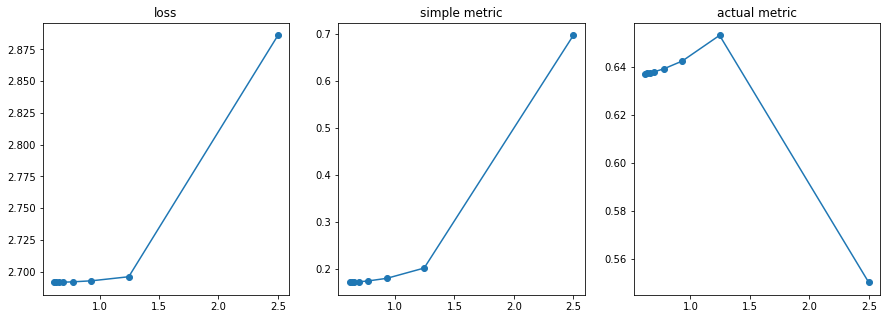

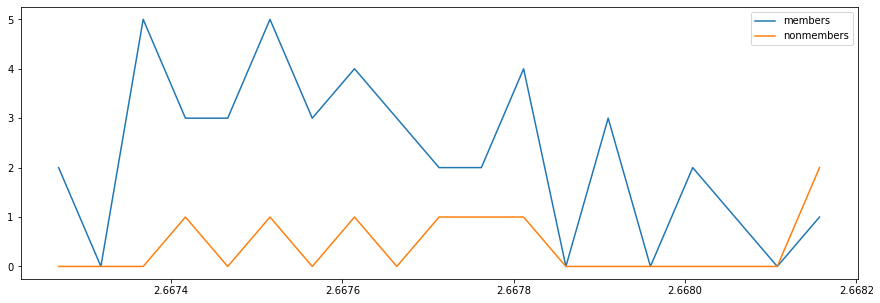

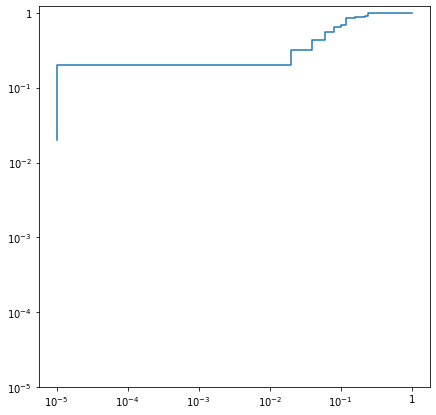

AUC SCORE 0.9196
epoch 60


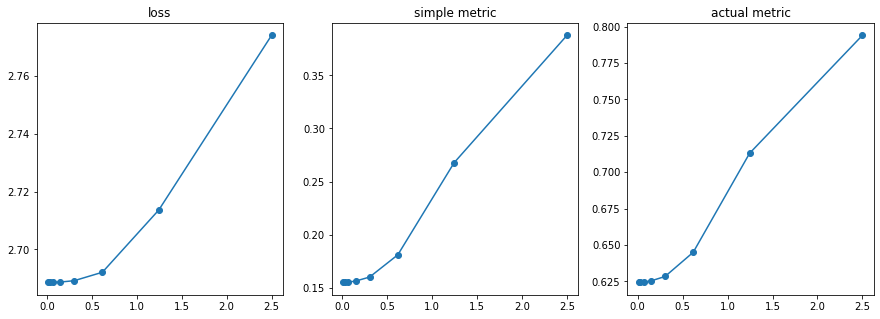

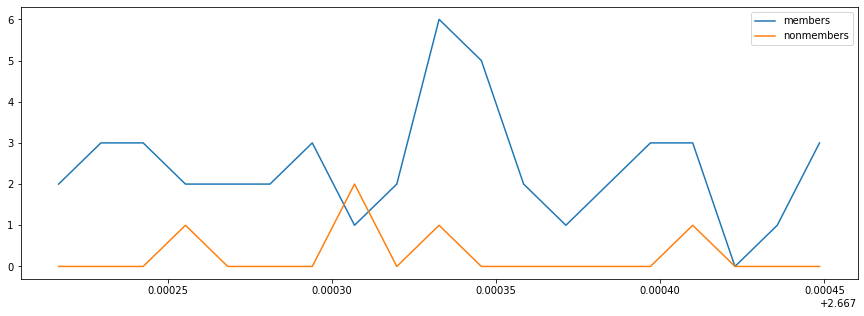

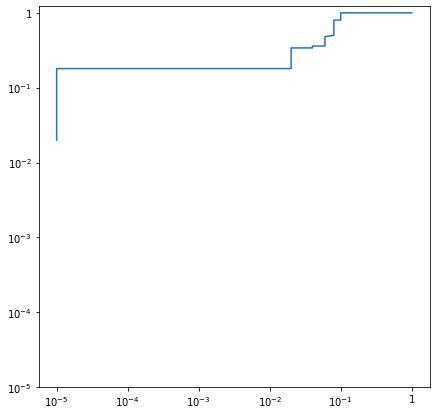

AUC SCORE 0.9434
epoch 70


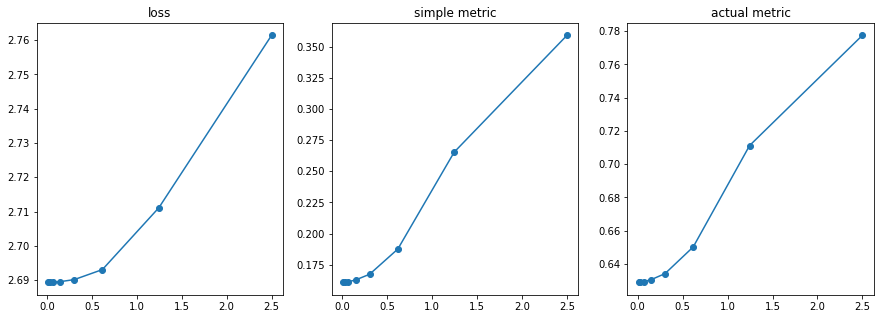

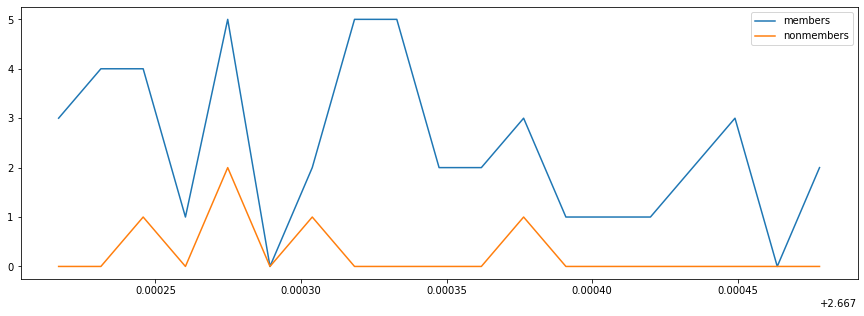

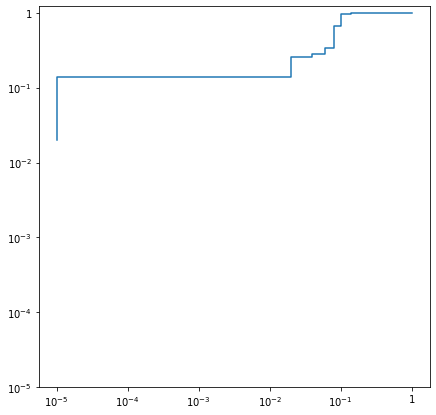

AUC SCORE 0.9319999999999999
epoch 80


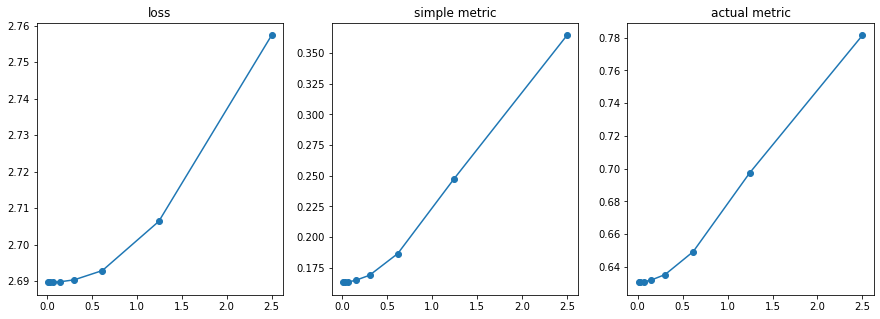

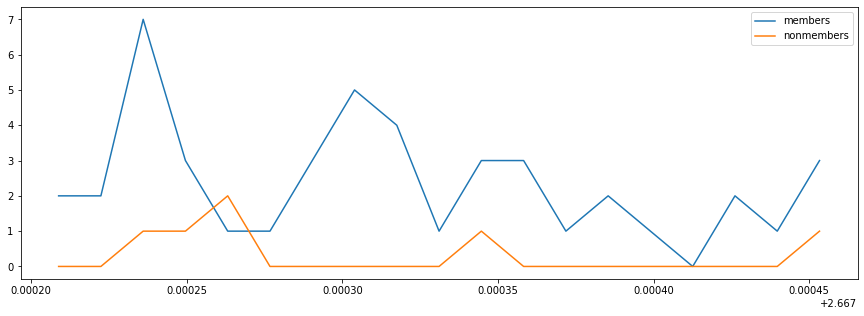

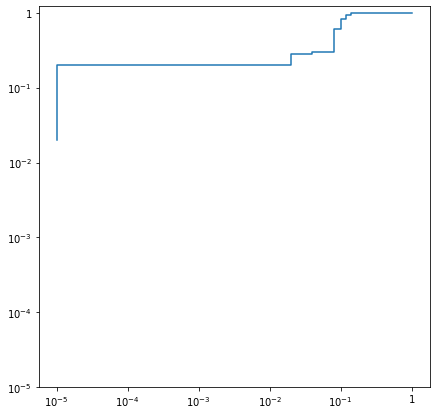

AUC SCORE 0.9292
epoch 90


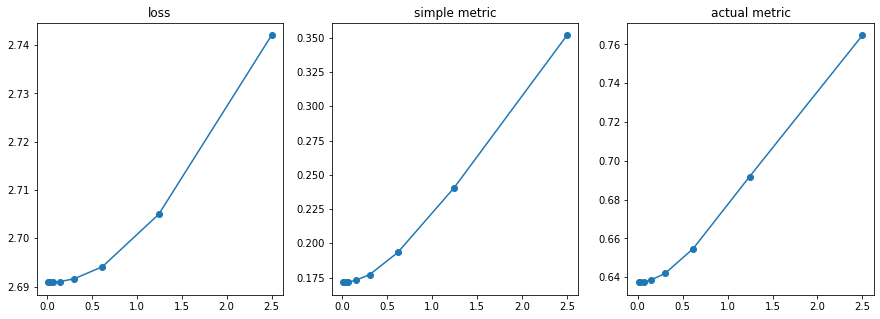

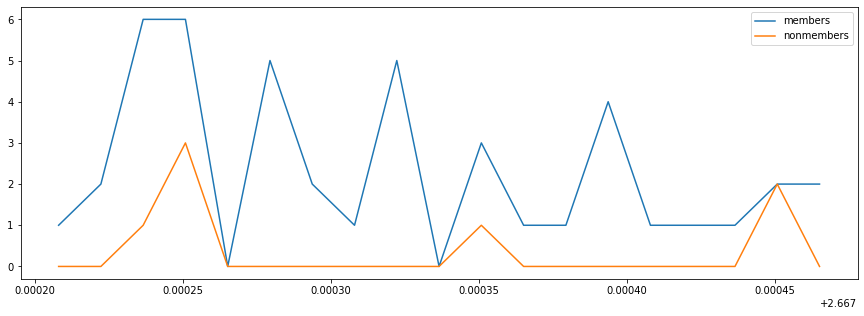

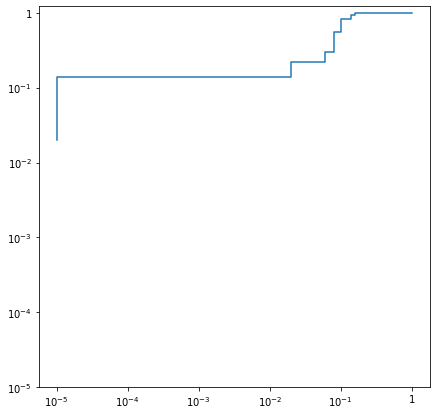

AUC SCORE 0.92


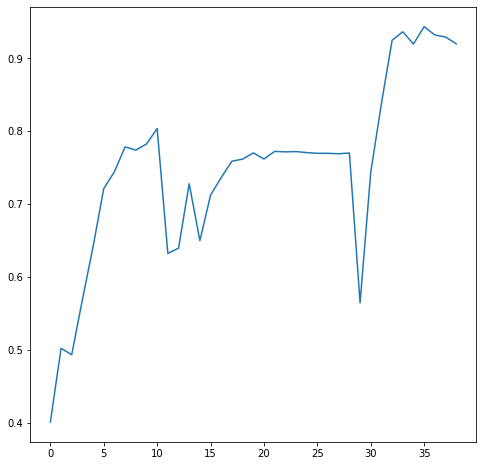

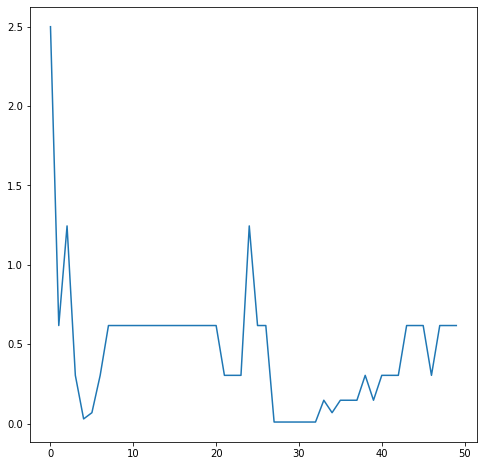

In [137]:
log_name = prefix + 'all_active_0_0_server_1_-1.0_1_40_0_0.0_0.0_0_0.0_0_purchase_4000_purchase.npy'
active_log = np.load(log_name,allow_pickle=True)
#print (active_log.shape)
epoch_list = [10*i for i in range(10)]
for epoch in epoch_list:
    fig = plt.figure(figsize=(15,5))
    this_epoch_log = np.array(active_log[epoch])
    steps = [this_epoch_log[i,0] for i in range(len(this_epoch_log))]
    targeted_loss = np.array(this_epoch_log[:len(steps),1])
    validation_loss =  this_epoch_log[:len(steps),2]
    train_acc = this_epoch_log[:len(steps),3]
    test_acc = this_epoch_log[:len(steps),4]
    diff_metric = np.array(this_epoch_log[:len(steps),5])
    this_epoch_loss = this_epoch_log[:len(steps),-1]
    #print (this_epoch_loss.shape)
    
    this_epoch_actual_dis_metric = np.array([cal_dis_metric(this_epoch_loss[i]) for i in range(len(this_epoch_loss))])
    #print (this_epoch_actual_dis_metric)
    #plt.subplot(1,2,1)
    #plt.plot(steps,targeted_loss)
    #plt.plot(steps,validation_loss)
    #plt.legend(['targeted set loss','validation loss'])
    
    #print (np.argsort(steps))
    index = np.argsort(steps)
    
    plt.subplot(1,3,1)
    plt.plot(np.array(steps)[index],np.array(targeted_loss)[index],marker='o')
    plt.title('loss')
    #print (targeted_loss[:3])
    
    plt.subplot(1,3,2)
    plt.plot(np.array(steps)[index],np.array(diff_metric)[index],marker='o')
    plt.title('simple metric')
    
    plt.subplot(1,3,3)
    plt.plot(np.array(steps)[index],np.array(this_epoch_actual_dis_metric)[index],marker='o')
    plt.title('actual metric')
    
    print (f"epoch {epoch}")
    #print (np.argmin(targeted_loss),np.argmax(diff_metric),np.argmax(this_epoch_actual_dis_metric))
    plt.show()
    
    
    idx = np.argmin(targeted_loss)
    loss = this_epoch_loss[idx]
    member_loss = loss[:int(len(loss)/2)]
    nonmember_loss = loss[int(len(loss)/2):]
    
    sorted_loss = np.sort(loss)
    
    bins = np.linspace(sorted_loss[0],sorted_loss[-50],20)
    member_counts,bins = np.histogram(member_loss,bins)
    nonmember_counts,_ = np.histogram(nonmember_loss,bins)
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(bins[1:],member_counts)
    plt.plot(bins[1:],nonmember_counts)
    plt.legend(['members','nonmembers'])
    plt.show()
    
    from sklearn import metrics
    
    fig = plt.figure(figsize=(7,7))
    start_offset = 1e-5
    true_label = np.concatenate((np.ones((int(len(loss)/2))),np.zeros((int(len(loss)/2)))))
    fpr, tpr, thresholds = metrics.roc_curve(true_label, -1*loss, pos_label=1)
    for i in range(len(fpr)):
        if (fpr[i] == 0.0):
            fpr[i] = start_offset
        else:
            break
    log_fpr = np.log10(fpr)
    log_tpr = np.log10(tpr)
    plt.plot(log_fpr,log_tpr)
    plt.xticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.yticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.show()
    
    auc_score = roc_auc_score(true_label,-1*loss)
    auc_score_list.append(auc_score)
    print (f"AUC SCORE {auc_score}")
                
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(len(auc_score_list)),auc_score_list)
plt.show()


epoch_list = [2*i for i in range(50)]
alpha_list = []
for epoch in epoch_list:
    
    this_epoch_log = np.array(active_log[epoch])
    steps = [this_epoch_log[i,0] for i in range(len(this_epoch_log))]
    targeted_loss = np.array(this_epoch_log[:len(steps),1])
    validation_loss =  np.array(this_epoch_log[:len(steps),2])
    alpha_list.append(steps[np.argmin(validation_loss)])
    

fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(len(alpha_list)),alpha_list)
plt.show()


epoch 0


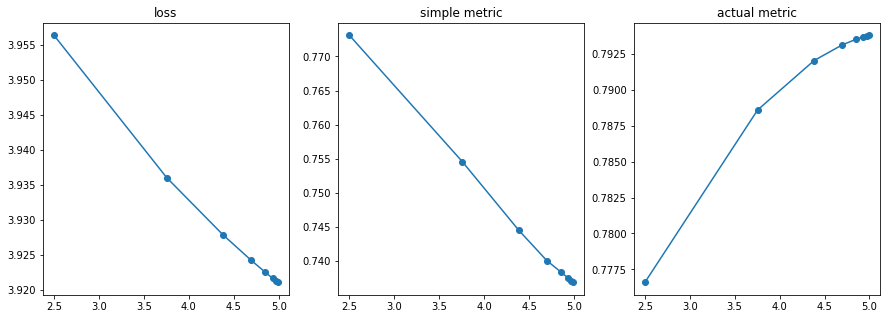

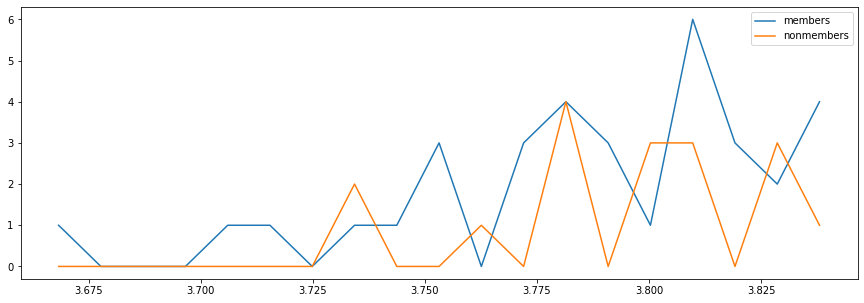

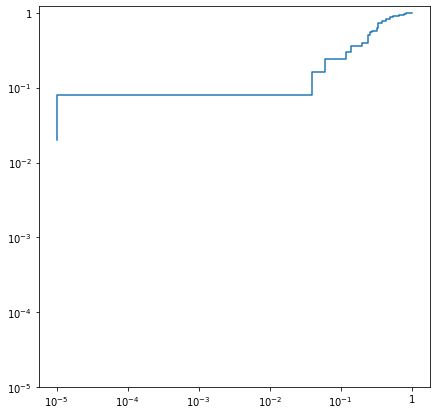

AUC SCORE 0.7204
epoch 10


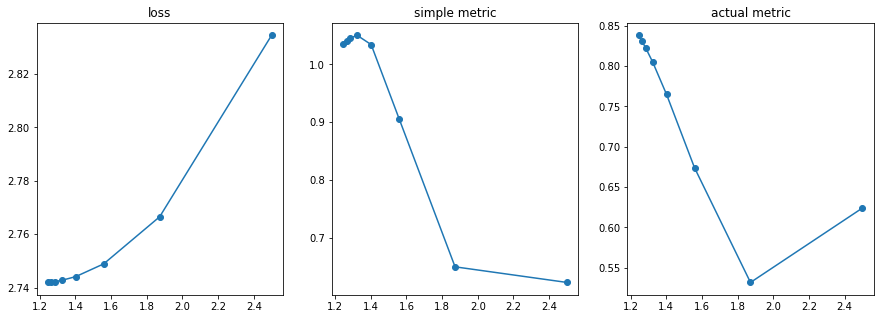

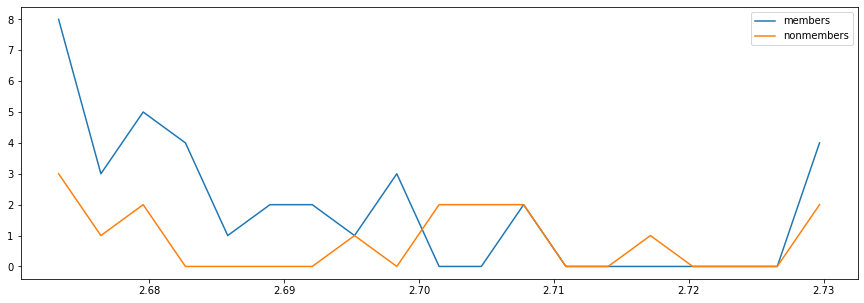

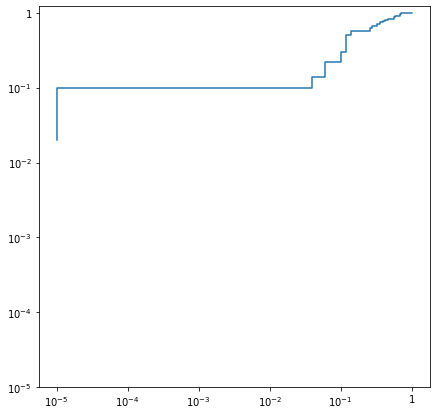

AUC SCORE 0.7532
epoch 20


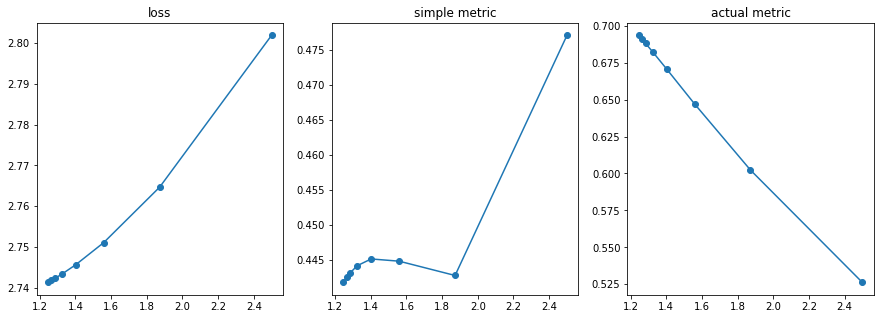

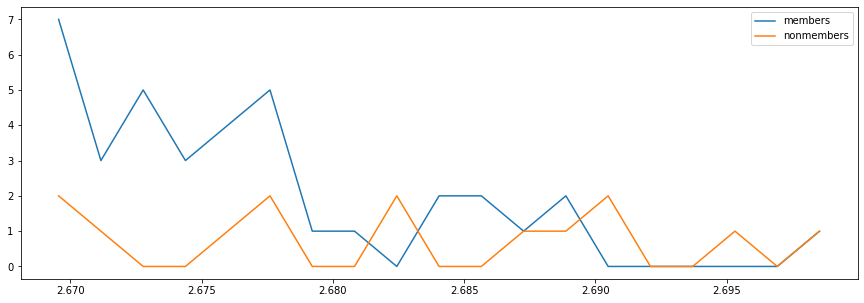

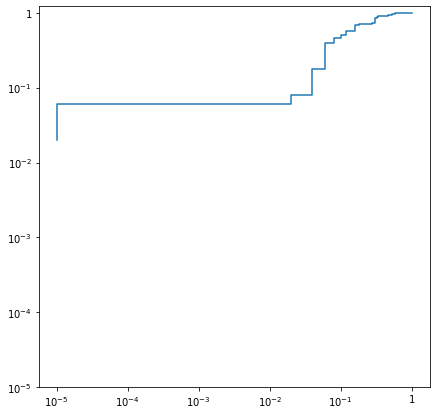

AUC SCORE 0.8284
epoch 30


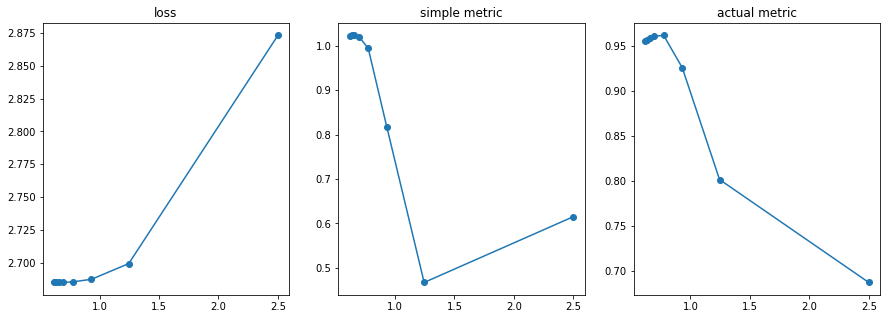

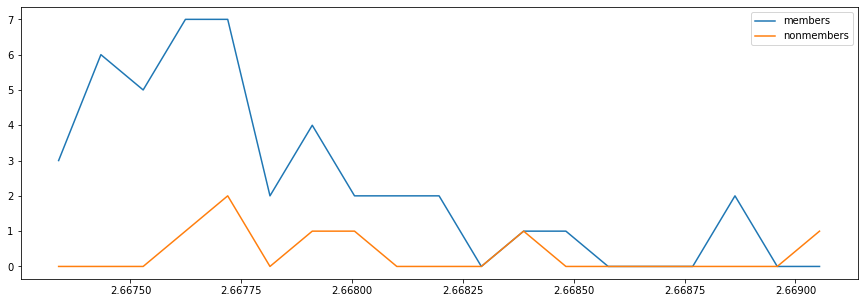

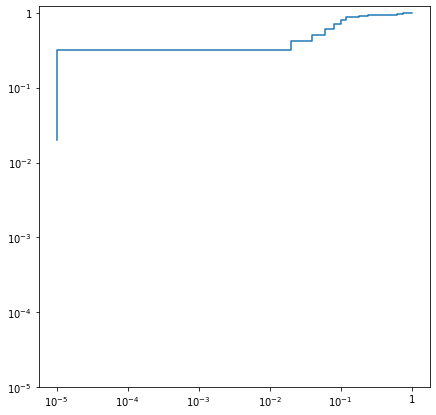

AUC SCORE 0.9063999999999999
epoch 40


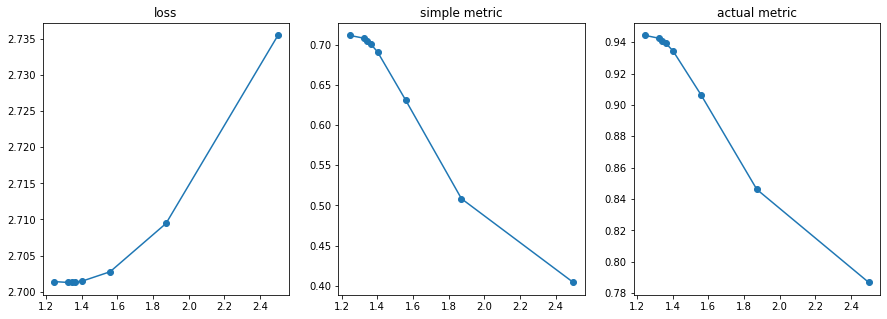

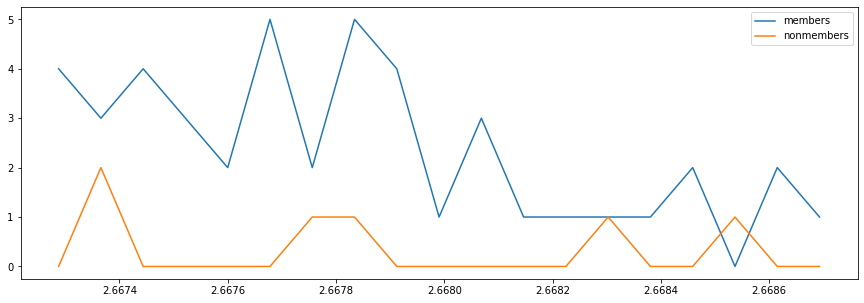

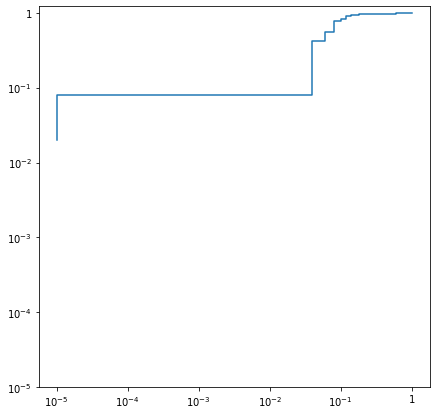

AUC SCORE 0.9139999999999999
epoch 50


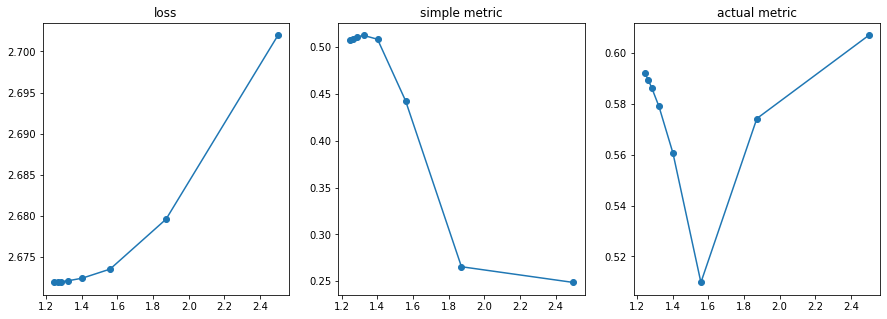

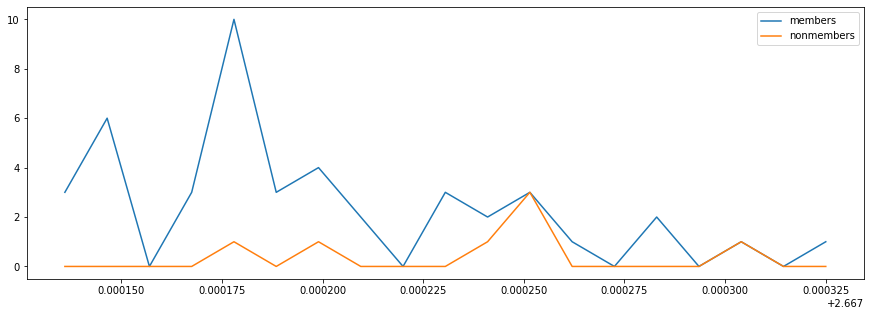

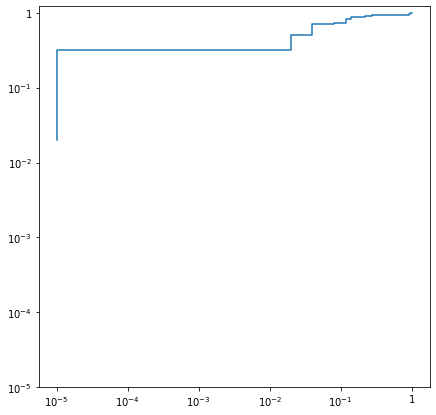

AUC SCORE 0.8952
epoch 60


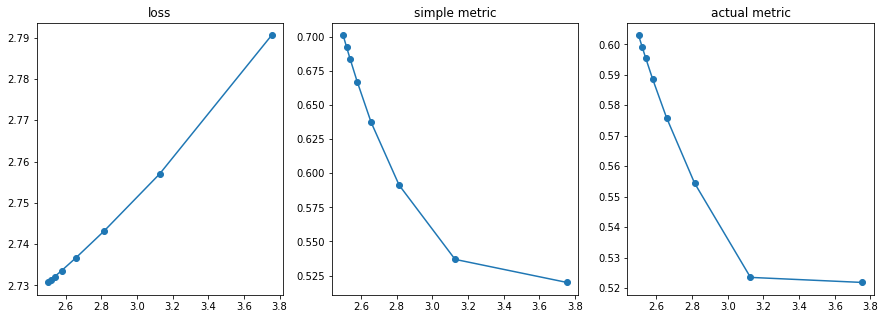

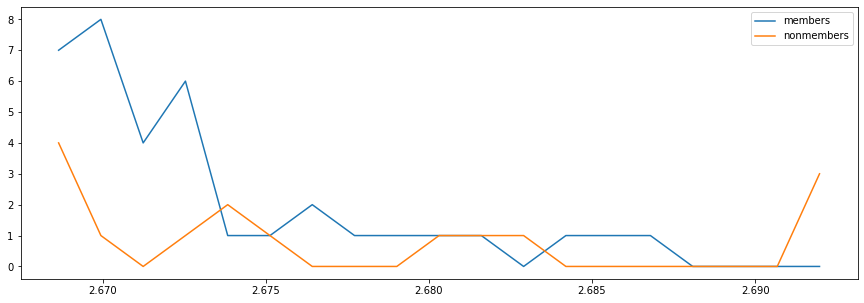

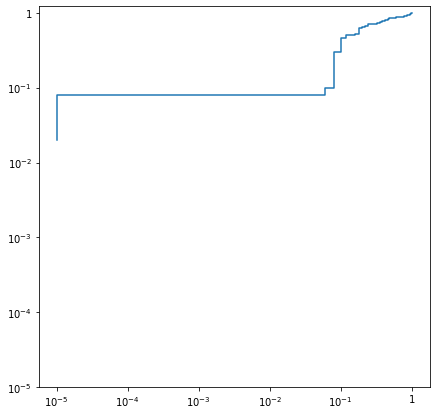

AUC SCORE 0.7399999999999999
epoch 70


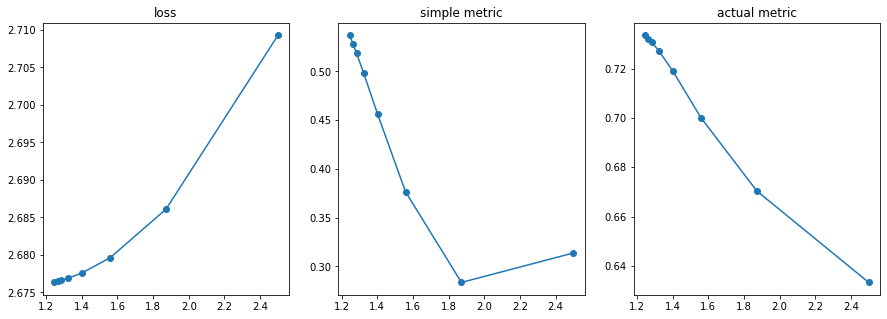

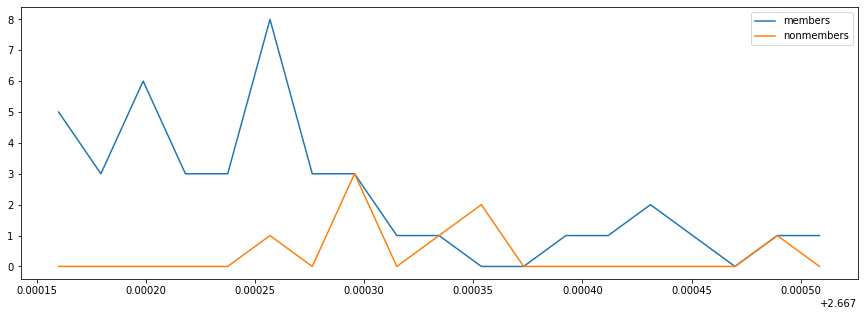

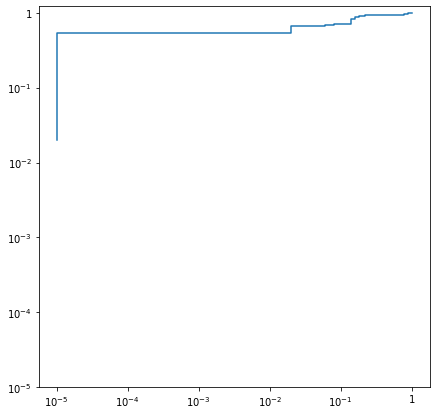

AUC SCORE 0.9067999999999999
epoch 80


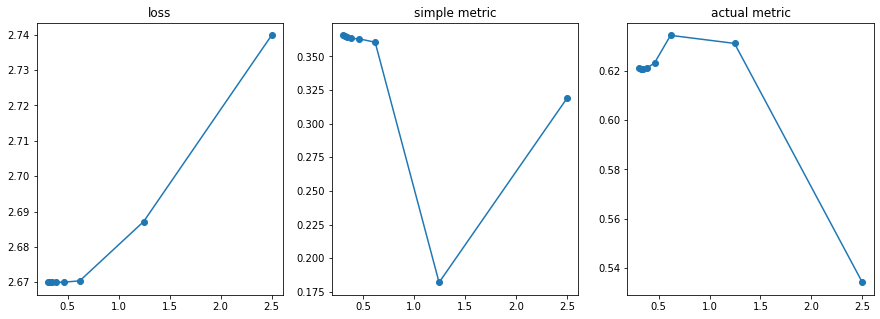

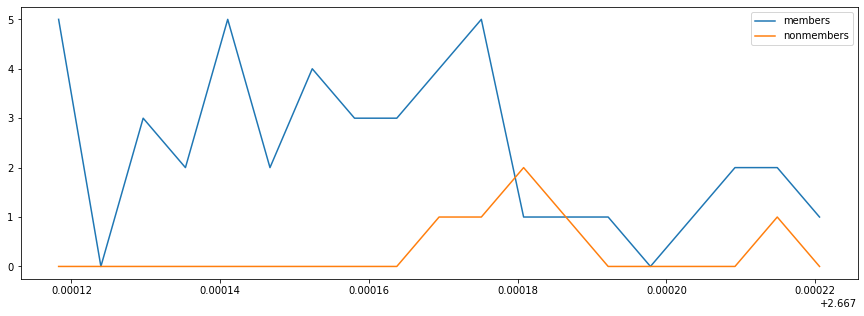

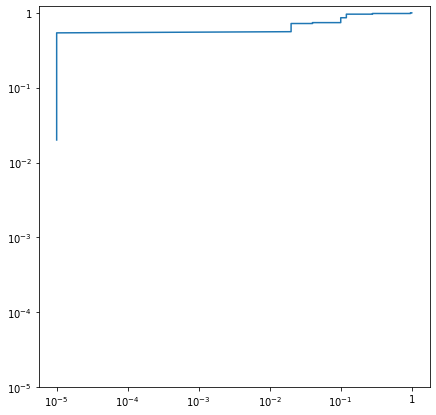

AUC SCORE 0.9470000000000001
epoch 90


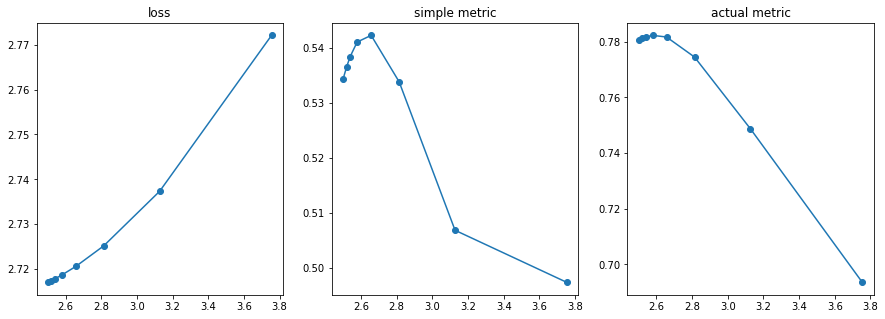

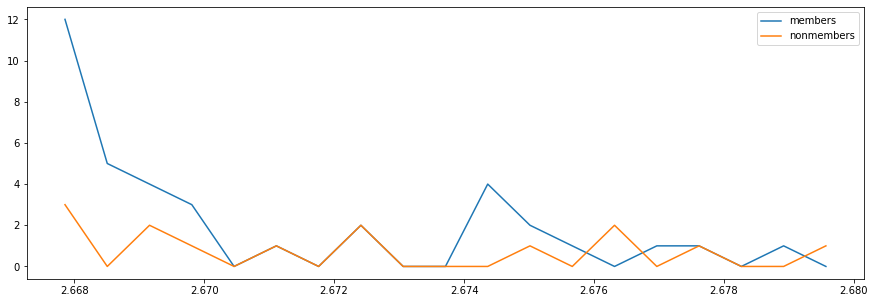

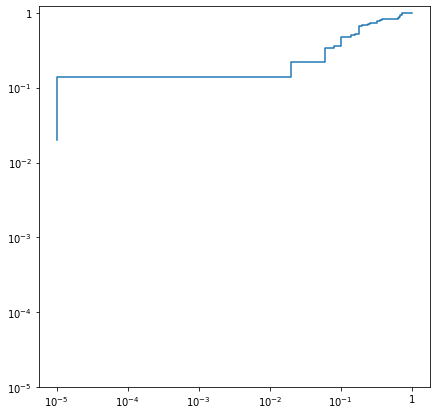

AUC SCORE 0.7744


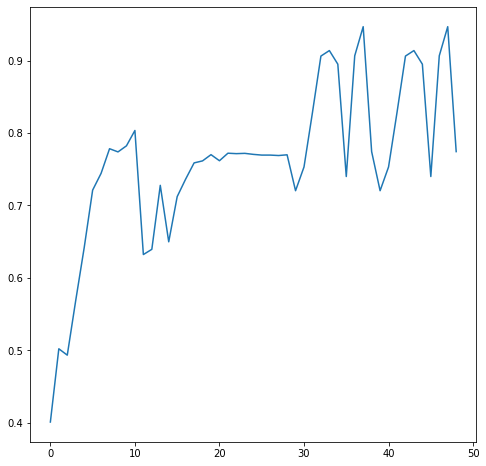

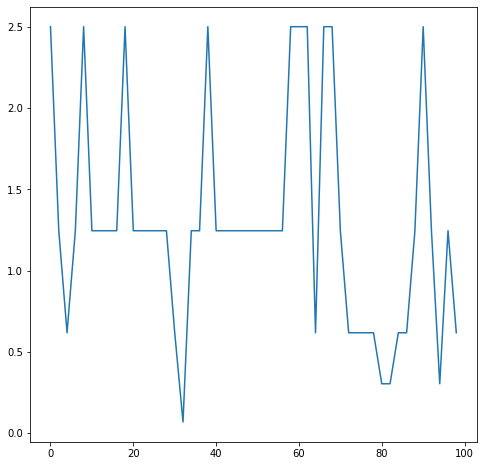

In [134]:
log_name = prefix + 'all_active_4_0_server_1_-1.0_1_40_0_0.0_0.0_0_0.0_0_texas_4000_texas.npy'
active_log = np.load(log_name,allow_pickle=True)
#print (active_log.shape)
epoch_list = [10*i for i in range(10)]
for epoch in epoch_list:
    fig = plt.figure(figsize=(15,5))
    this_epoch_log = np.array(active_log[epoch])
    steps = [this_epoch_log[i,0] for i in range(len(this_epoch_log))]
    targeted_loss = np.array(this_epoch_log[:len(steps),1])
    validation_loss =  this_epoch_log[:len(steps),2]
    train_acc = this_epoch_log[:len(steps),3]
    test_acc = this_epoch_log[:len(steps),4]
    diff_metric = np.array(this_epoch_log[:len(steps),5])
    this_epoch_loss = this_epoch_log[:len(steps),-1]
    #print (this_epoch_loss.shape)
    
    this_epoch_actual_dis_metric = np.array([cal_dis_metric(this_epoch_loss[i]) for i in range(len(this_epoch_loss))])
    #print (this_epoch_actual_dis_metric)
    #plt.subplot(1,2,1)
    #plt.plot(steps,targeted_loss)
    #plt.plot(steps,validation_loss)
    #plt.legend(['targeted set loss','validation loss'])
    
    #print (np.argsort(steps))
    index = np.argsort(steps)
    
    plt.subplot(1,3,1)
    plt.plot(np.array(steps)[index],np.array(targeted_loss)[index],marker='o')
    plt.title('loss')
    #print (targeted_loss[:3])
    
    plt.subplot(1,3,2)
    plt.plot(np.array(steps)[index],np.array(diff_metric)[index],marker='o')
    plt.title('simple metric')
    
    plt.subplot(1,3,3)
    plt.plot(np.array(steps)[index],np.array(this_epoch_actual_dis_metric)[index],marker='o')
    plt.title('actual metric')
    
    print (f"epoch {epoch}")
    #print (np.argmin(targeted_loss),np.argmax(diff_metric),np.argmax(this_epoch_actual_dis_metric))
    plt.show()
    
    
    idx = np.argmin(targeted_loss)
    loss = this_epoch_loss[idx]
    member_loss = loss[:int(len(loss)/2)]
    nonmember_loss = loss[int(len(loss)/2):]
    
    sorted_loss = np.sort(loss)
    
    bins = np.linspace(sorted_loss[0],sorted_loss[-50],20)
    member_counts,bins = np.histogram(member_loss,bins)
    nonmember_counts,_ = np.histogram(nonmember_loss,bins)
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(bins[1:],member_counts)
    plt.plot(bins[1:],nonmember_counts)
    plt.legend(['members','nonmembers'])
    plt.show()
    
    from sklearn import metrics
    
    fig = plt.figure(figsize=(7,7))
    start_offset = 1e-5
    true_label = np.concatenate((np.ones((int(len(loss)/2))),np.zeros((int(len(loss)/2)))))
    fpr, tpr, thresholds = metrics.roc_curve(true_label, -1*loss, pos_label=1)
    for i in range(len(fpr)):
        if (fpr[i] == 0.0):
            fpr[i] = start_offset
        else:
            break
    log_fpr = np.log10(fpr)
    log_tpr = np.log10(tpr)
    plt.plot(log_fpr,log_tpr)
    plt.xticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.yticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.show()
    
    auc_score = roc_auc_score(true_label,-1*loss)
    auc_score_list.append(auc_score)
    print (f"AUC SCORE {auc_score}")
                
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(len(auc_score_list)),auc_score_list)
plt.show()


epoch_list = [2*i for i in range(50)]
alpha_list = []
for epoch in epoch_list:
    
    this_epoch_log = np.array(active_log[epoch])
    steps = [this_epoch_log[i,0] for i in range(len(this_epoch_log))]
    targeted_loss = np.array(this_epoch_log[:len(steps),1])
    validation_loss =  np.array(this_epoch_log[:len(steps),2])
    alpha_list.append(steps[np.argmin(validation_loss)])
    

fig = plt.figure(figsize=(8,8))
plt.plot(epoch_list,alpha_list)
plt.show()


epoch 0


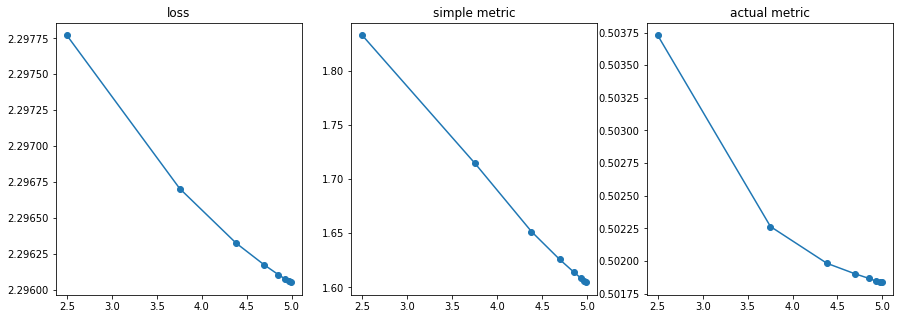

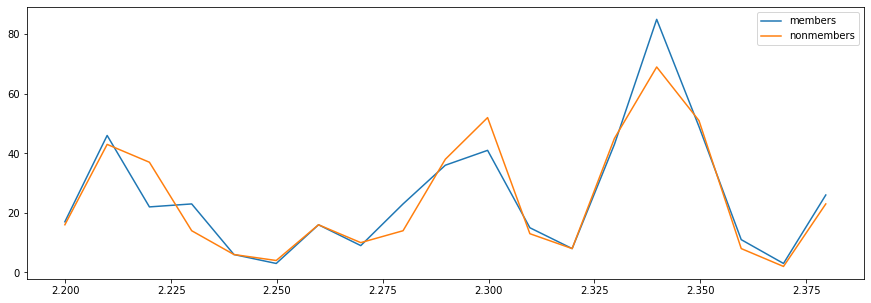

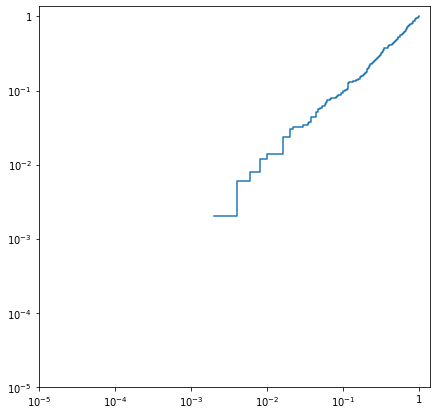

AUC SCORE 0.49909600000000004
epoch 10


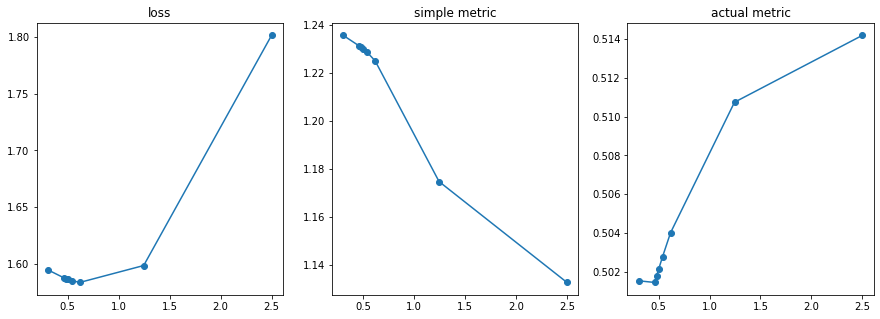

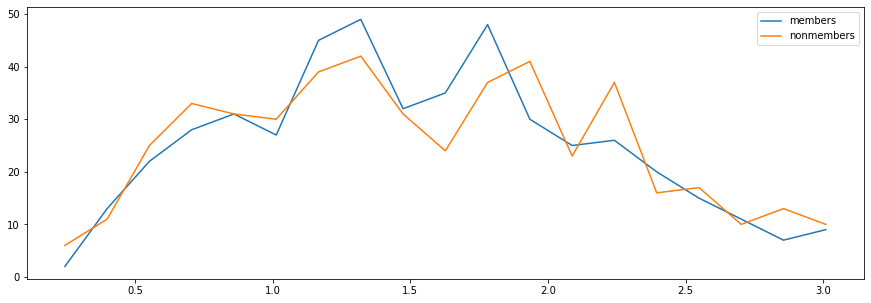

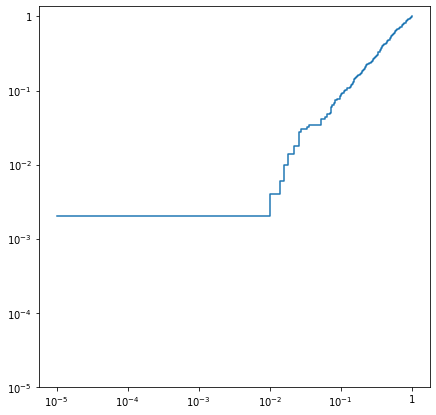

AUC SCORE 0.50412
epoch 20


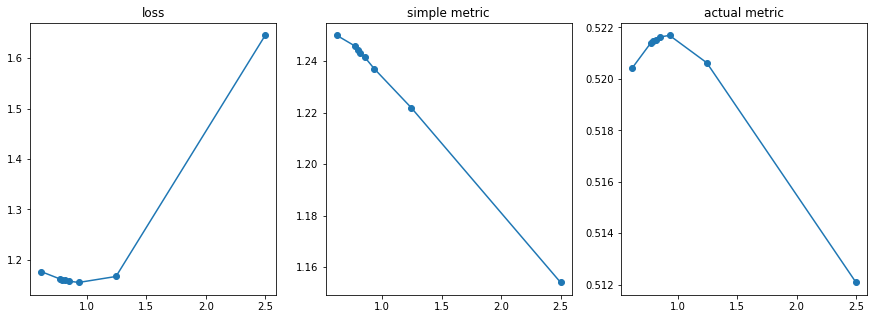

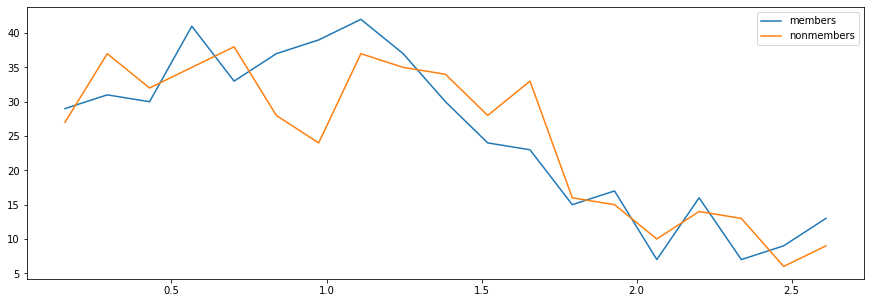

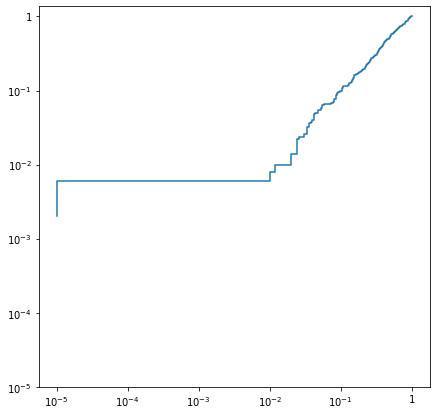

AUC SCORE 0.51674
epoch 30


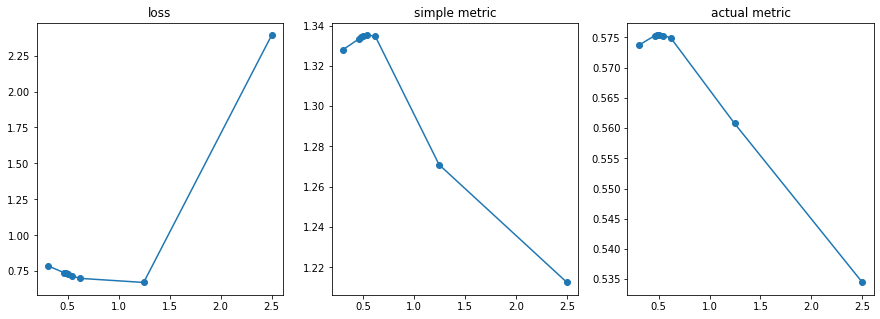

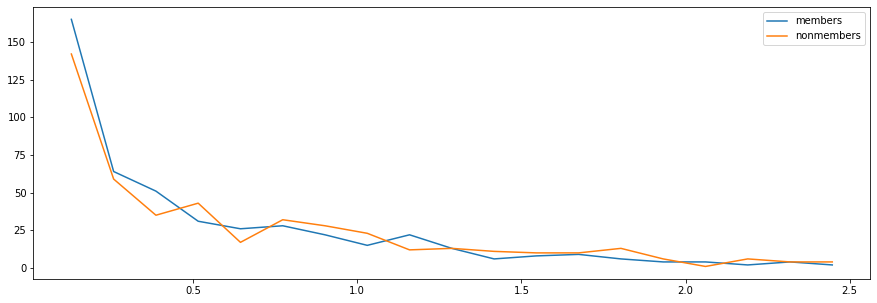

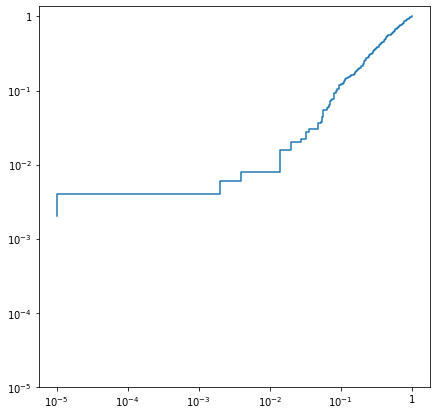

AUC SCORE 0.545688
epoch 40


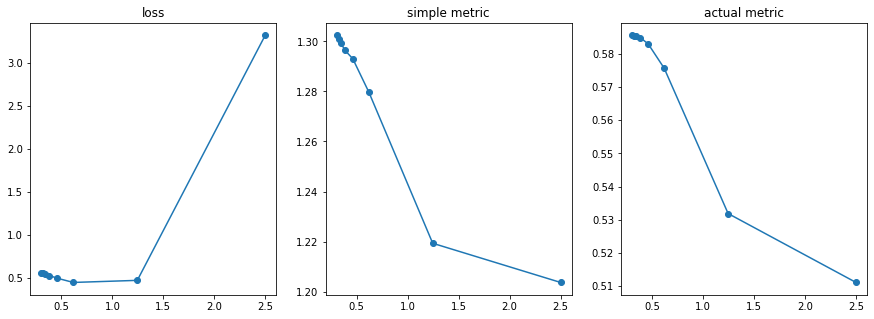

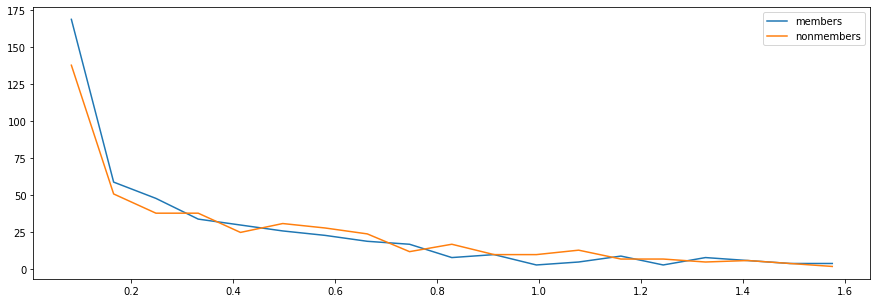

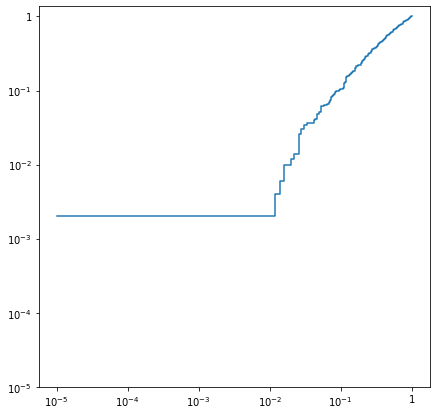

AUC SCORE 0.558844
epoch 50


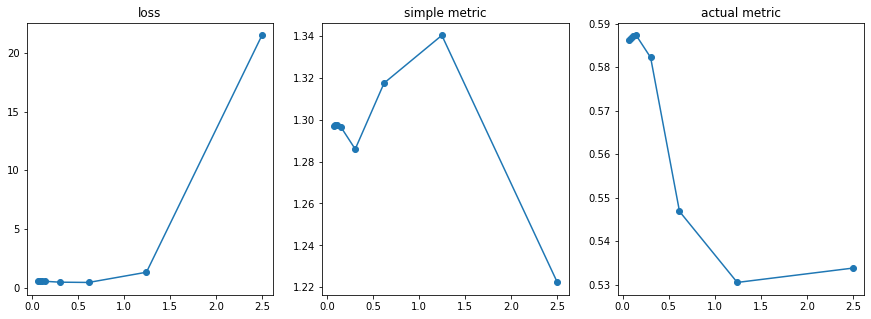

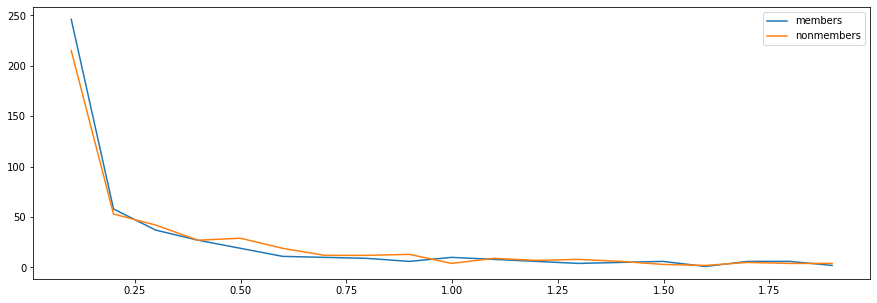

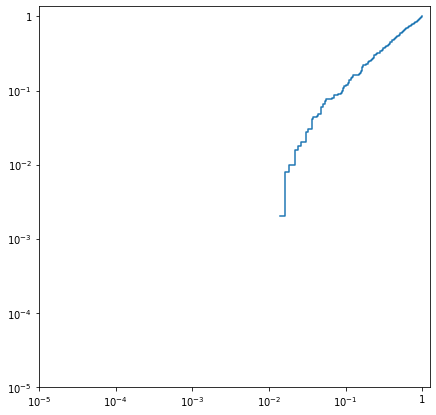

AUC SCORE 0.539072
epoch 60


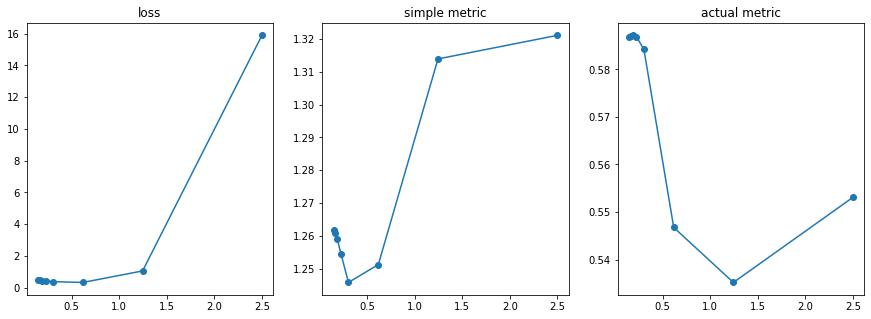

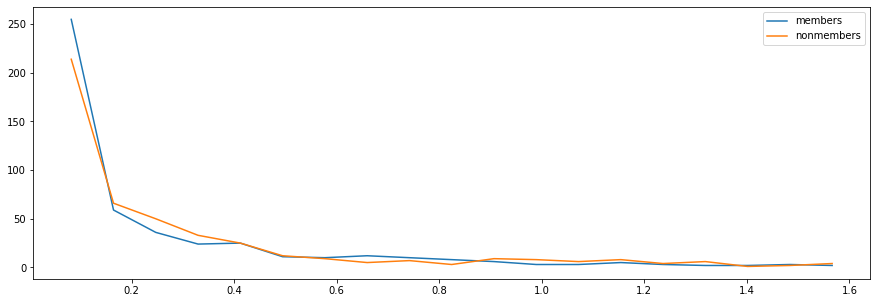

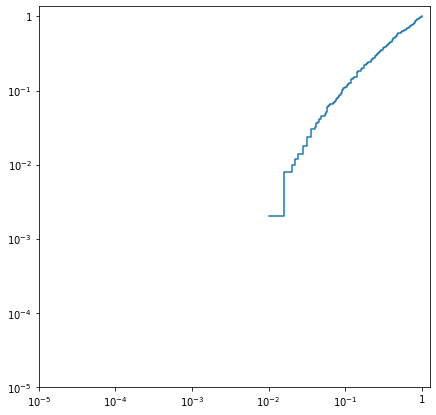

AUC SCORE 0.5387919999999999
epoch 70


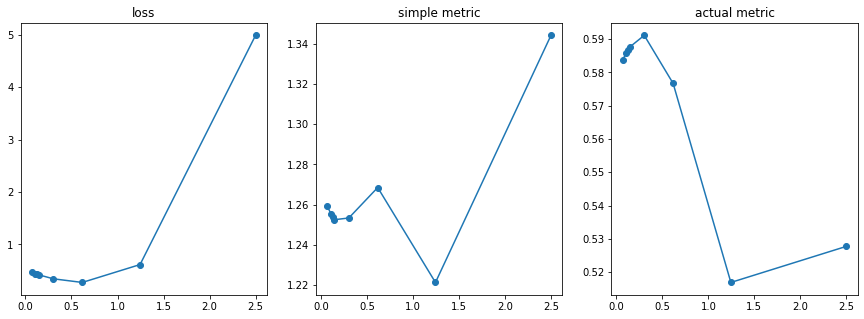

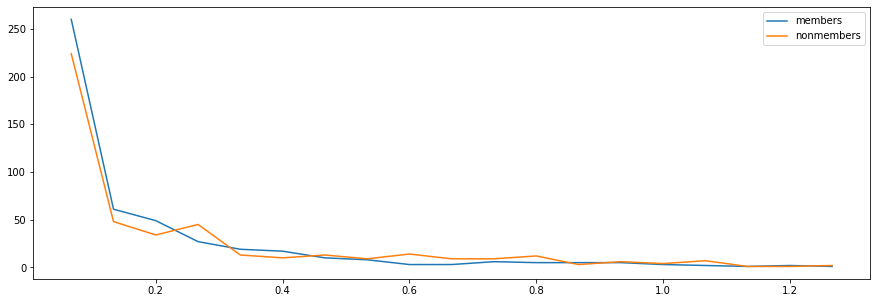

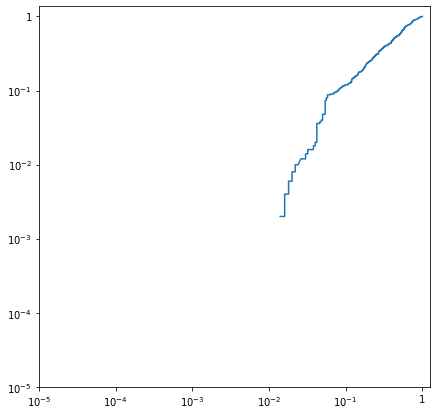

AUC SCORE 0.56465
epoch 80


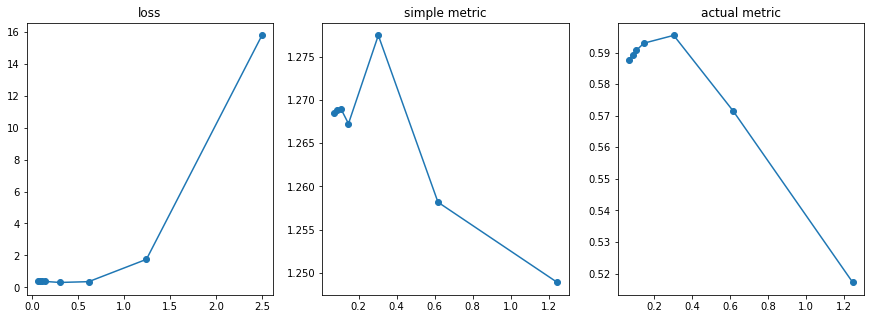

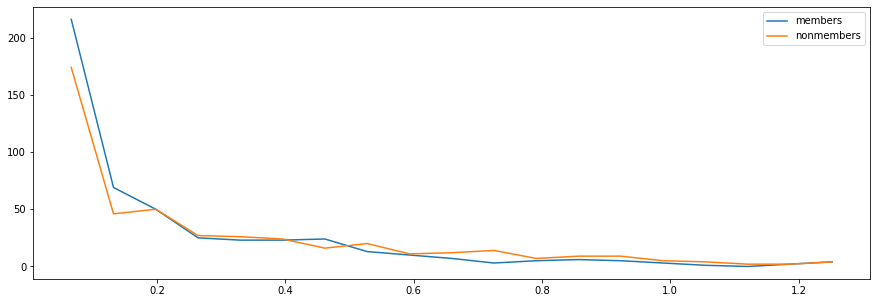

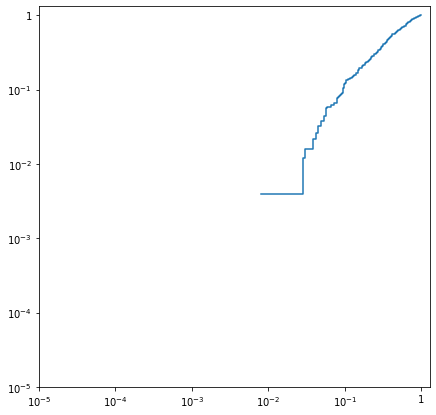

AUC SCORE 0.5808559999999999
epoch 90


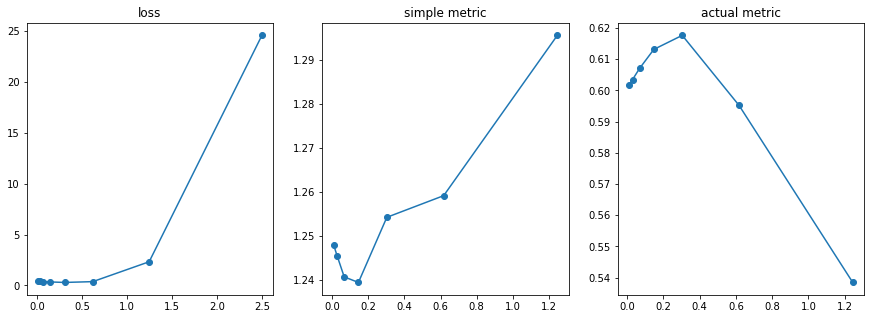

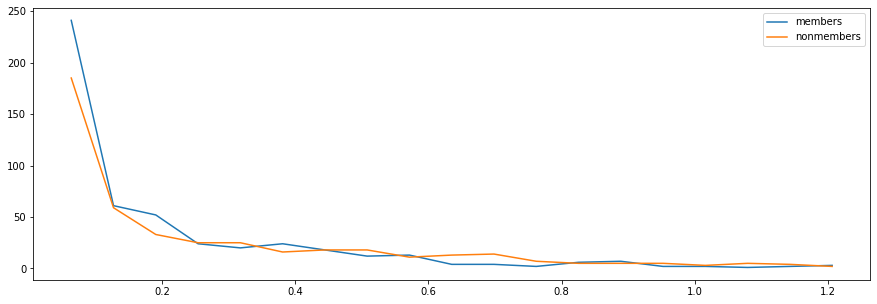

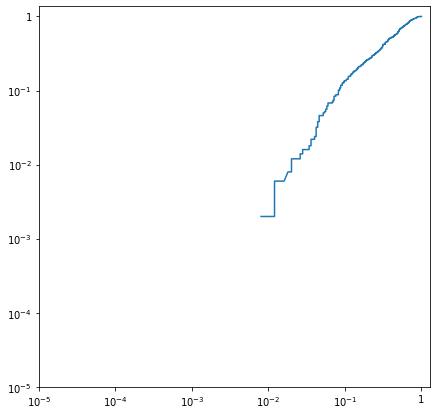

AUC SCORE 0.594204
epoch 100


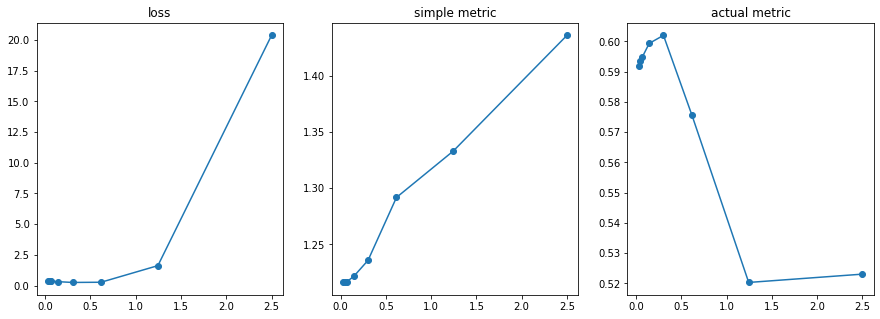

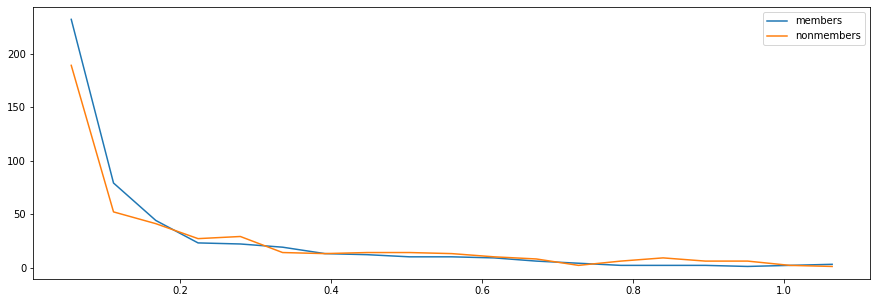

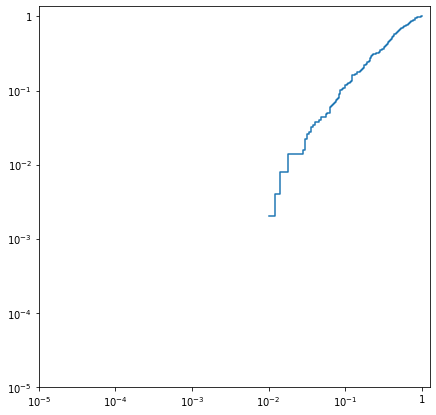

AUC SCORE 0.584404
epoch 110


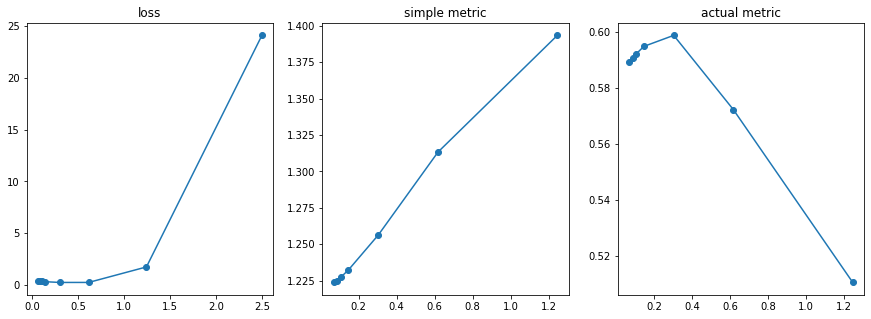

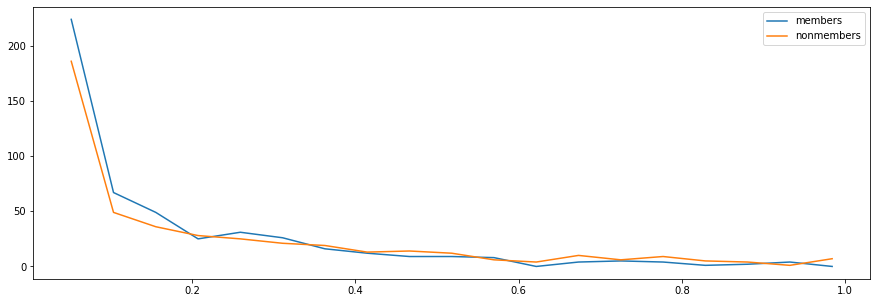

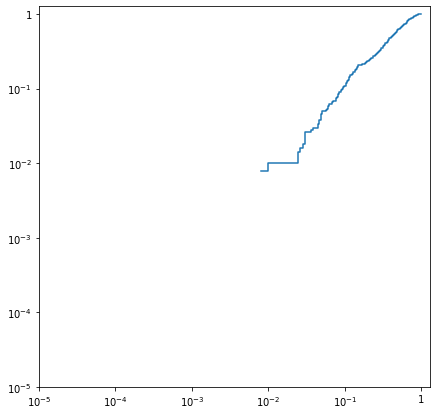

AUC SCORE 0.58224
epoch 120


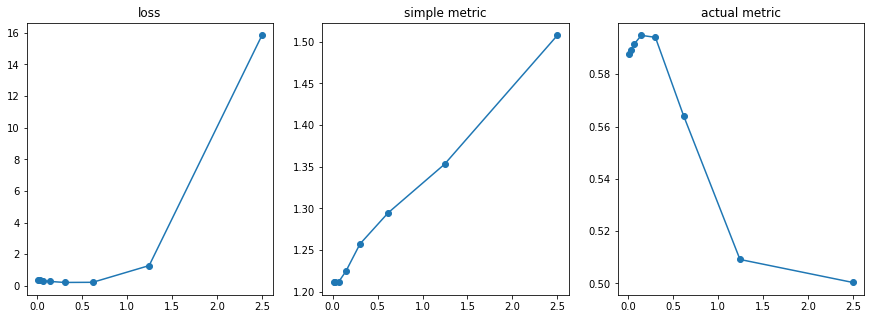

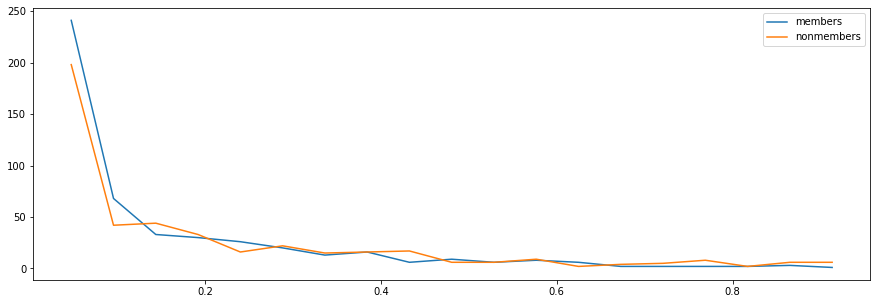

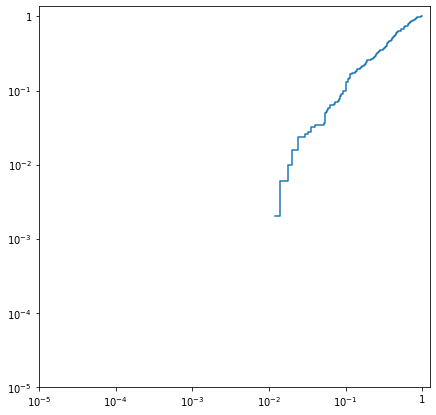

AUC SCORE 0.5805440000000001
epoch 130


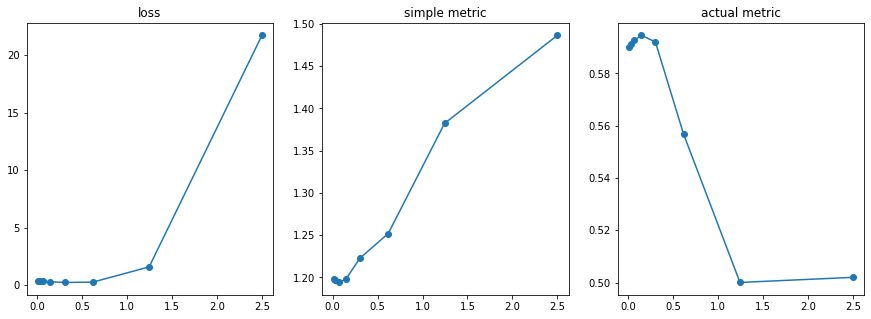

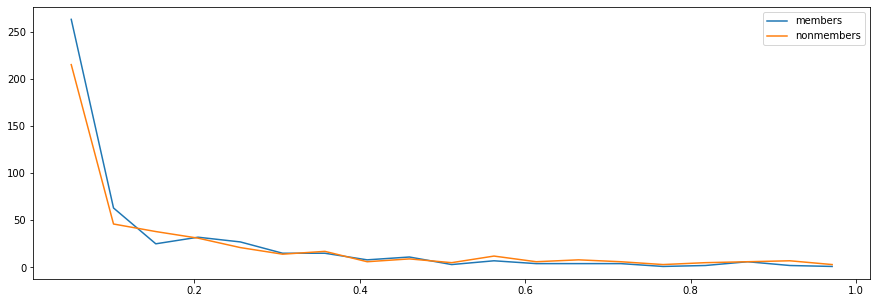

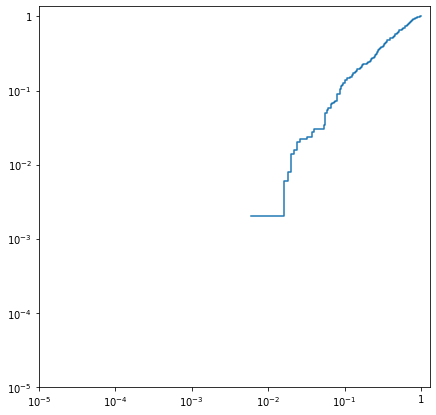

AUC SCORE 0.577424
epoch 140


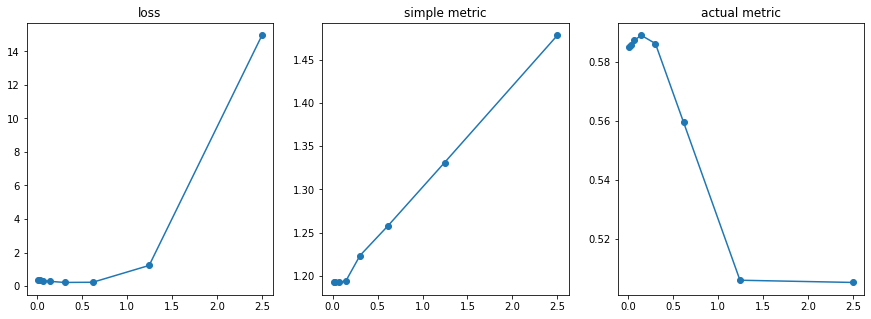

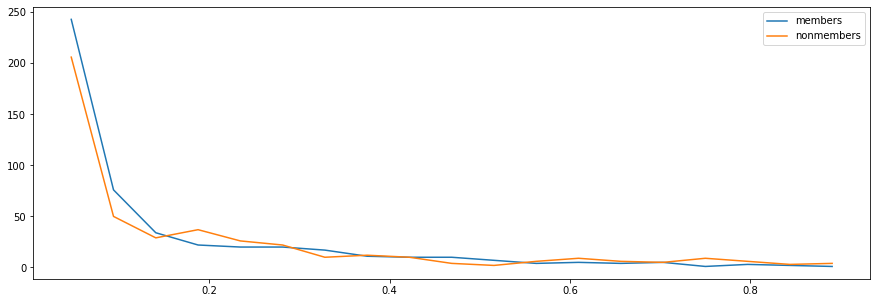

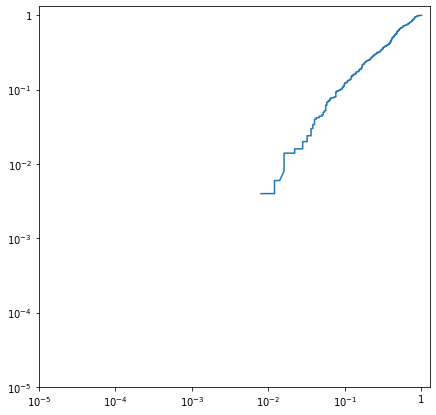

AUC SCORE 0.571028
epoch 150


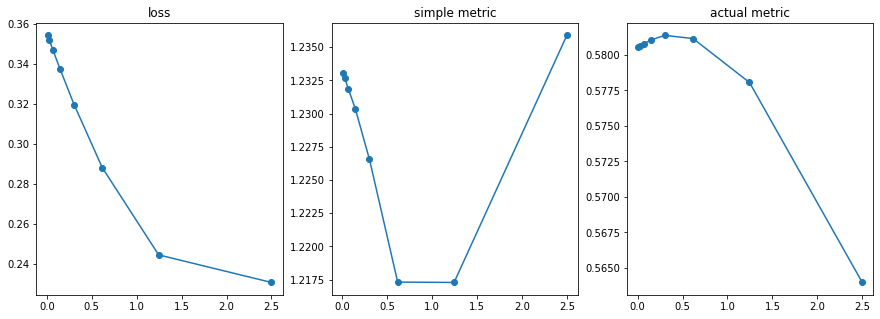

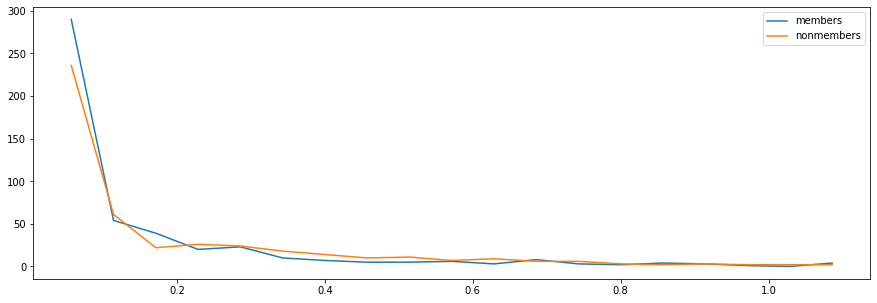

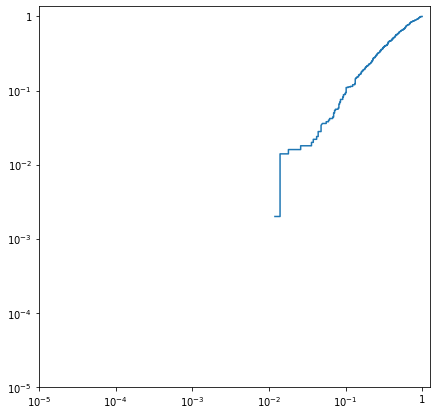

AUC SCORE 0.563394
epoch 160


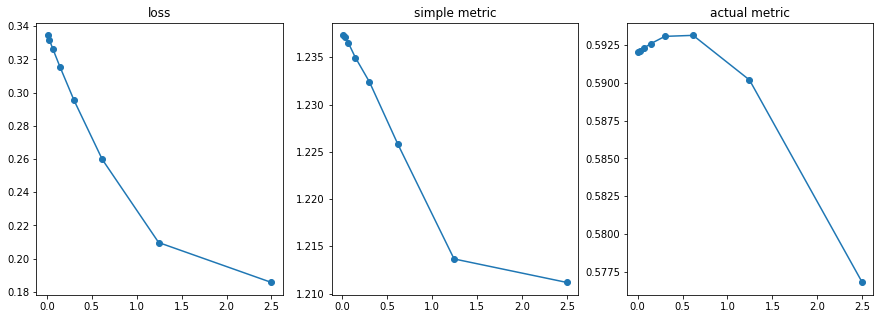

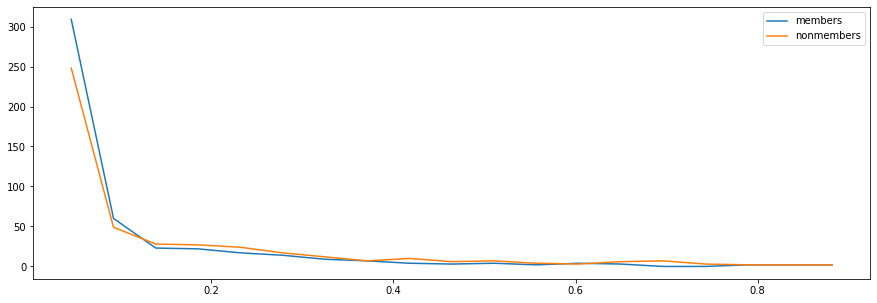

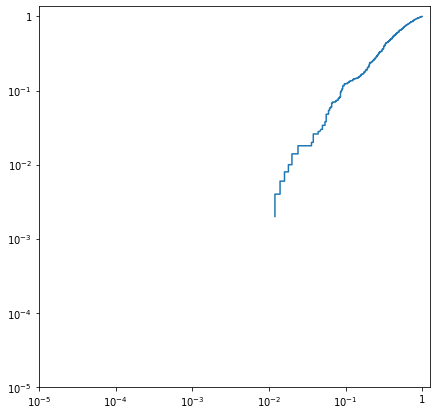

AUC SCORE 0.574752
epoch 170


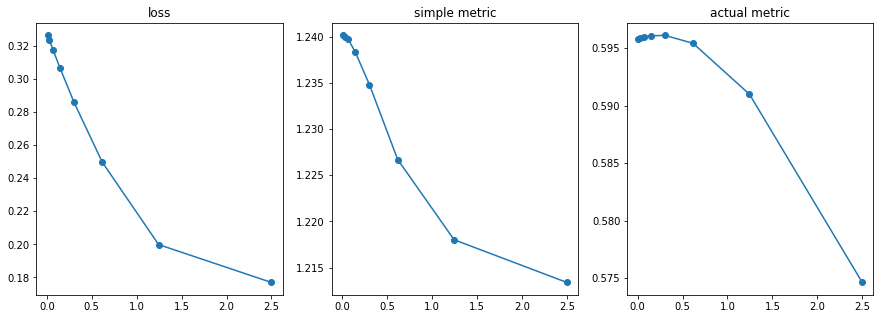

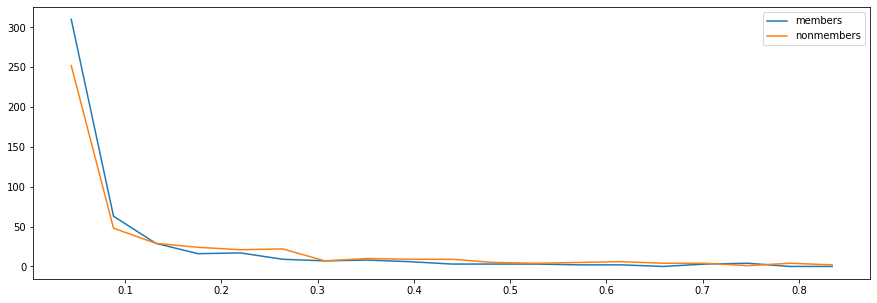

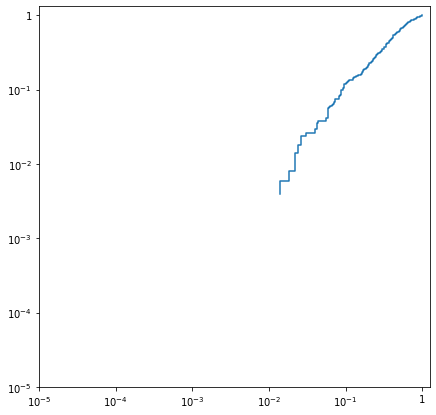

AUC SCORE 0.5724360000000001
epoch 180


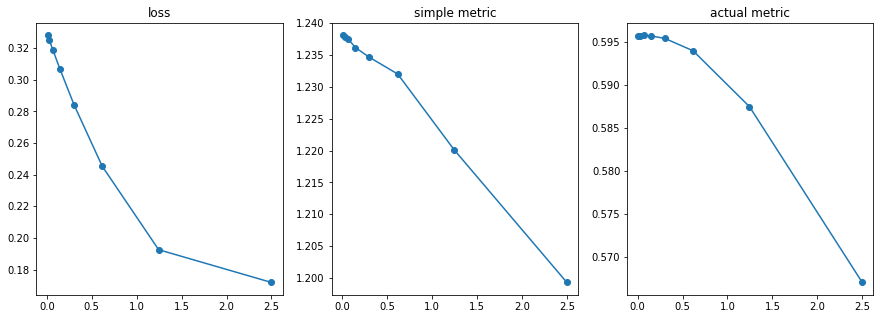

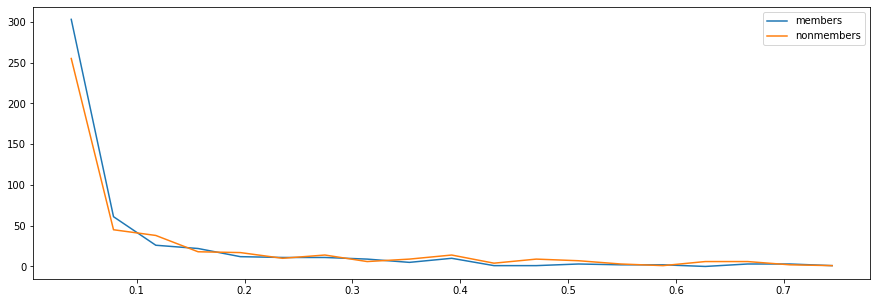

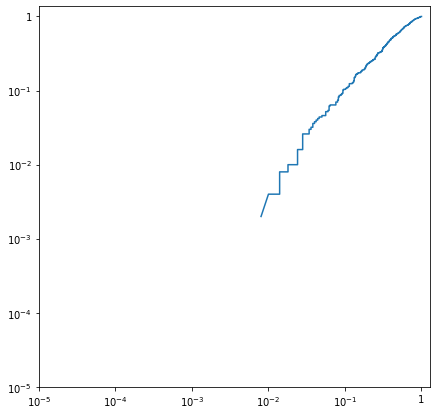

AUC SCORE 0.565456
epoch 190


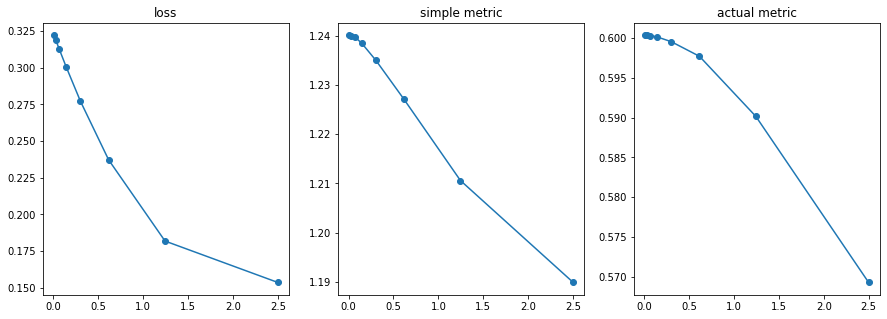

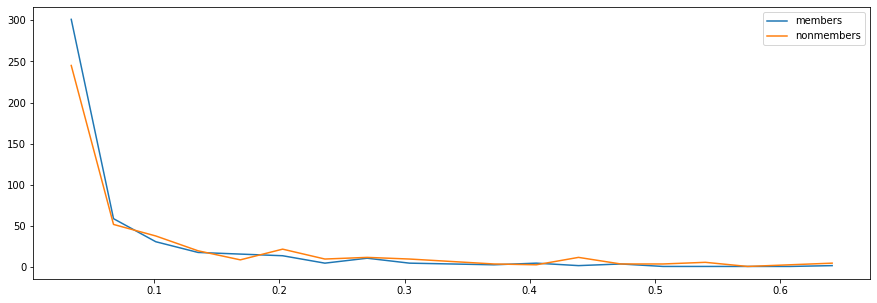

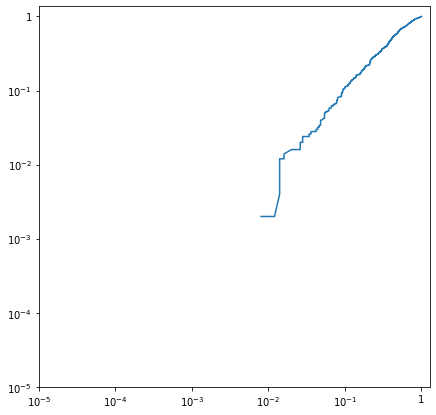

AUC SCORE 0.5691620000000001
epoch 200


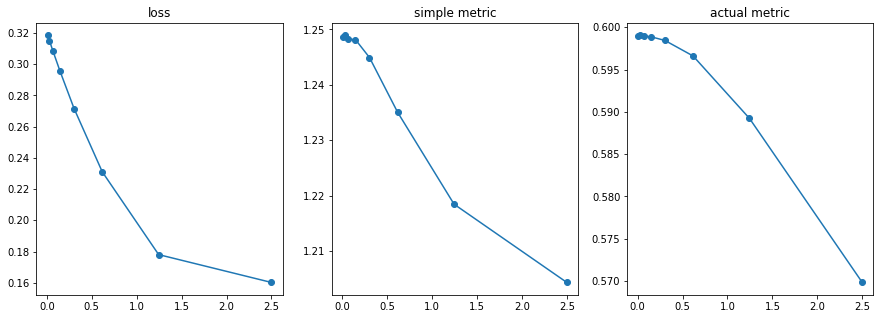

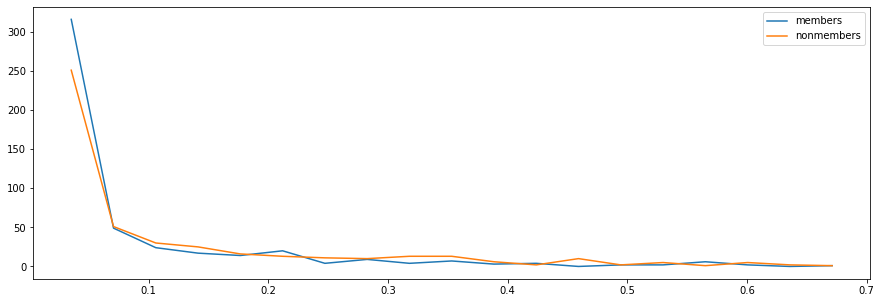

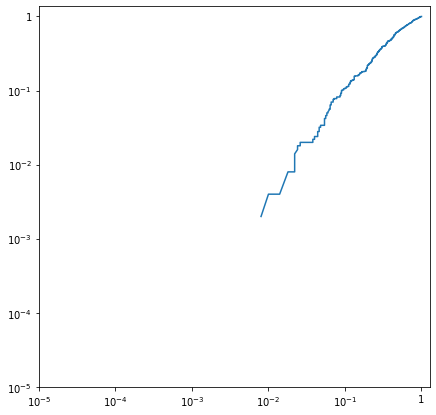

AUC SCORE 0.569422
epoch 210


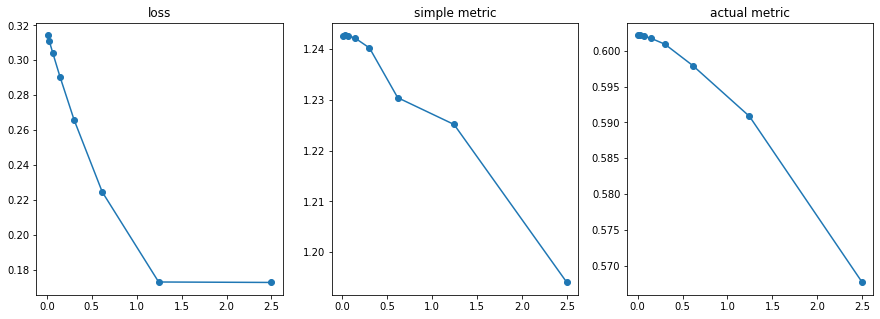

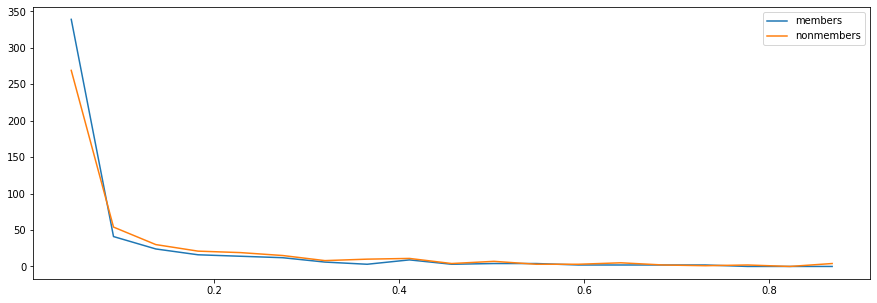

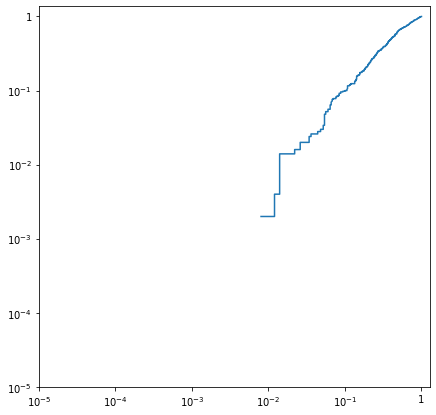

AUC SCORE 0.566416
epoch 220


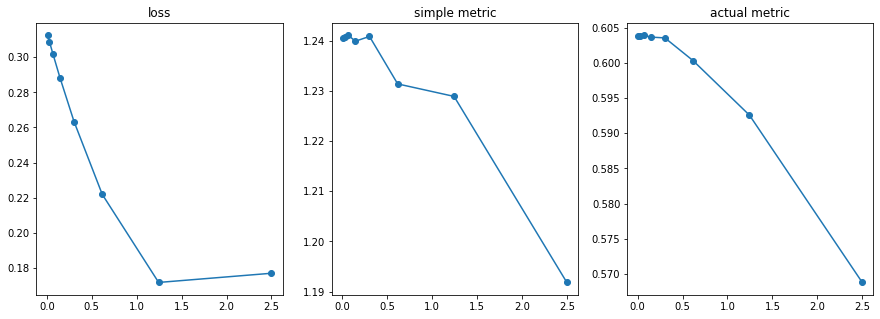

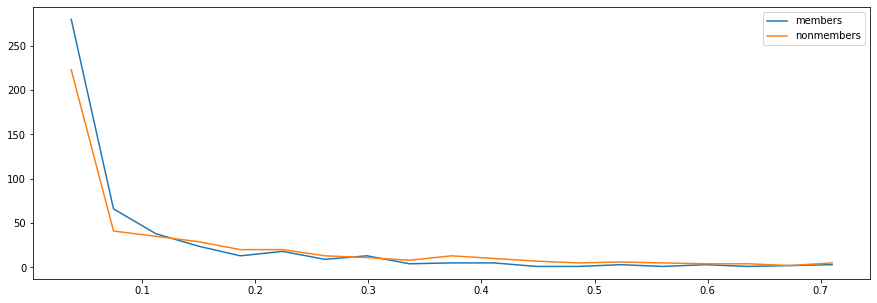

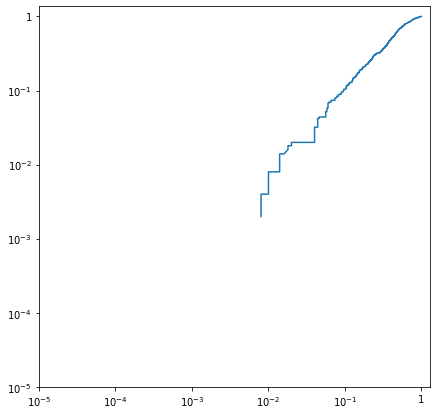

AUC SCORE 0.5865560000000001
epoch 230


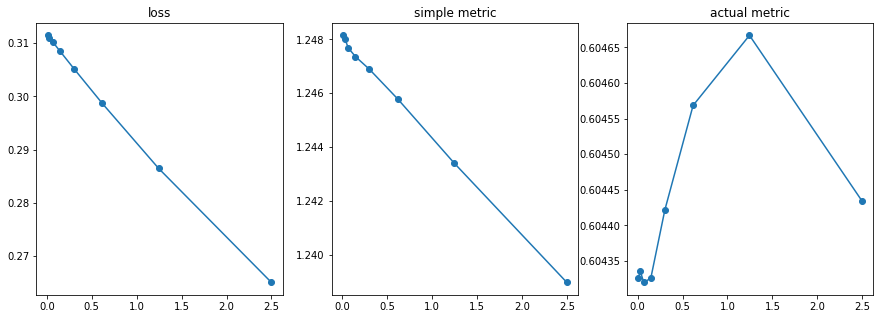

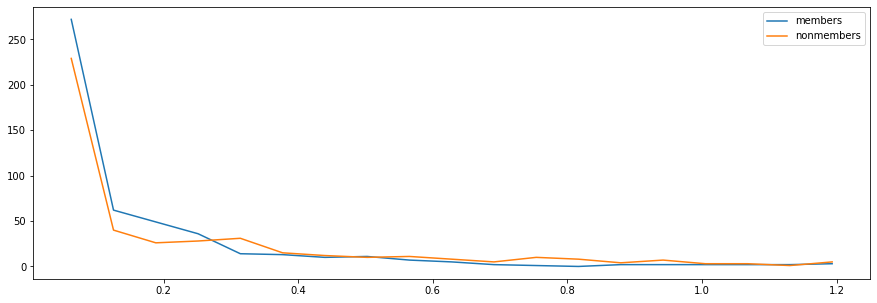

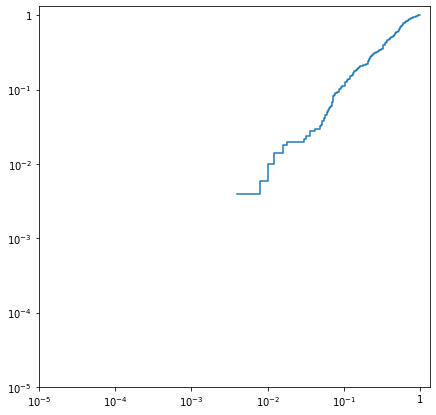

AUC SCORE 0.5873280000000001
epoch 240


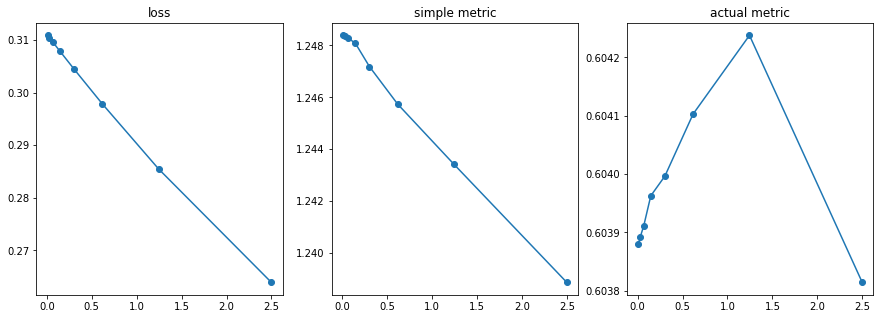

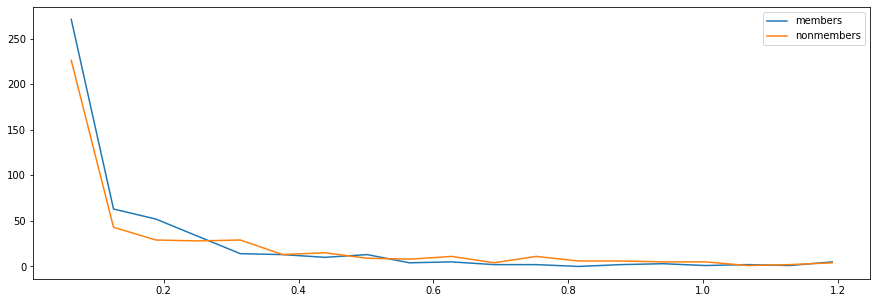

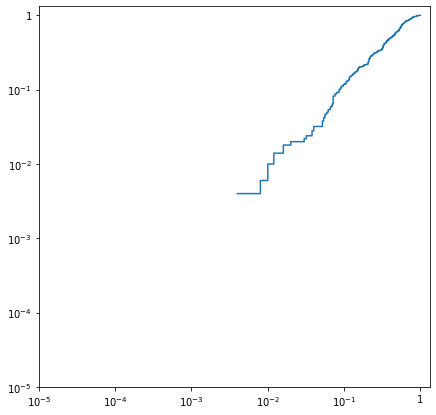

AUC SCORE 0.587166
epoch 250


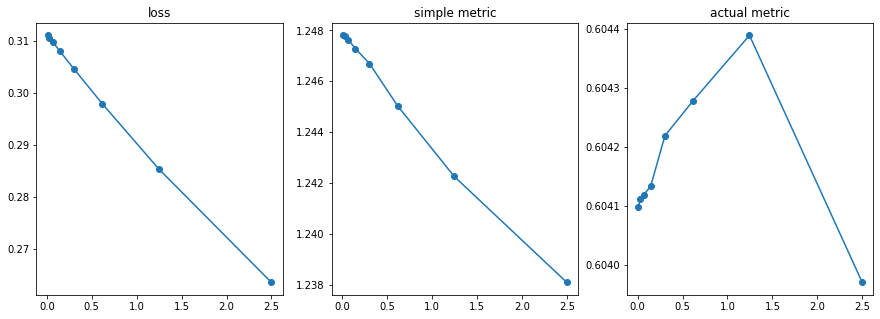

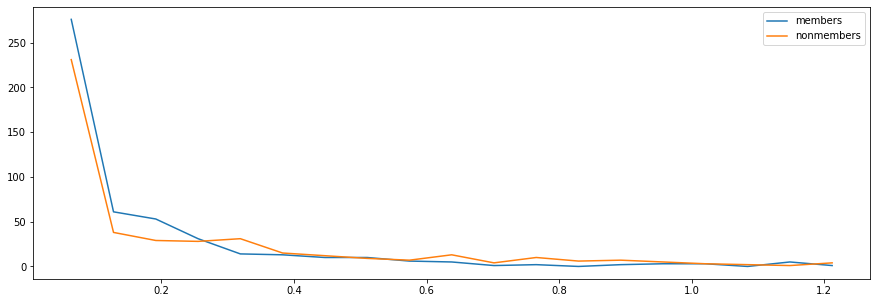

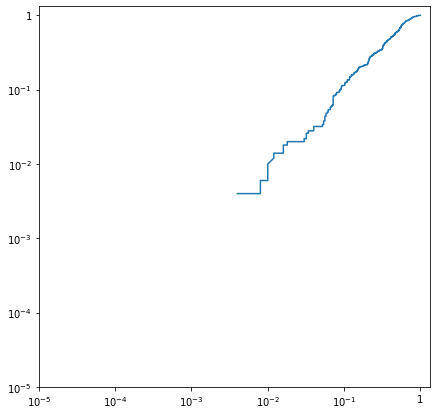

AUC SCORE 0.587384
epoch 260


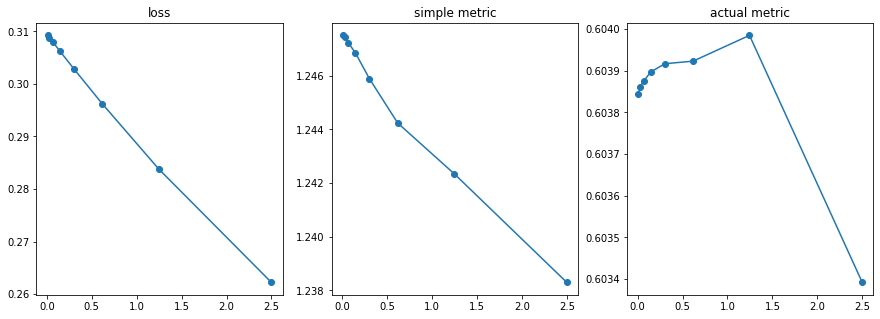

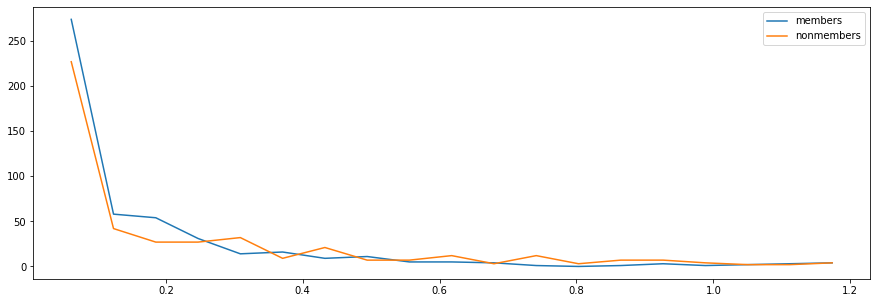

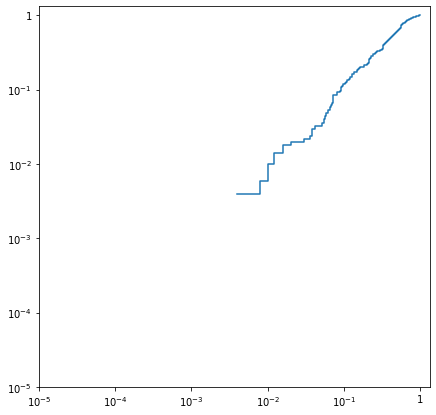

AUC SCORE 0.587388
epoch 270


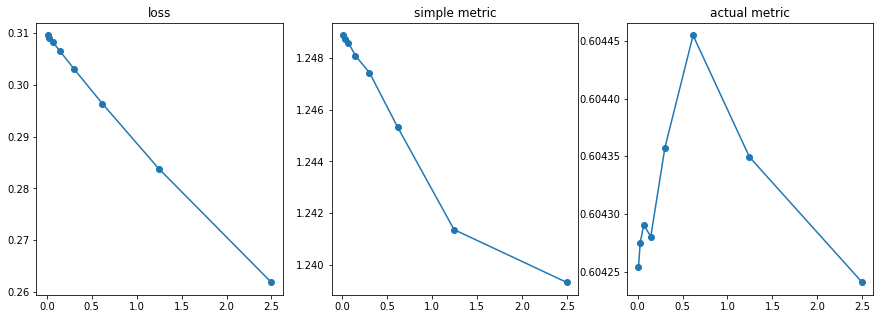

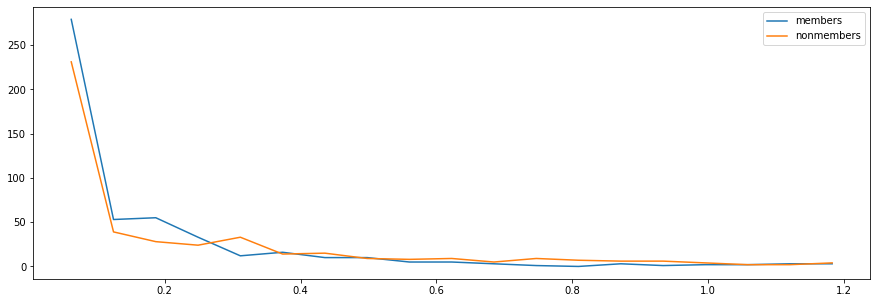

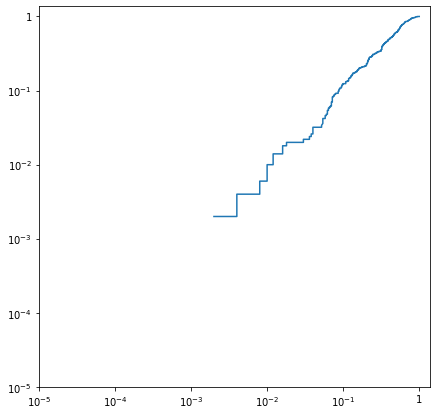

AUC SCORE 0.587846
epoch 280


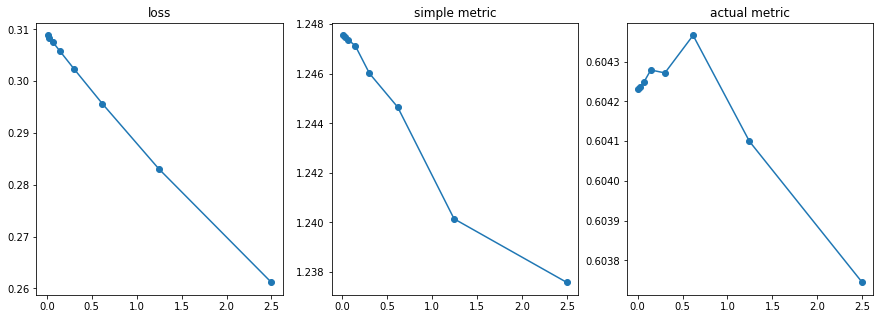

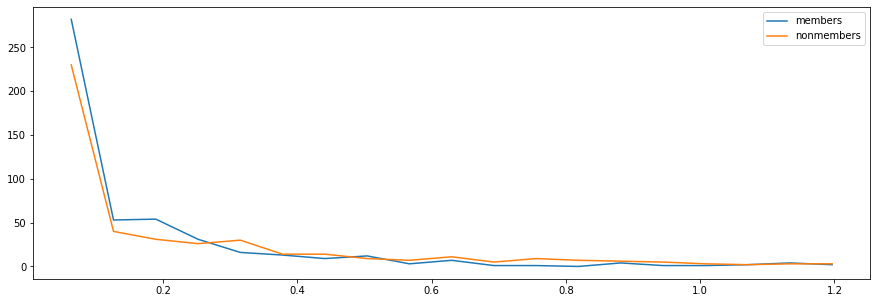

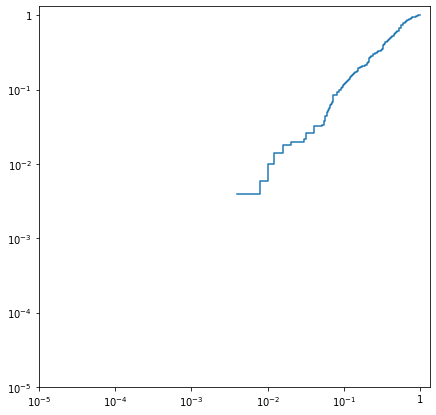

AUC SCORE 0.5877600000000001


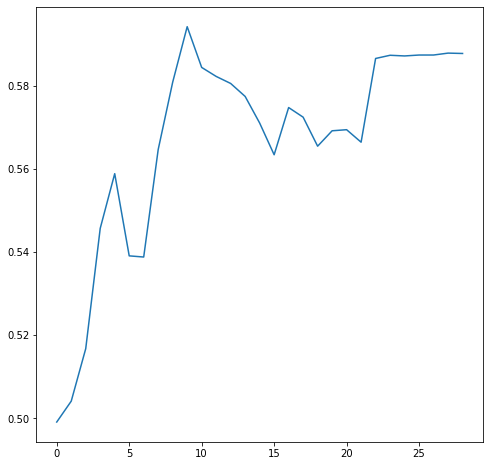

In [126]:
log_name = prefix + 'all_active_0_0_server_1_-1.0_10_40_0_0.0_0.0_0_0.0_0_cifar10_4000_alexnet.npy'
active_log = np.load(log_name,allow_pickle=True)
#print (active_log.shape)
epoch_list = [10*i for i in range(29)]
auc_score_list = []
for epoch in epoch_list:
    fig = plt.figure(figsize=(15,5))
    this_epoch_log = np.array(active_log[epoch])
    steps = [this_epoch_log[i,0] for i in range(len(this_epoch_log))]
    targeted_loss = np.array(this_epoch_log[:len(steps),1])
    validation_loss =  this_epoch_log[:len(steps),2]
    train_acc = this_epoch_log[:len(steps),3]
    test_acc = this_epoch_log[:len(steps),4]
    diff_metric = np.array(this_epoch_log[:len(steps),5])
    this_epoch_loss = this_epoch_log[:len(steps),-1]
    #print (this_epoch_loss.shape)
    
    this_epoch_actual_dis_metric = np.array([cal_dis_metric(this_epoch_loss[i]) for i in range(len(this_epoch_loss))])
    #print (this_epoch_actual_dis_metric)
    #plt.subplot(1,2,1)
    #plt.plot(steps,targeted_loss)
    #plt.plot(steps,validation_loss)
    #plt.legend(['targeted set loss','validation loss'])
    
    #print (np.argsort(steps))
    index = np.argsort(steps)
    
    plt.subplot(1,3,1)
    plt.plot(np.array(steps)[index],np.array(targeted_loss)[index],marker='o')
    plt.title('loss')
    #print (targeted_loss[:3])
    
    plt.subplot(1,3,2)
    plt.plot(np.array(steps)[index],np.array(diff_metric)[index],marker='o')
    plt.title('simple metric')
    
    plt.subplot(1,3,3)
    plt.plot(np.array(steps)[index],np.array(this_epoch_actual_dis_metric)[index],marker='o')
    plt.title('actual metric')
    
    print (f"epoch {epoch}")
    #print (np.argmin(targeted_loss),np.argmax(diff_metric),np.argmax(this_epoch_actual_dis_metric))
    plt.show()
    
    
    idx = np.argmin(targeted_loss)
    loss = this_epoch_loss[idx]
    member_loss = loss[:int(len(loss)/2)]
    nonmember_loss = loss[int(len(loss)/2):]
    
    sorted_loss = np.sort(loss)
    
    bins = np.linspace(sorted_loss[0],sorted_loss[-50],20)
    member_counts,bins = np.histogram(member_loss,bins)
    nonmember_counts,_ = np.histogram(nonmember_loss,bins)
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(bins[1:],member_counts)
    plt.plot(bins[1:],nonmember_counts)
    plt.legend(['members','nonmembers'])
    plt.show()
    
    from sklearn import metrics
    
    fig = plt.figure(figsize=(7,7))
    start_offset = 1e-5
    true_label = np.concatenate((np.ones((int(len(loss)/2))),np.zeros((int(len(loss)/2)))))
    fpr, tpr, thresholds = metrics.roc_curve(true_label, -1*loss, pos_label=1)
    for i in range(len(fpr)):
        if (fpr[i] == 0.0):
            fpr[i] = start_offset
        else:
            break
    log_fpr = np.log10(fpr)
    log_tpr = np.log10(tpr)
    plt.plot(log_fpr,log_tpr)
    plt.xticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.yticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.show()
    
    auc_score = roc_auc_score(true_label,-1*loss)
    auc_score_list.append(auc_score)
    print (f"AUC SCORE {auc_score}")
                
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(len(auc_score_list)),auc_score_list)
plt.show()

epoch 0


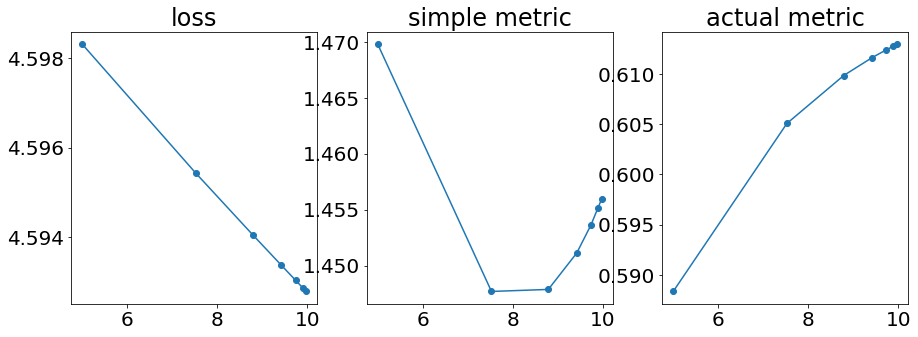

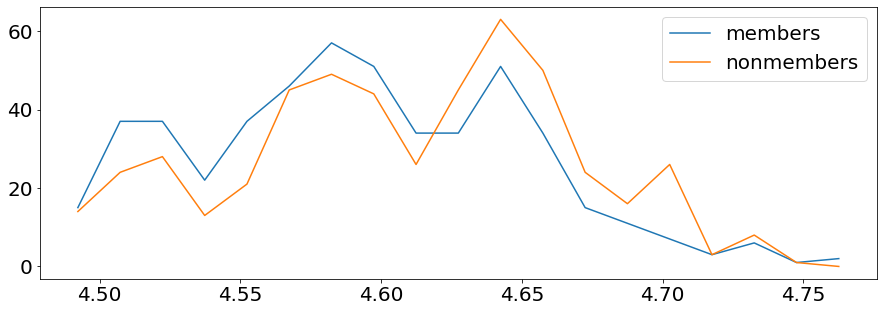

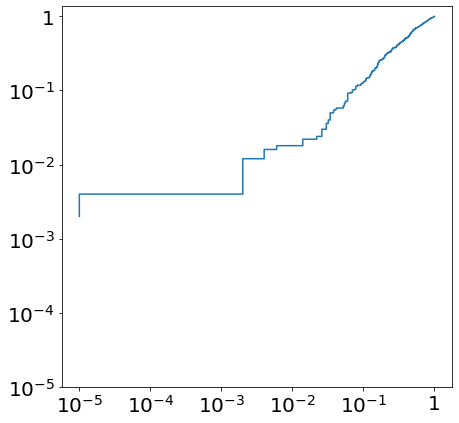

AUC SCORE 0.582906
epoch 10


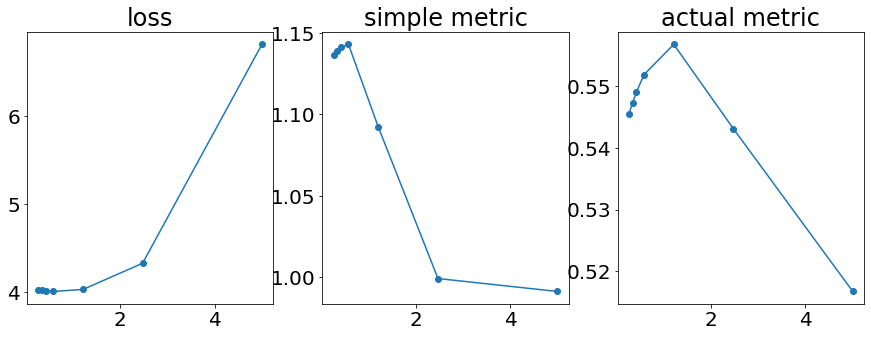

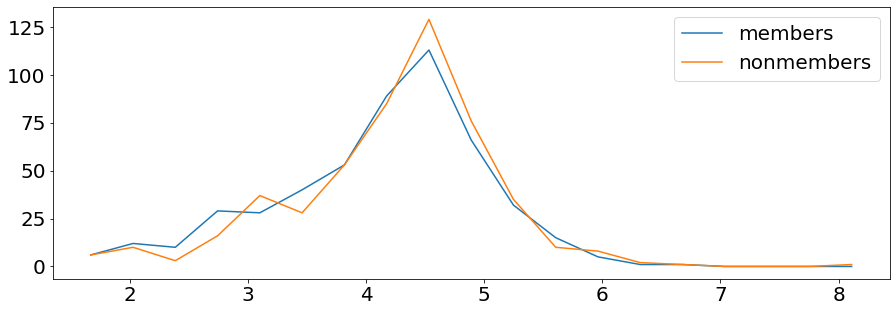

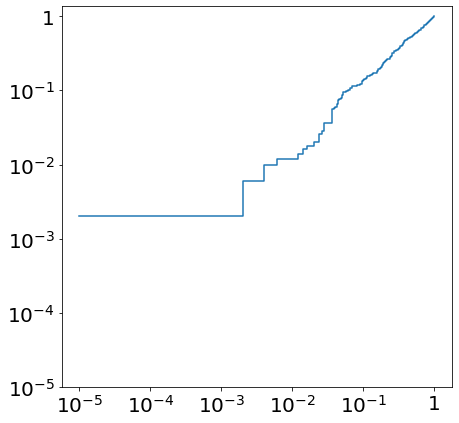

AUC SCORE 0.535136
epoch 20


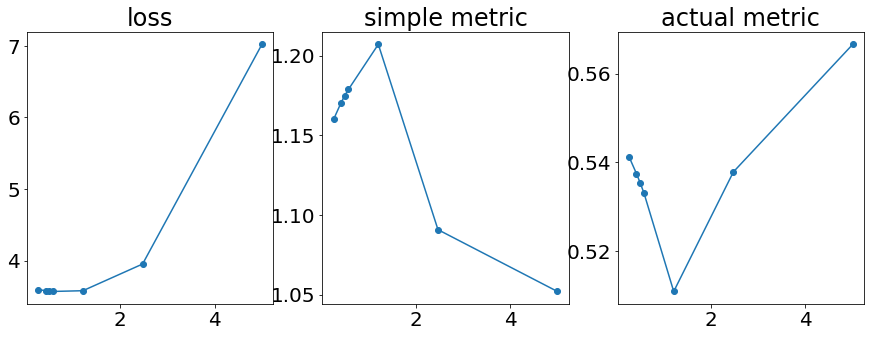

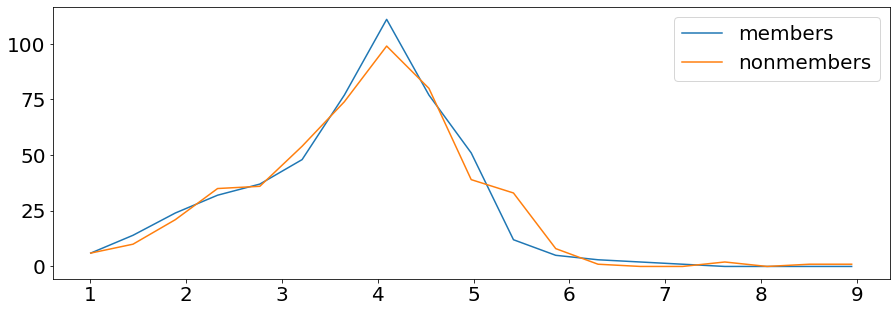

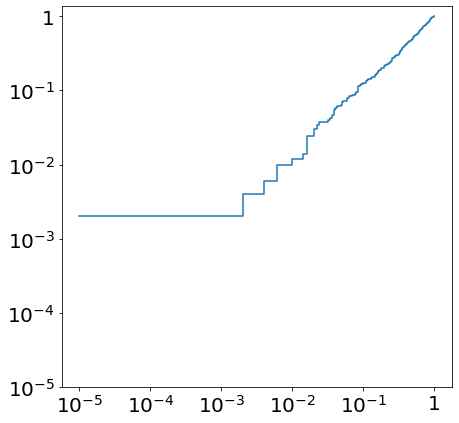

AUC SCORE 0.517052
epoch 30


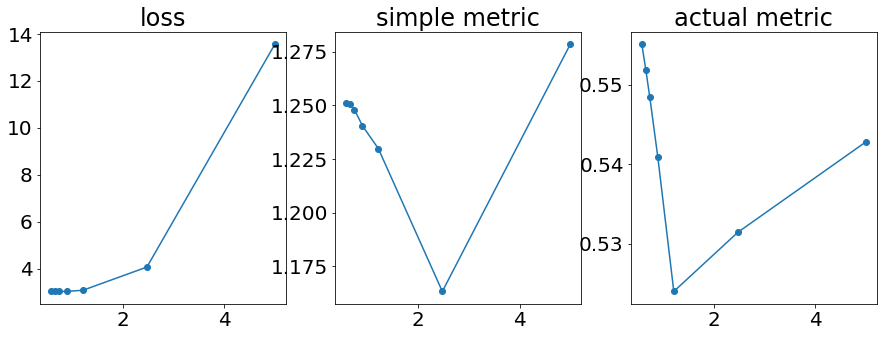

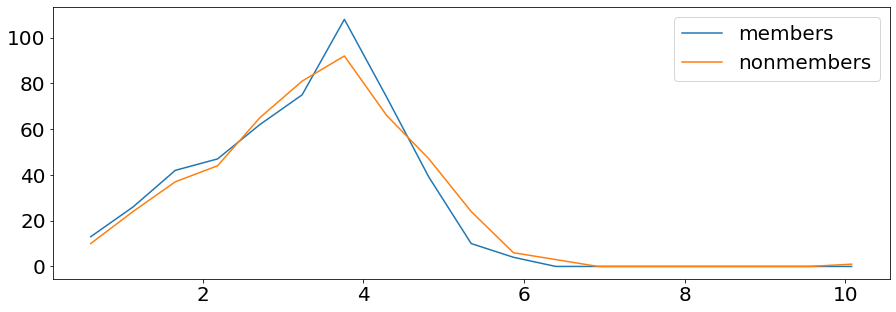

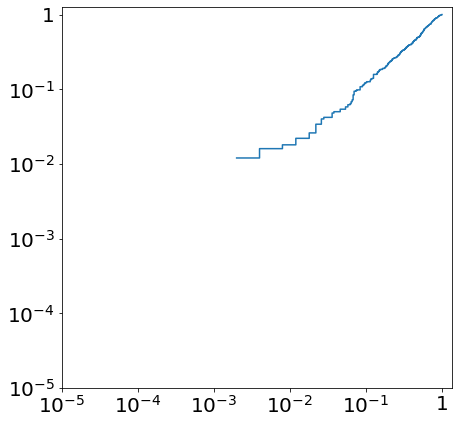

AUC SCORE 0.52899
epoch 40


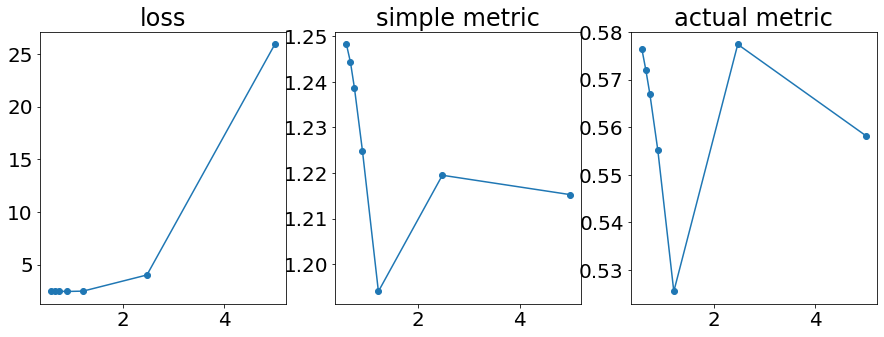

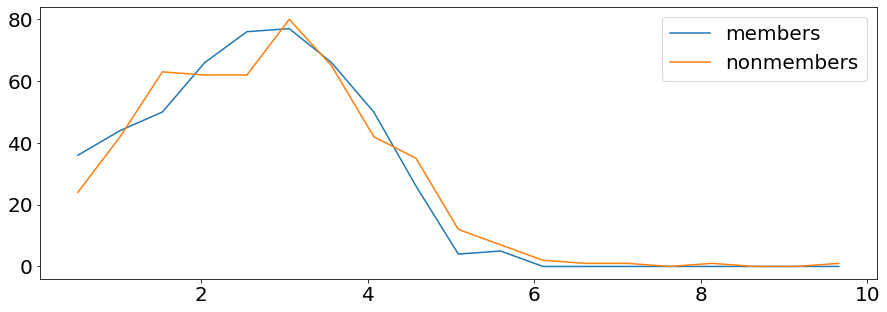

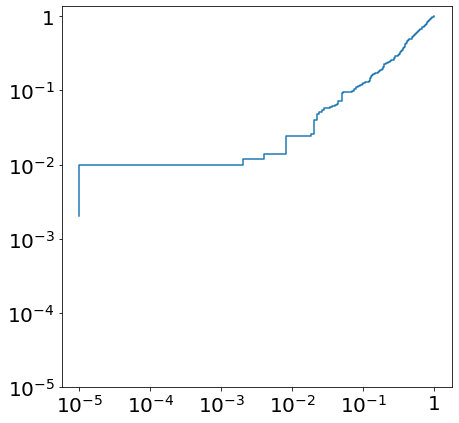

AUC SCORE 0.526244
epoch 50


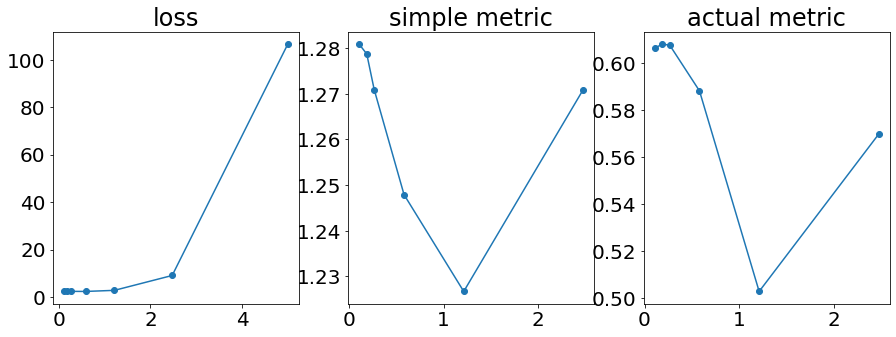

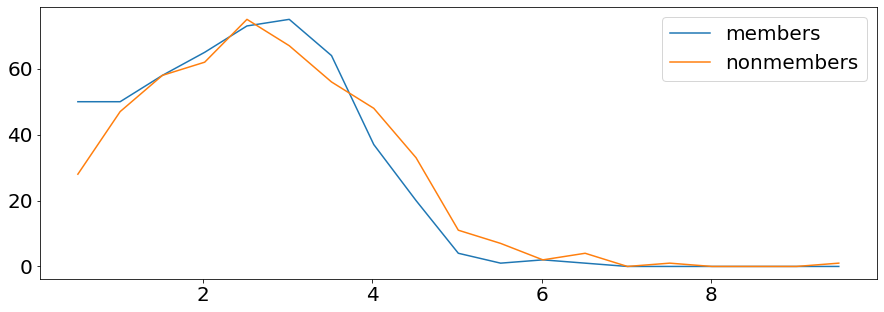

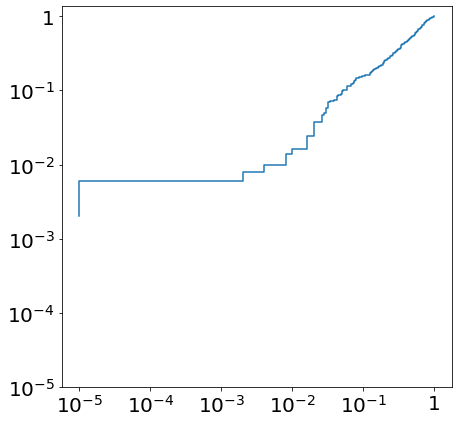

AUC SCORE 0.5539719999999999
epoch 60


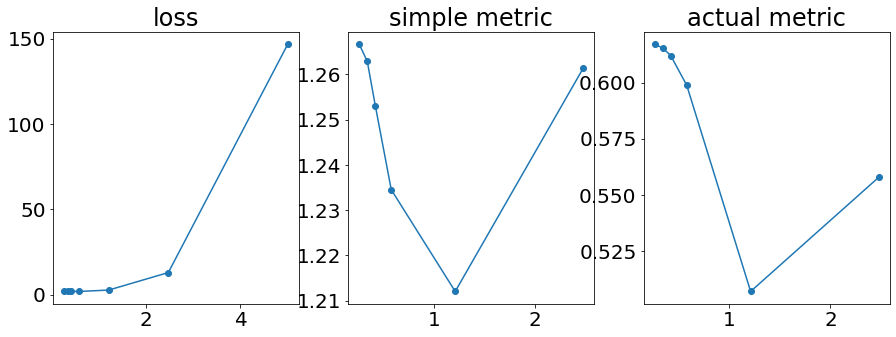

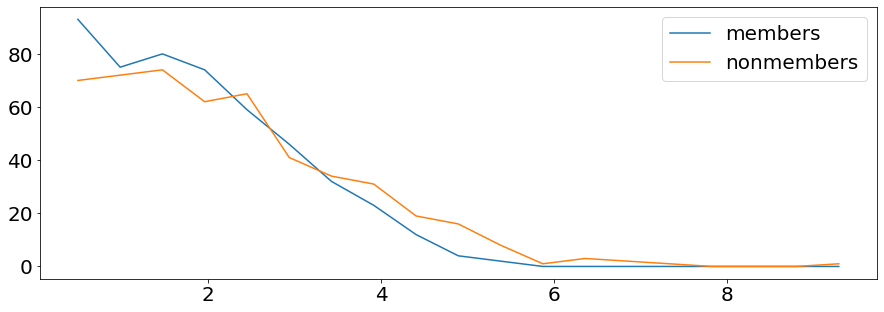

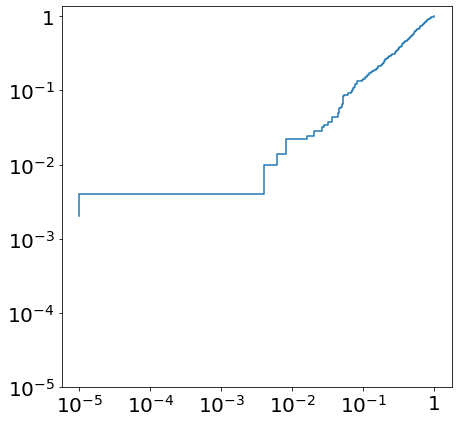

AUC SCORE 0.5623560000000001
epoch 70


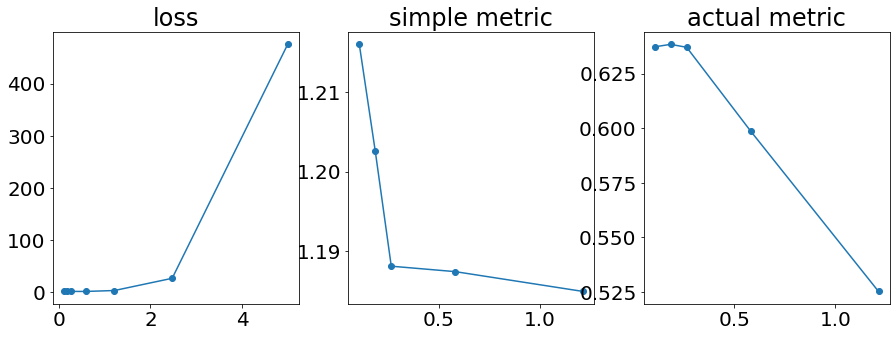

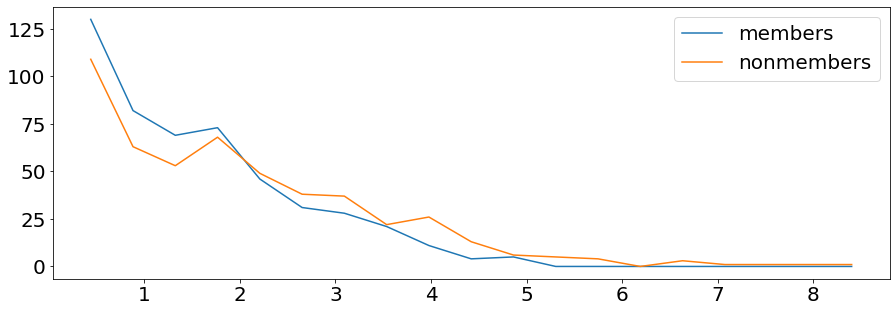

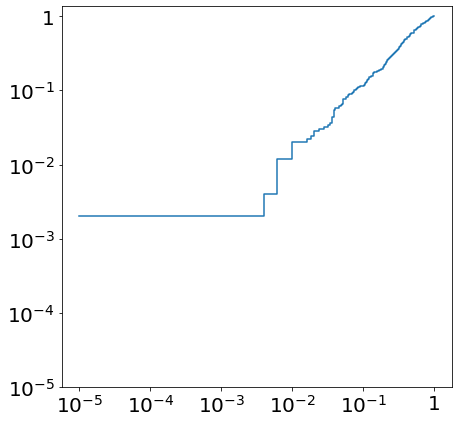

AUC SCORE 0.571084
epoch 80


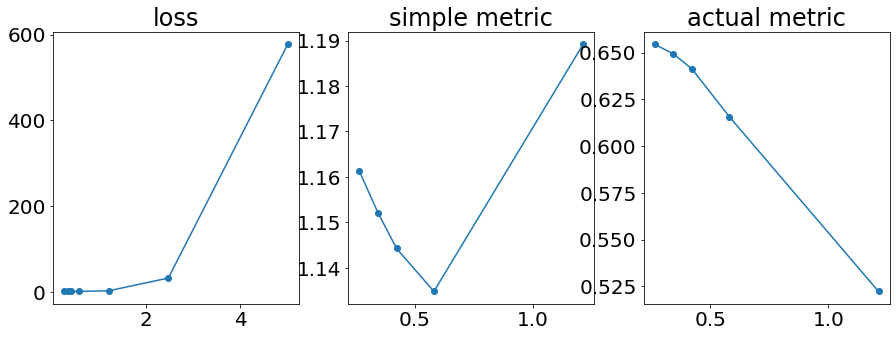

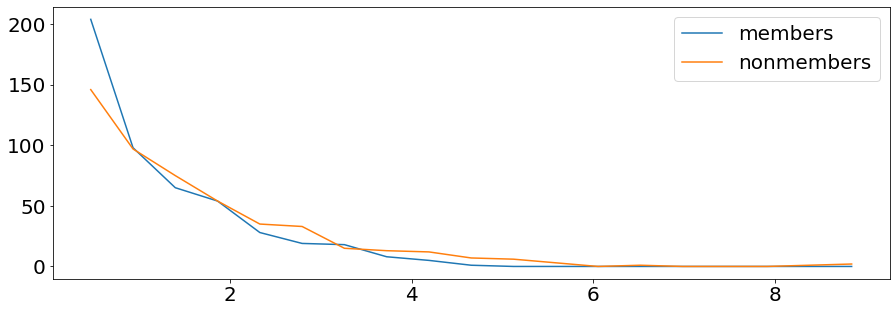

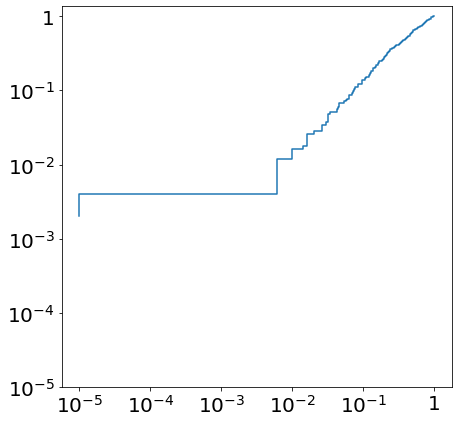

AUC SCORE 0.5830120000000001
epoch 90


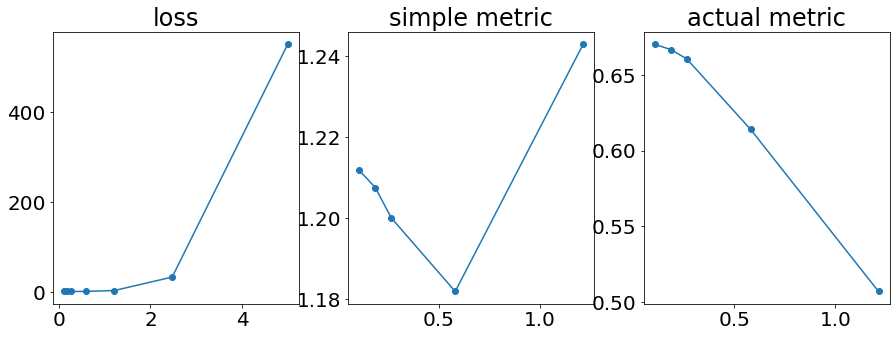

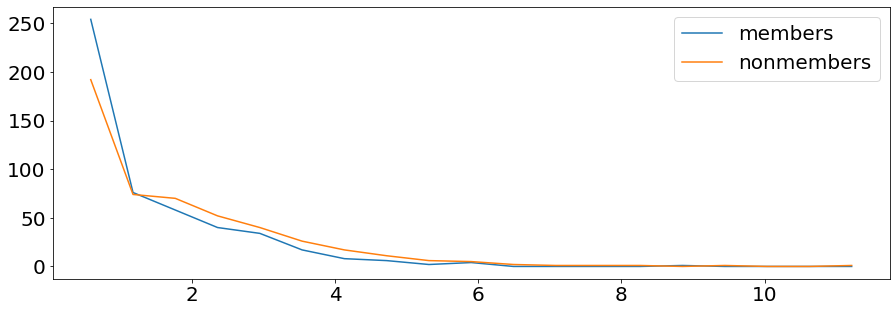

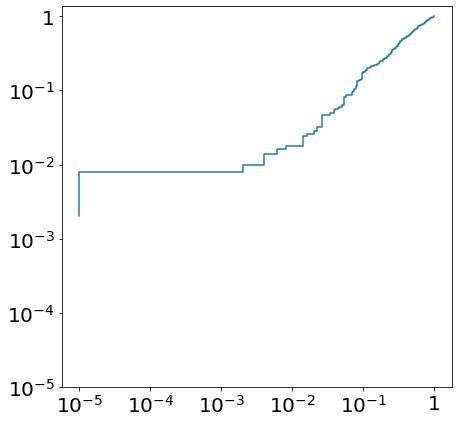

AUC SCORE 0.5845
epoch 100


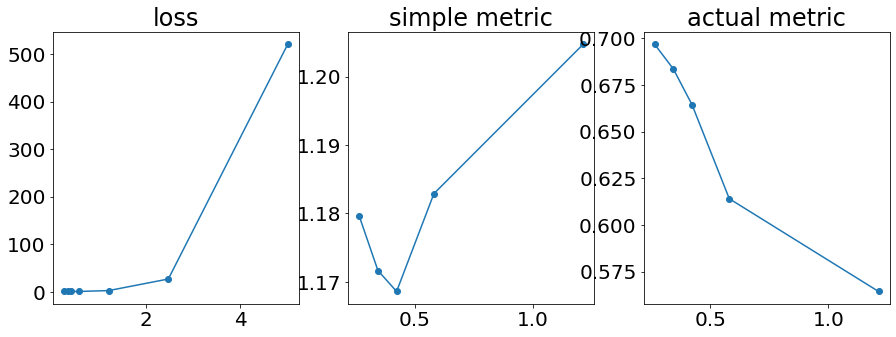

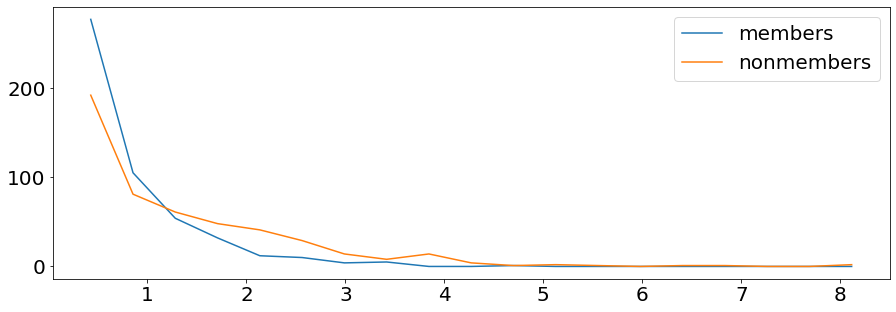

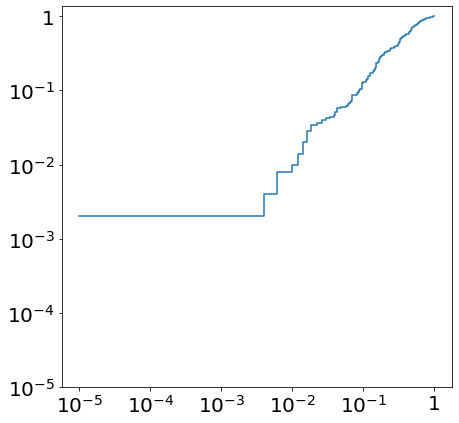

AUC SCORE 0.6291599999999999
epoch 110


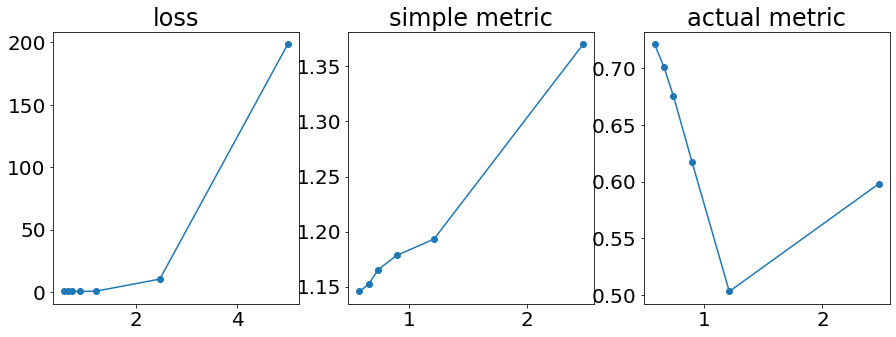

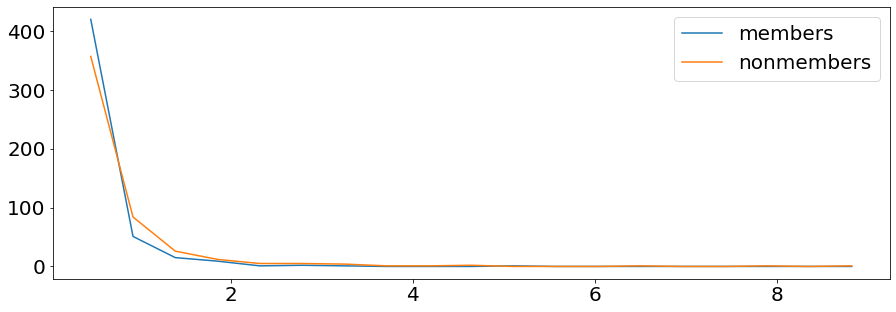

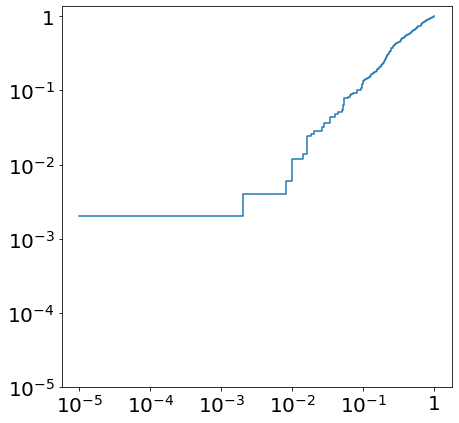

AUC SCORE 0.594044
epoch 120


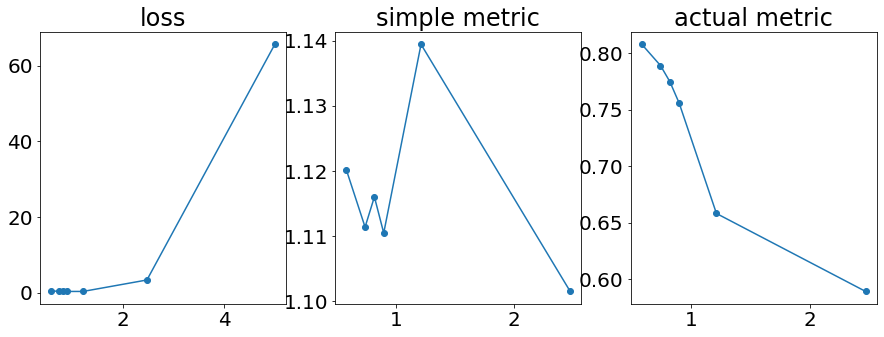

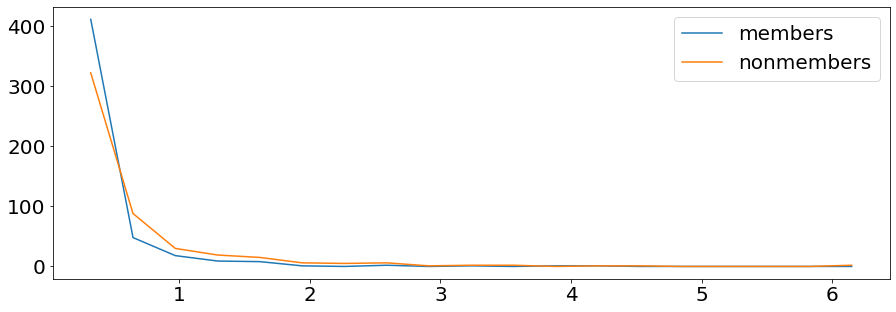

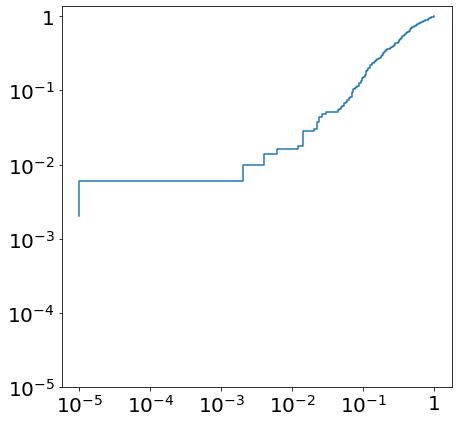

AUC SCORE 0.6267360000000001
epoch 130


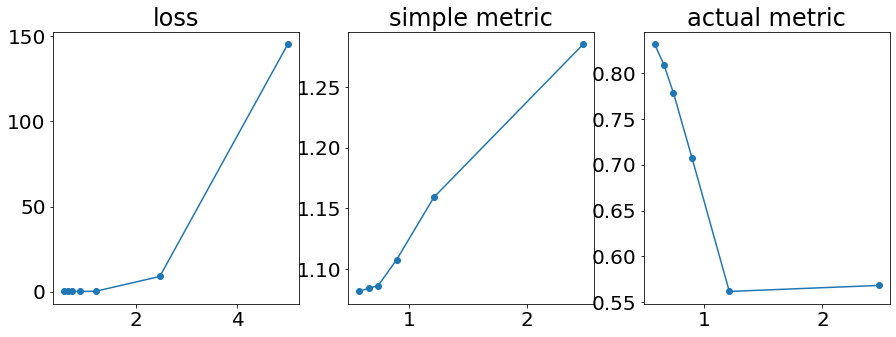

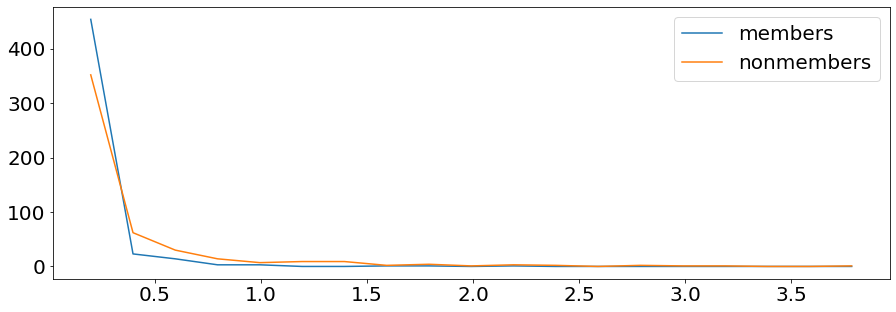

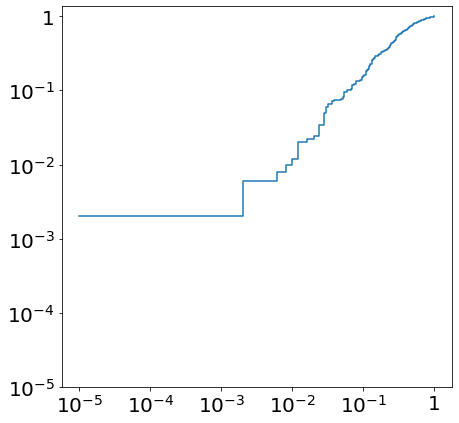

AUC SCORE 0.668964
epoch 140


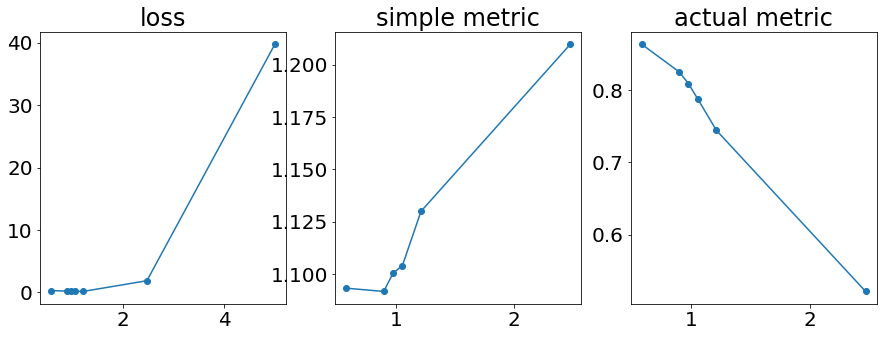

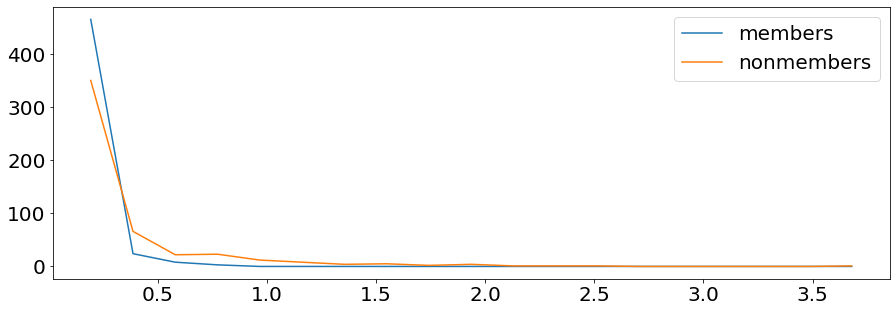

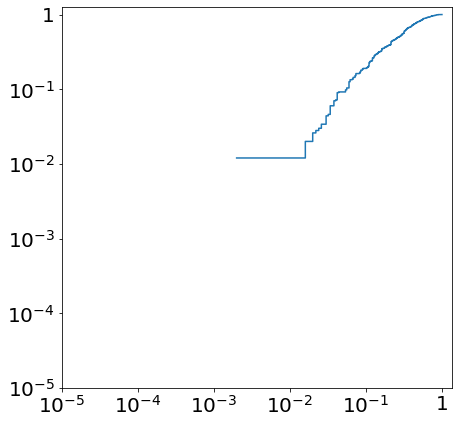

AUC SCORE 0.698078
epoch 150


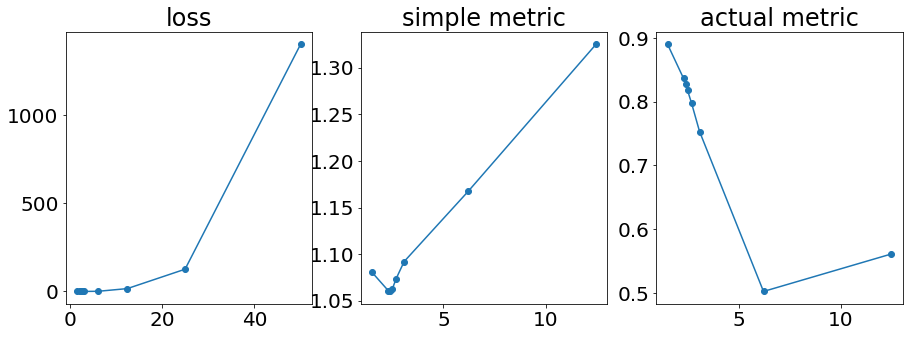

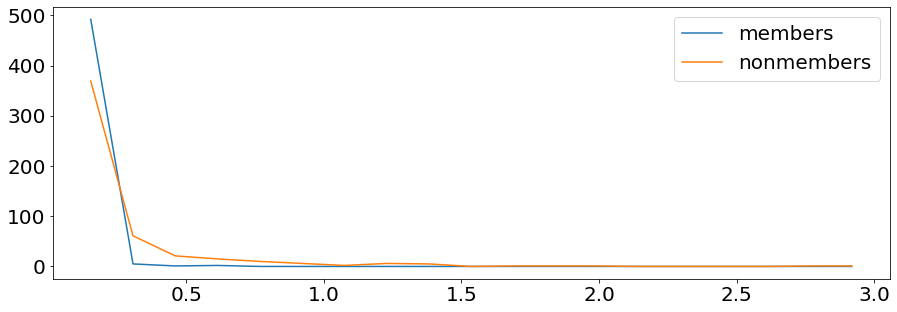

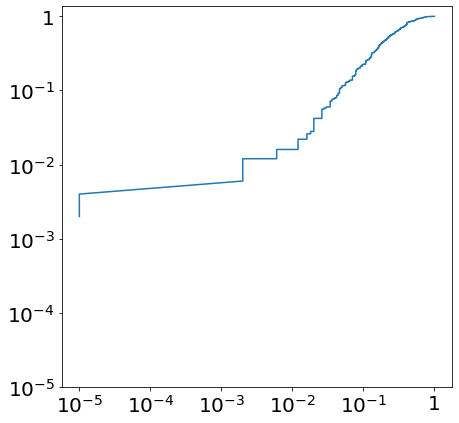

AUC SCORE 0.73847
epoch 160


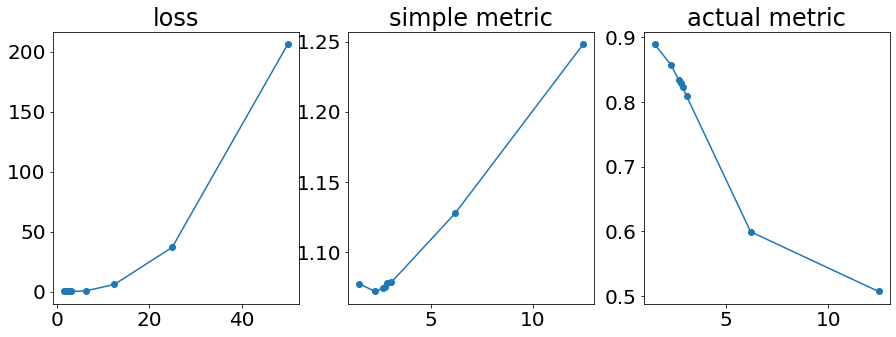

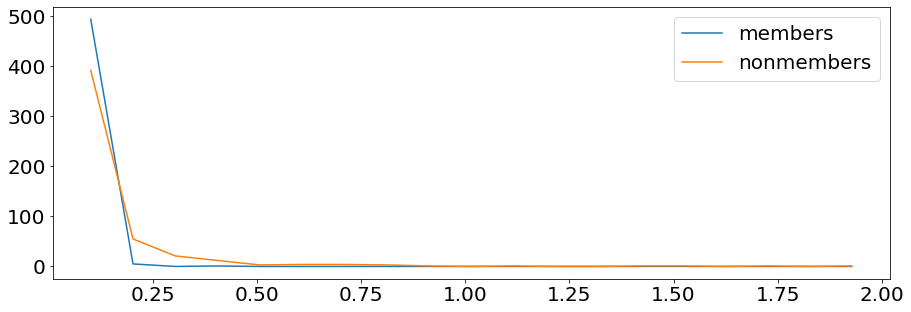

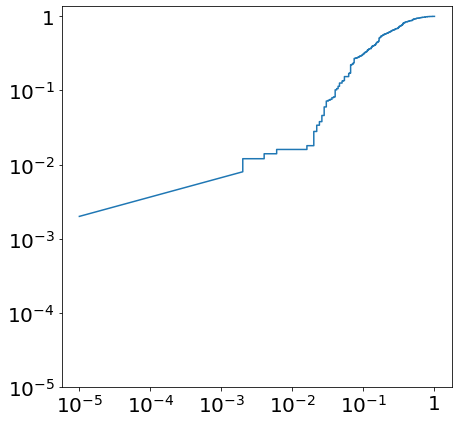

AUC SCORE 0.773018
epoch 170


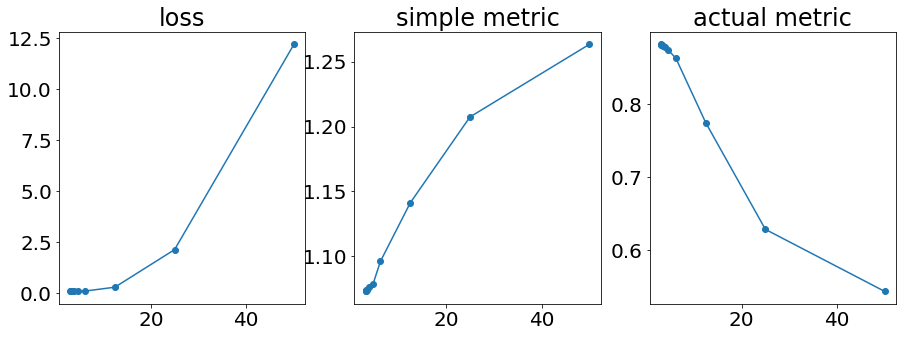

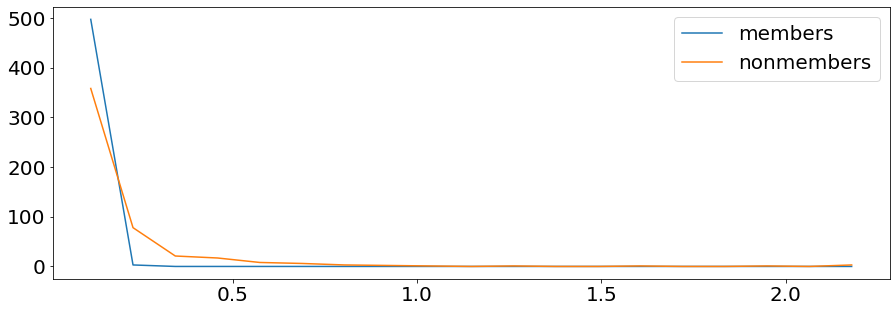

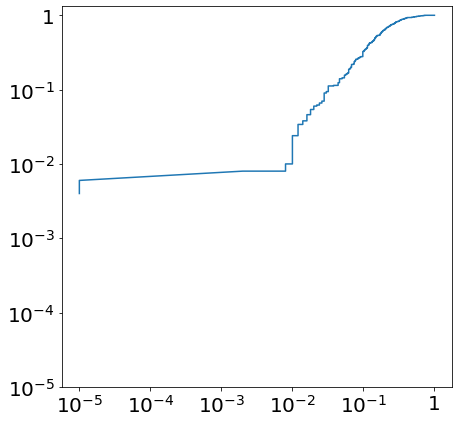

AUC SCORE 0.813204
epoch 180


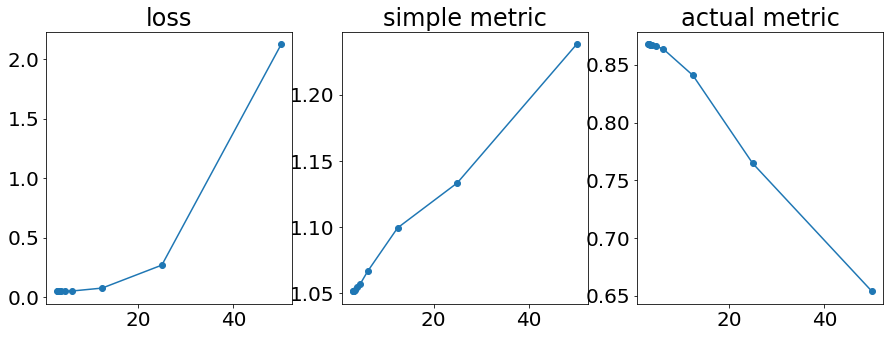

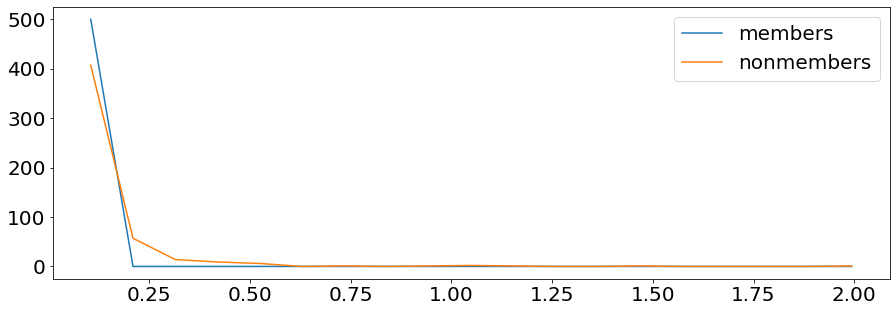

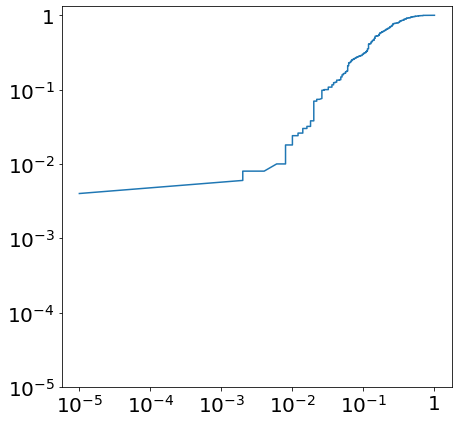

AUC SCORE 0.8107460000000001
epoch 190


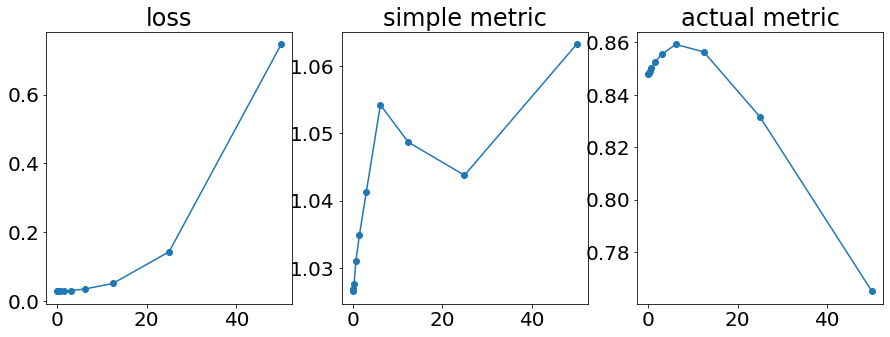

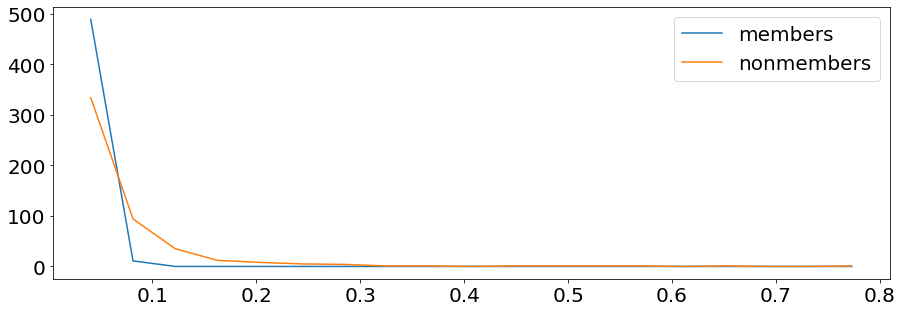

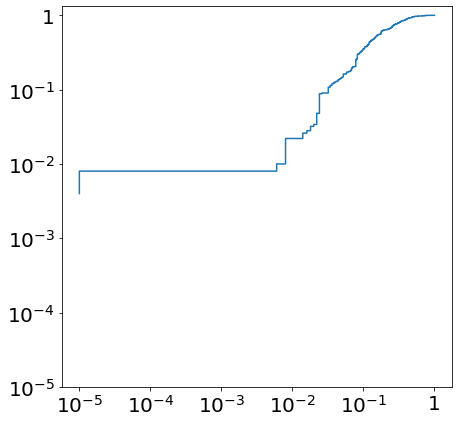

AUC SCORE 0.8051900000000001
epoch 200


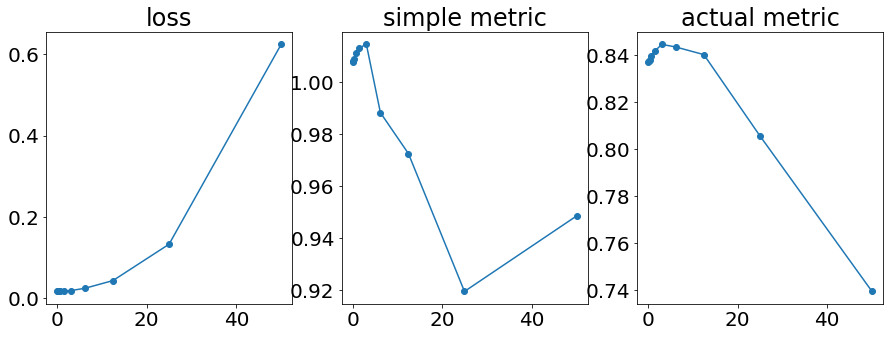

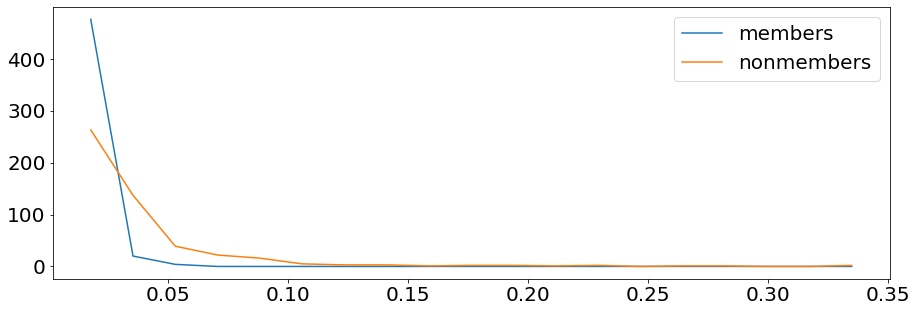

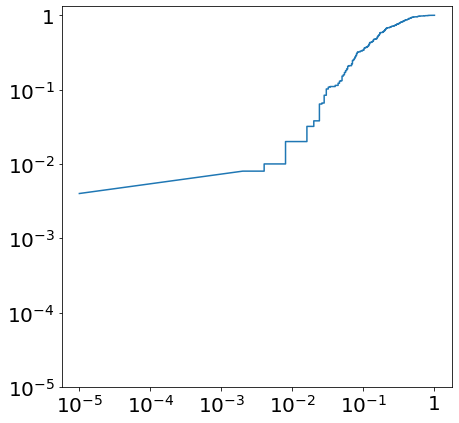

AUC SCORE 0.799844
epoch 210


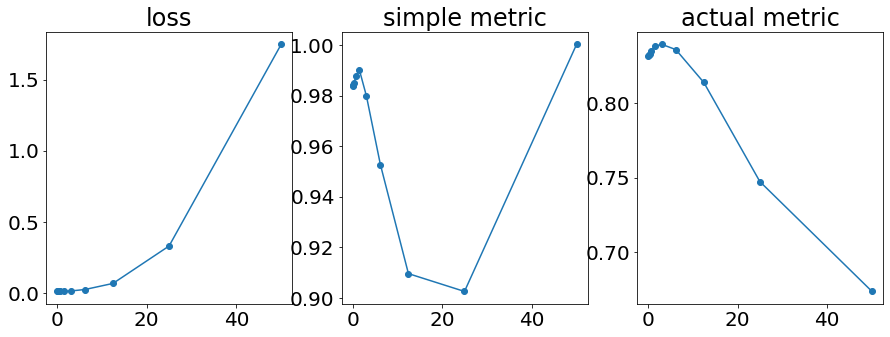

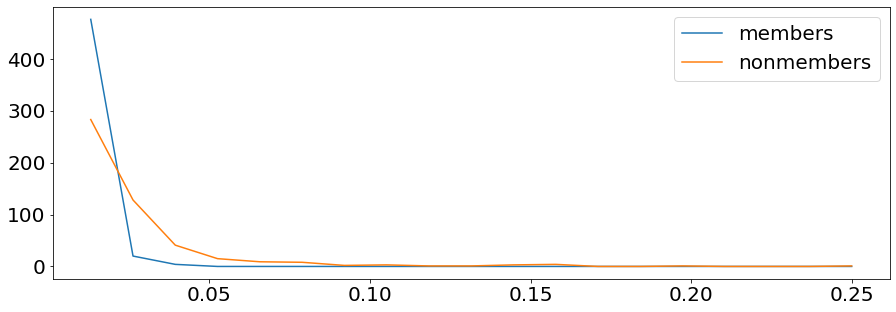

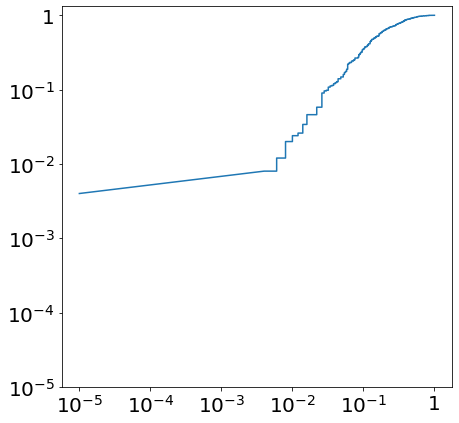

AUC SCORE 0.797586
epoch 220


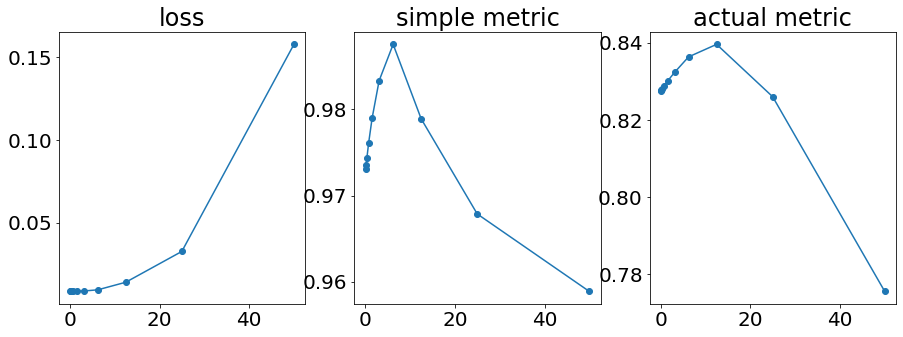

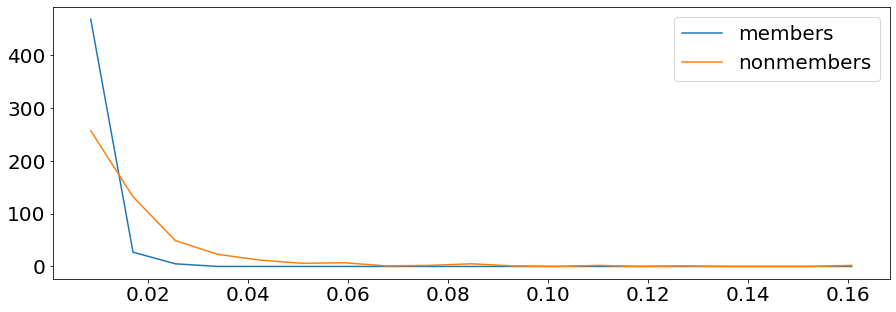

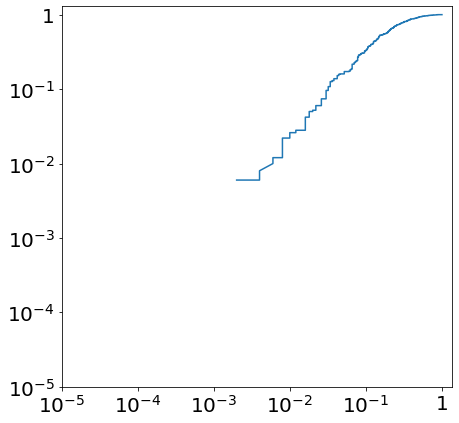

AUC SCORE 0.79679
epoch 230


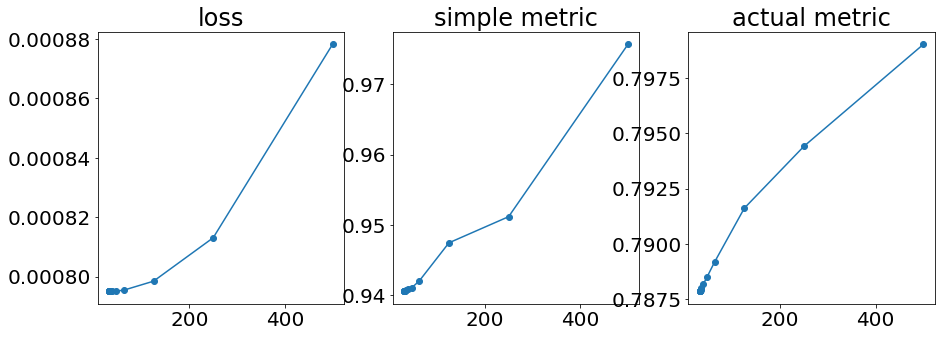

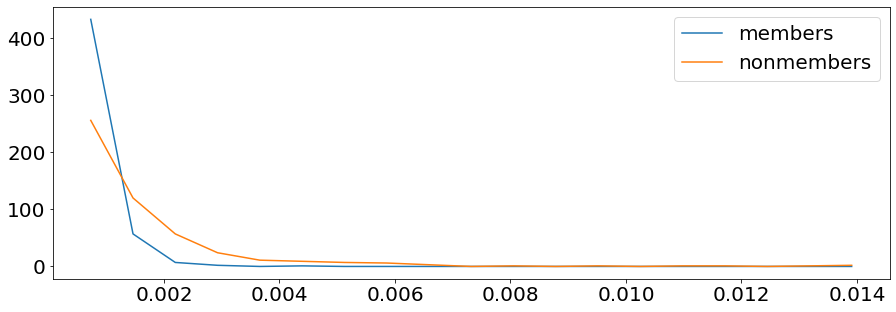

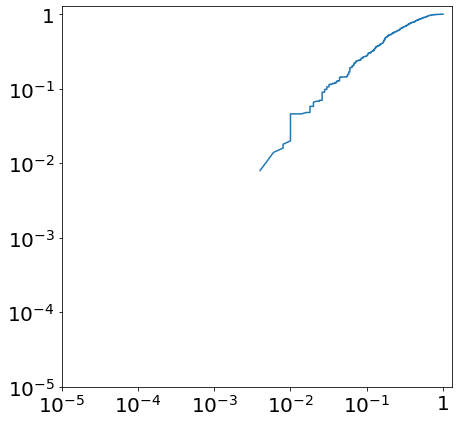

AUC SCORE 0.7513719999999999
epoch 240


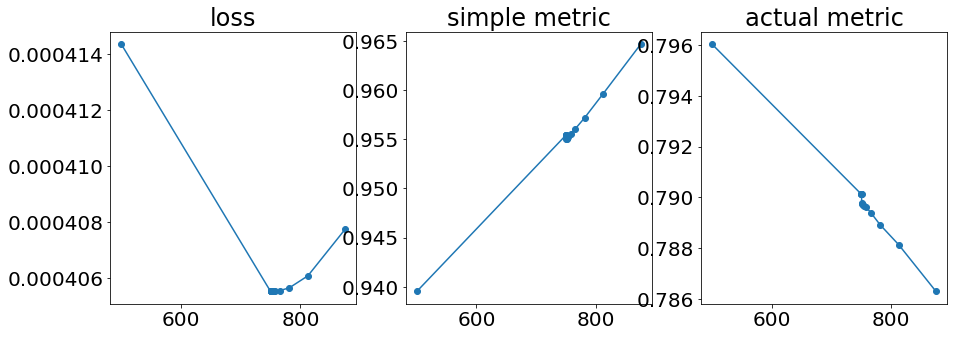

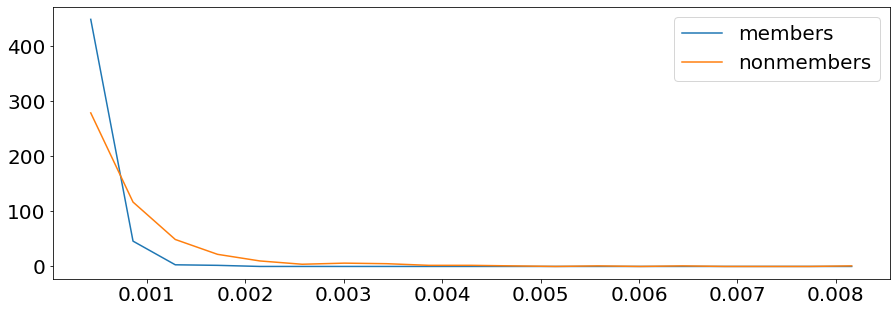

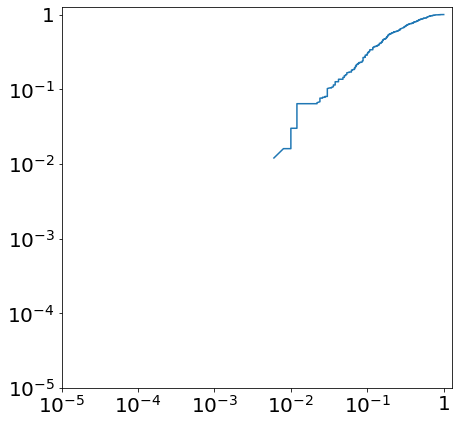

AUC SCORE 0.754696
epoch 250


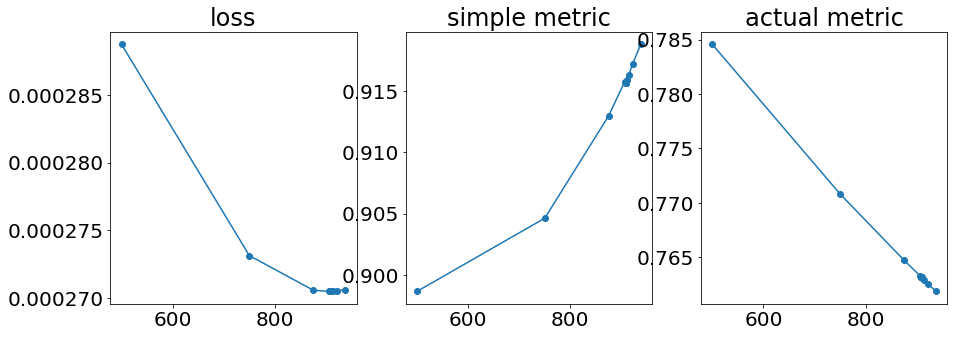

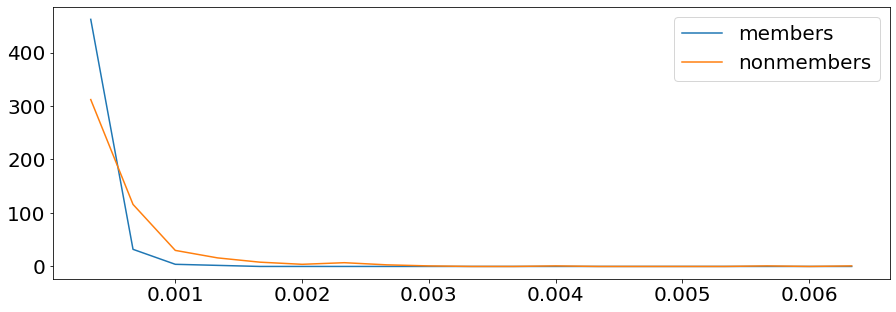

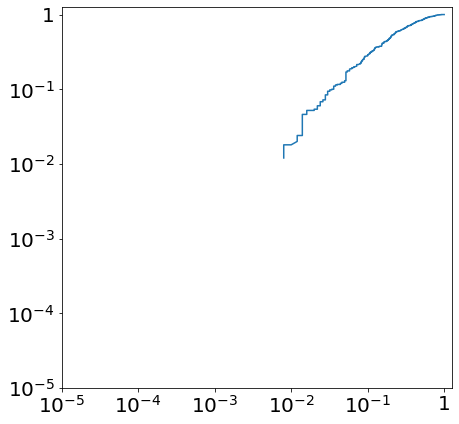

AUC SCORE 0.7394059999999999
epoch 260


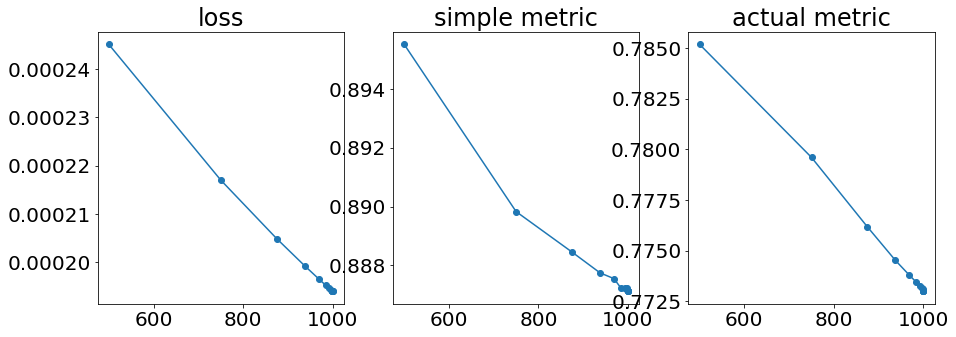

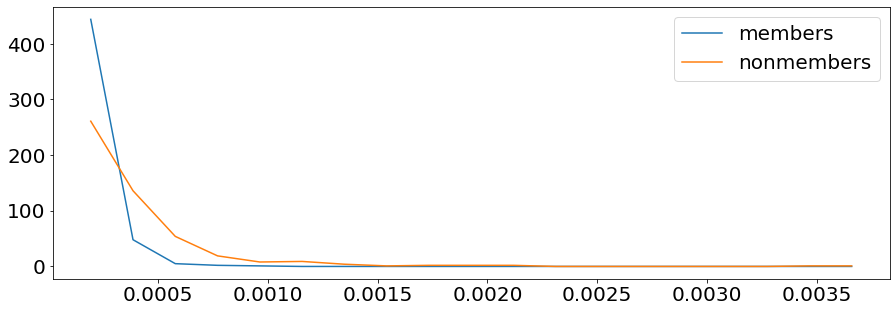

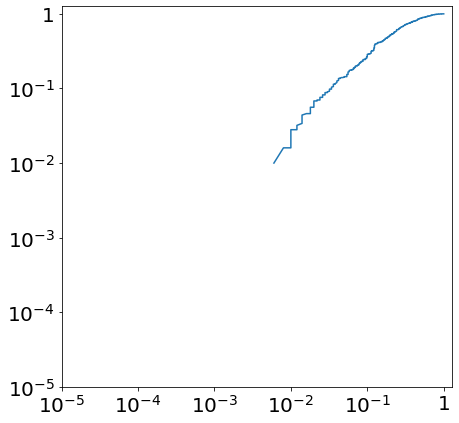

AUC SCORE 0.7536879999999999
epoch 270


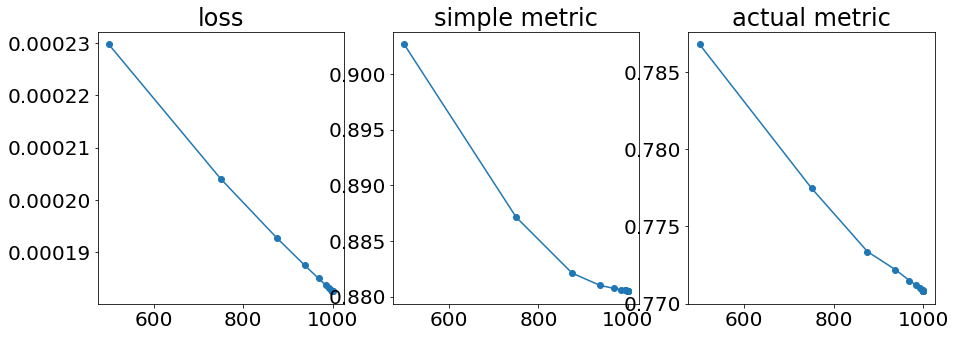

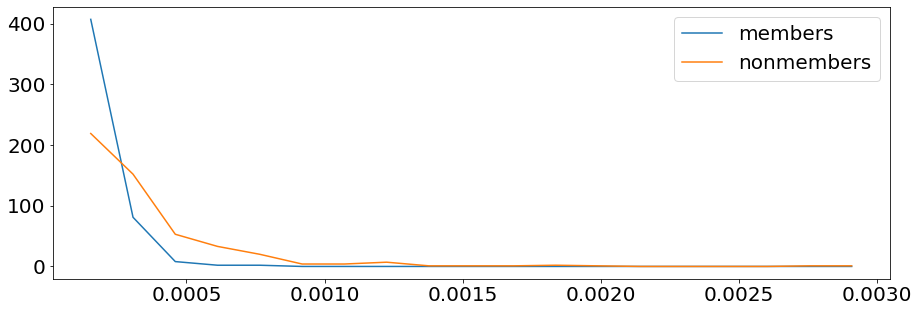

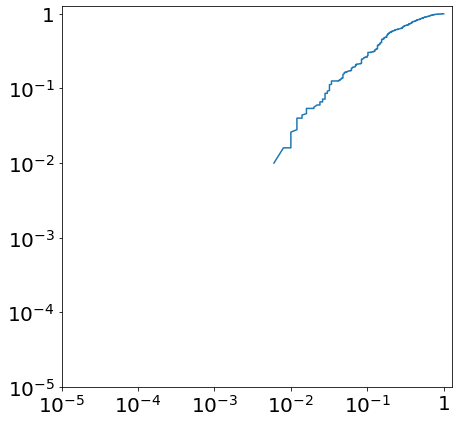

AUC SCORE 0.7522980000000001
epoch 280


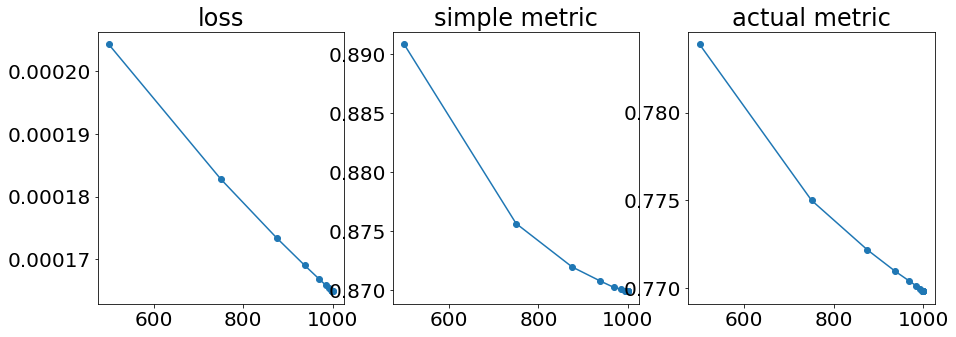

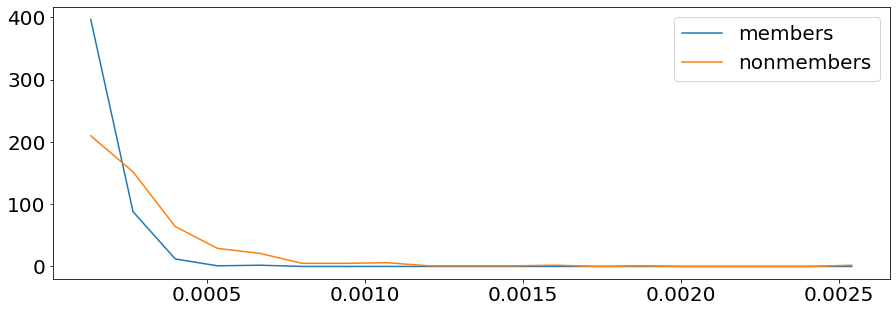

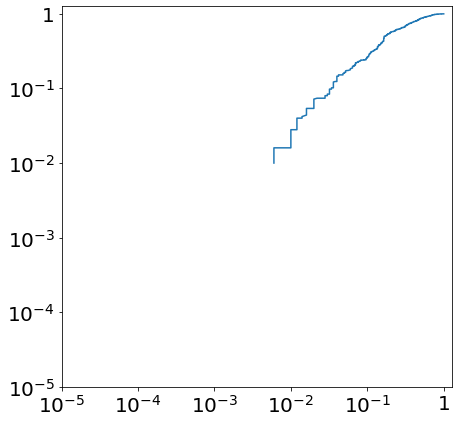

AUC SCORE 0.7514299999999999


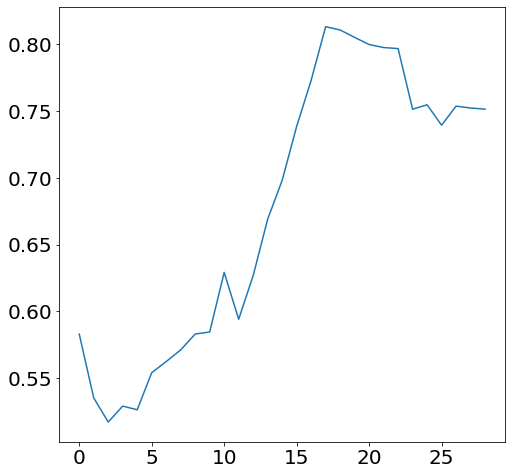

In [50]:
log_name = prefix + 'all_active_0_0_server_1_-1.0_10_40_0_0.0_0.0_0_0.0_0_cifar100_4000_alexnet.npy'
active_log = np.load(log_name,allow_pickle=True)
#print (active_log.shape)
epoch_list = [10*i for i in range(29)]
auc_score_list = []
cosine_list = []
for epoch in epoch_list:
    fig = plt.figure(figsize=(15,5))
    this_epoch_log = np.array(active_log[epoch])
    steps = [this_epoch_log[i,0] for i in range(len(this_epoch_log))]
    targeted_loss = np.array(this_epoch_log[:len(steps),1])
    validation_loss =  this_epoch_log[:len(steps),2]
    train_acc = this_epoch_log[:len(steps),3]
    test_acc = this_epoch_log[:len(steps),4]
    diff_metric = np.array(this_epoch_log[:len(steps),5])
    this_epoch_loss = this_epoch_log[:len(steps),-1]
    #print (this_epoch_loss.shape)
    
    this_epoch_actual_dis_metric = np.array([cal_dis_metric(this_epoch_loss[i]) for i in range(len(this_epoch_loss))])
    #print (this_epoch_actual_dis_metric)
    #plt.subplot(1,2,1)
    #plt.plot(steps,targeted_loss)
    #plt.plot(steps,validation_loss)
    #plt.legend(['targeted set loss','validation loss'])
    
    #print (np.argsort(steps))
    index = np.argsort(steps)
    
    plt.subplot(1,3,1)
    plt.plot(np.array(steps)[index],np.array(targeted_loss)[index],marker='o')
    plt.title('loss')
    #print (targeted_loss[:3])
    
    plt.subplot(1,3,2)
    plt.plot(np.array(steps)[index],np.array(diff_metric)[index],marker='o')
    plt.title('simple metric')
    
    plt.subplot(1,3,3)
    plt.plot(np.array(steps)[index],np.array(this_epoch_actual_dis_metric)[index],marker='o')
    plt.title('actual metric')
    
    print (f"epoch {epoch}")
    #print (np.argmin(targeted_loss),np.argmax(diff_metric),np.argmax(this_epoch_actual_dis_metric))
    plt.show()
    
    
    idx = np.argmin(targeted_loss)
    loss = this_epoch_loss[idx]
    member_loss = loss[:int(len(loss)/2)]
    nonmember_loss = loss[int(len(loss)/2):]
    
    sorted_loss = np.sort(loss)
    
    bins = np.linspace(sorted_loss[0],sorted_loss[-1],20)
    member_counts,bins = np.histogram(member_loss,bins)
    nonmember_counts,_ = np.histogram(nonmember_loss,bins)
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(bins[1:],member_counts)
    plt.plot(bins[1:],nonmember_counts)
    plt.legend(['members','nonmembers'])
    plt.show()
    
    from sklearn import metrics
    
    fig = plt.figure(figsize=(7,7))
    start_offset = 1e-5
    true_label = np.concatenate((np.ones((int(len(loss)/2))),np.zeros((int(len(loss)/2)))))
    fpr, tpr, thresholds = metrics.roc_curve(true_label, -1*loss, pos_label=1)
    for i in range(len(fpr)):
        if (fpr[i] == 0.0):
            fpr[i] = start_offset
        else:
            break
    log_fpr = np.log10(fpr)
    log_tpr = np.log10(tpr)
    plt.plot(log_fpr,log_tpr)
    plt.xticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.yticks(np.log10([1e-5,1e-4,1e-3,1e-2,1e-1,1]),labels=["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
    plt.show()
    
    auc_score = roc_auc_score(true_label,-1*loss)
    auc_score_list.append(auc_score)
    print (f"AUC SCORE {auc_score}")
                
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(len(auc_score_list)),auc_score_list)
plt.show()

(300, 3)
(300, 3)


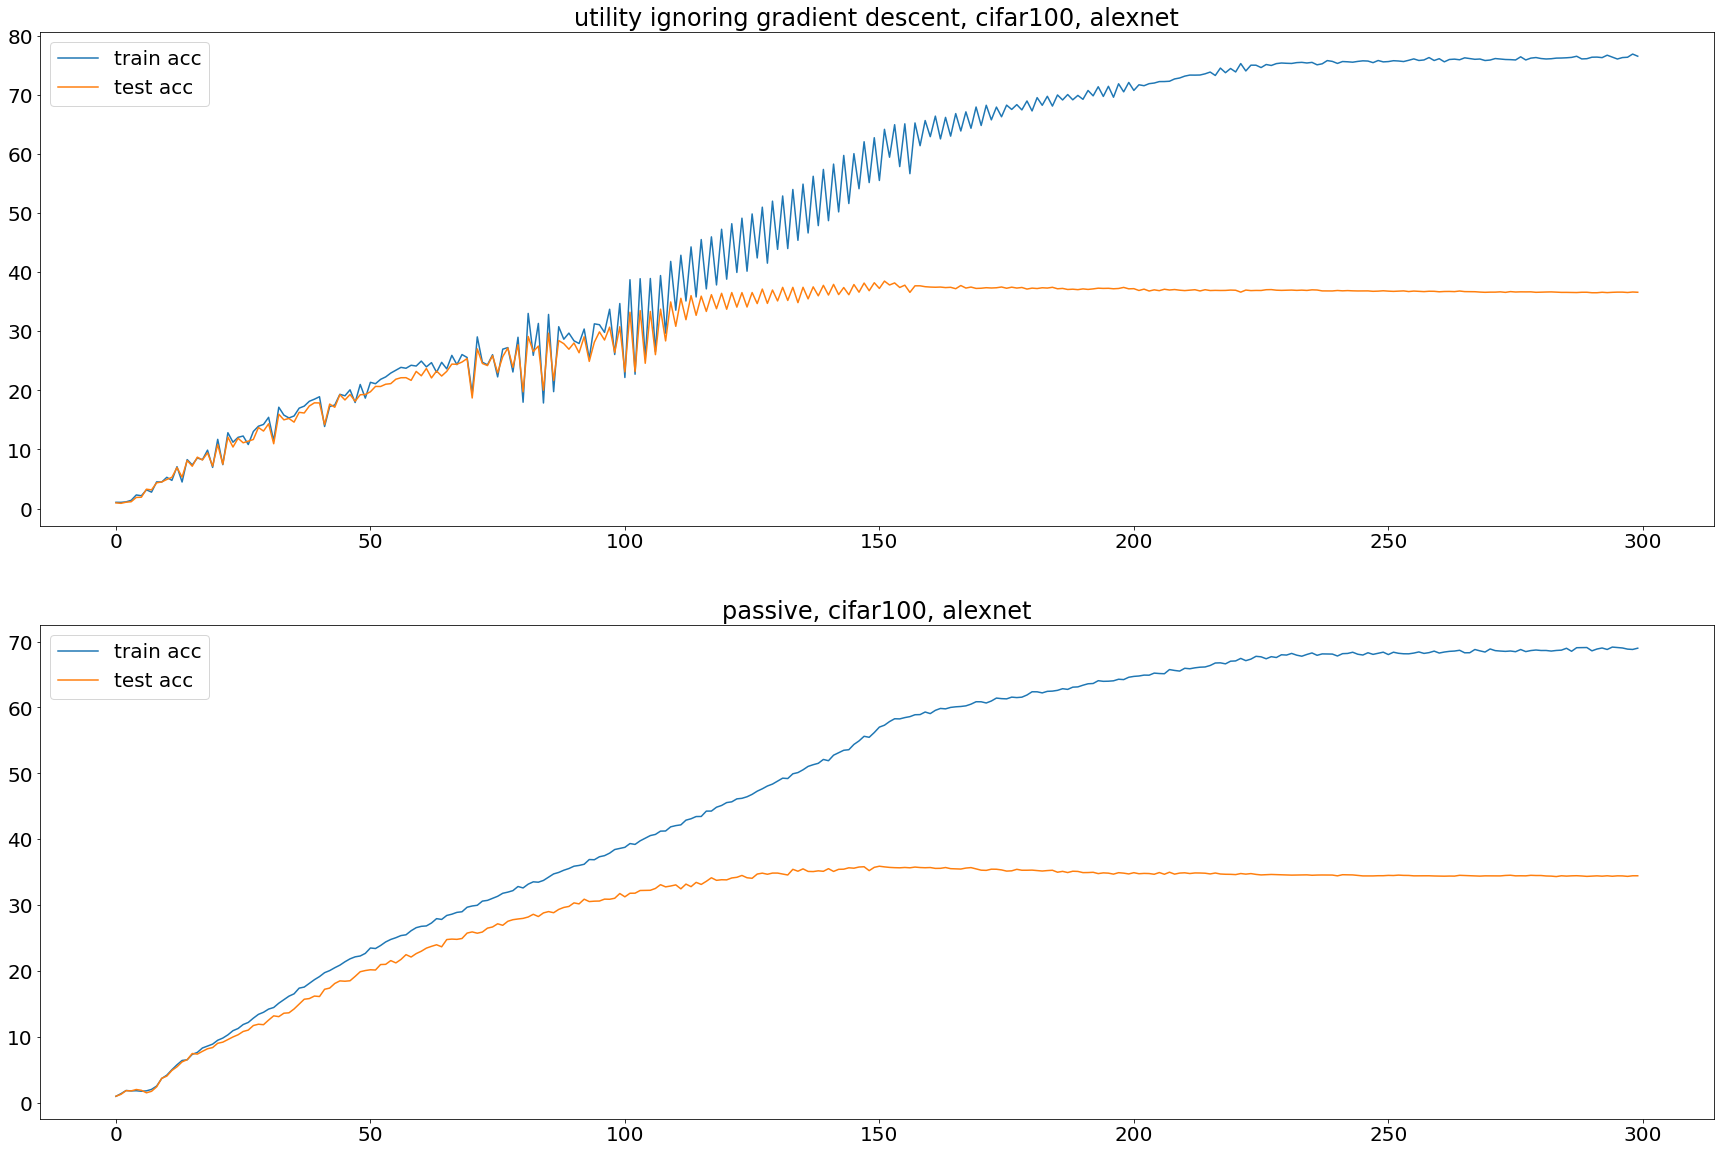

In [38]:

fig = plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 20})

plt.subplot(2,1,1)
file_name = prefix + 'track_acc_10_0_server_1_-1.0_10_40_0_0.0_0.0_0_0.0_0_cifar100_4000_alexnet.npy'
acc_list =np.load(file_name,allow_pickle=True)
print (acc_list.shape)
plt.plot(np.arange(len(acc_list)),acc_list[:,0])
plt.plot(np.arange(len(acc_list)),acc_list[:,1])
plt.legend(['train acc','test acc'],prop={'size': 20})
plt.title('utility ignoring gradient descent, cifar100, alexnet')

file_name = prefix + 'track_acc_0_0_server_0_0.0_10_40_0_0.0_0.0_0_0.0_0_cifar100_4000_alexnet.npy'
passive_acc_list =np.load(file_name,allow_pickle=True)
print (acc_list.shape)
plt.subplot(2,1,2)
plt.plot(np.arange(len(acc_list)),passive_acc_list[:,0])
plt.plot(np.arange(len(acc_list)),passive_acc_list[:,1])
plt.legend(['train acc','test acc'],prop={'size': 20})
plt.title('passive, cifar100, alexnet')

#file_name = prefix + 'track_acc_0_0_server_1_0.01_10_40_0_0.0_0.0_0_0.0_0_cifar100_4000_alexnet.npy'
#acc_list =np.load(file_name,allow_pickle=True)
#print (acc_list.shape)
#plt.subplot(4,1,3)
#plt.plot(np.arange(len(acc_list)),acc_list[:,0])
#plt.plot(np.arange(len(acc_list)),acc_list[:,1])
#plt.legend(['train acc','test acc'],prop={'size': 20})
#plt.title('gradient ascent , cifar100, alexnet')

#plt.subplot(4,1,4)
#plt.plot(np.arange(len(acc_list)),acc_list[:,1]/passive_acc_list[:,1])
#plt.title('gradient ascent testing accuracy / passive testing accuracy')
#plt.plot(np.arange(len(acc_list)-1),acc_list[1:,1]/acc_list[:len(acc_list)-1,1])
#plt.title('gradient ascent testing accuracy / passive testing accuracy')

plt.show()

no def avg mul 0.6459374999999999
def avg mul 0.6891964285714285


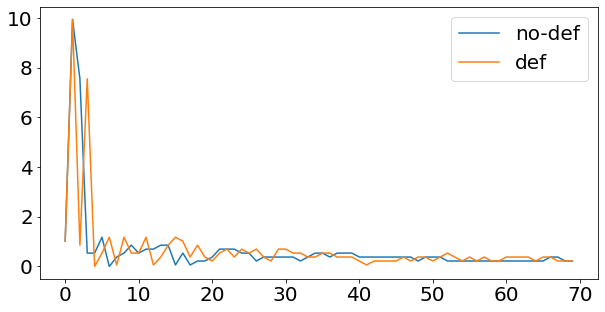

In [49]:
fig = plt.figure(figsize=(10,5))
epoch = 70
log_name = prefix + 'all_multiplier_13_0_server_1_-1.0_10_40_0_0.0_0.0_0_0.0_0_cifar100_4000_alexnet.npy'
log = np.load(log_name)
plt.plot(np.arange(len(log))[:epoch],log[:epoch])
print (f"no def avg mul {np.average(log[:epoch])}")

log_name = prefix + 'all_multiplier_13_0_server_1_-1.0_10_40_0_0.0_0.0_1_3.5_1_cifar100_4000_alexnet.npy'
log = np.load(log_name)
plt.plot(np.arange(len(log))[:epoch],log[:epoch])
print (f"def avg mul {np.average(log[:epoch])}")

plt.legend(['no-def','def'])
plt.show()

no def avg mul 0.4007291666666666
def avg mul 0.3396875


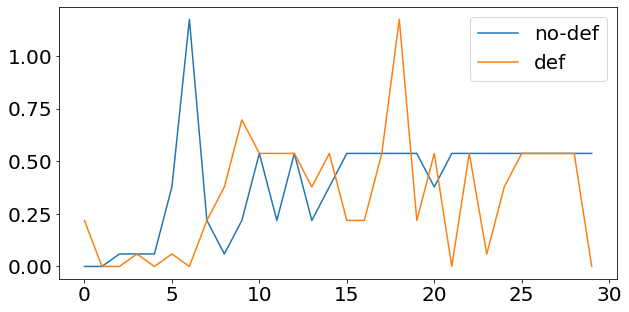

In [48]:
fig = plt.figure(figsize=(10,5))
epoch = 30
log_name = prefix + 'all_multiplier_50_0_server_1_-1.0_10_40_0_0.0_0.0_0_0.0_0_cifar10_4000_densenet_cifar.npy'
log = np.load(log_name)
plt.plot(np.arange(len(log))[:epoch],log[:epoch])
print (f"no def avg mul {np.average(log[:epoch])}")

log_name = prefix + 'all_multiplier_50_0_server_1_-1.0_10_40_0_0.0_0.0_1_3.25_1_cifar10_4000_densenet_cifar.npy'
log = np.load(log_name)
plt.plot(np.arange(len(log))[:epoch],log[:epoch])
print (f"def avg mul {np.average(log[:epoch])}")

plt.legend(['no-def','def'])
plt.show()